# Seeds of Change: A Century of Climate and Crop Dynamics in India (1901–2021)

"Seeds of Change" captures the evolving agricultural landscape of India shaped by over a century of climatic shifts. This story goes beyond statistics, it’s about how changing patterns of rainfall and temperature have influenced the livelihoods of farmers, altered crop dynamics, and emphasized the growing need for resilience and adaptation in the face of climate change.  

<!-- Through this notebook, we explore:  

- The silent rise in temperatures and its creeping impact on agriculture. 
- How India's monsoon heartbeat has changed over the decades.  
- How crop yields tell the story of resilience, decline, or adaptation.  
- A data-driven exploration of whether climate variability is statistically significant in affecting crop production.   -->

### 🌾 Introduction

India’s agriculture is deeply intertwined with its climate. With over half the population dependent on farming and a significant portion of cultivation reliant on seasonal monsoons, even subtle shifts in climatic patterns can have profound consequences. In recent decades, concerns have intensified around rising temperatures, erratic rainfall, and their cascading impact on crop productivity.

This notebook brings together over a century’s worth of data on **rainfall**, **temperature**, and **crop yields** to explore key questions at the heart of India’s agrarian future:

- How have climate patterns evolved across India from **1901 to 2021**?
- Do these changes correlate with trends in **agricultural productivity**?
- To what extent do **rainfall variability** and **temperature rise** affect crop yield outcomes?



### Datasets Used

- **Sub-Divisional Monthly Rainfall (1901–2017)** – [data.gov.in](https://www.data.gov.in/resource/sub-divisional-monthly-rainfall-1901-2017)  
- **Seasonal and Annual Mean Temperature Series (1901–2021)** – [data.gov.in](https://www.data.gov.in/resource/seasonal-and-annual-mean-temperature-series-period-1901-2021)  
- **Crop Yield in Indian States Dataset** – [Kaggle](https://www.kaggle.com/datasets/akshatgupta7/crop-yield-in-indian-states-dataset)



### Objective

Through a blend of visual storytelling, data analysis, and hypothesis testing, this notebook seeks to uncover how climatic trends may be shaping the trajectory of Indian agriculture and what these patterns reveal about the challenges, vulnerabilities, and adaptations on the horizon.


In [1]:
# Necessary Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


#### Let's Start by Visualizing India's Temperature Trends

In [2]:
# Reading TEMP_ANNUAL_SEASONAL_MEAN.csv for annual temperature data
temp = pd.read_csv('TEMP_ANNUAL_SEASONAL_MEAN.csv')
temp

YEAR  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC
0    1901.0   25.42    20.11    27.64    28.16     23.1
1    1902.0   25.42    20.88    27.96    27.98    22.51
2    1903.0   25.01    19.99    27.02       28    22.33
3    1904.0   24.93    19.76    27.23    27.57    22.56
4    1905.0   24.84    18.36    26.38     28.2    23.13
..      ...     ...      ...      ...      ...      ...
118  2019.0   25.86    20.71       28     28.6    23.49
119  2020.0   25.78    20.79    27.58    28.45    23.75
120  2021.0   25.93    21.43    27.97    28.36    23.66
121     NaN     NaN      NaN      NaN      NaN      NaN
122     NaN  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC

[123 rows x 6 columns]

In [3]:
# Removing the nans
temp = temp.dropna()
temp

YEAR ANNUAL JAN-FEB MAR-MAY JUN-SEP OCT-DEC
0    1901.0  25.42   20.11   27.64   28.16    23.1
1    1902.0  25.42   20.88   27.96   27.98   22.51
2    1903.0  25.01   19.99   27.02      28   22.33
3    1904.0  24.93   19.76   27.23   27.57   22.56
4    1905.0  24.84   18.36   26.38    28.2   23.13
..      ...    ...     ...     ...     ...     ...
116  2017.0  26.04   21.37    28.2   28.39   23.84
117  2018.0   25.9   21.24   28.16   28.28   23.55
118  2019.0  25.86   20.71      28    28.6   23.49
119  2020.0  25.78   20.79   27.58   28.45   23.75
120  2021.0  25.93   21.43   27.97   28.36   23.66

[121 rows x 6 columns]

#### Preprocessing Steps  
Before diving into the visualizations, the temperature dataset underwent preprocessing to ensure data quality and consistency:  
- Loading the Dataset: The dataset was loaded using pandas.read_csv() for easy manipulation.  
- Handling Missing Values: Rows with missing values (NaN) were dropped using df.dropna() to ensure clean data for analysis.  
- Data Type Conversion: Columns like YEAR were converted to integers using astype(int) for proper plotting on time-series graphs.  

121 121 <class 'numpy.float64'> <class 'str'>


/var/folders/nj/cv7zrr5s39g_d0x2440hndx40000gp/T/ipykernel_42282/1699907605.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['YEAR'] = temp['YEAR'].astype(int)
/var/folders/nj/cv7zrr5s39g_d0x2440hndx40000gp/T/ipykernel_42282/1699907605.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['ANNUAL'] = temp['ANNUAL'].astype(float)
/var/folders/nj/cv7zrr5s39g_d0x2440hndx40000gp/T/ipykernel_42282/1699907605.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

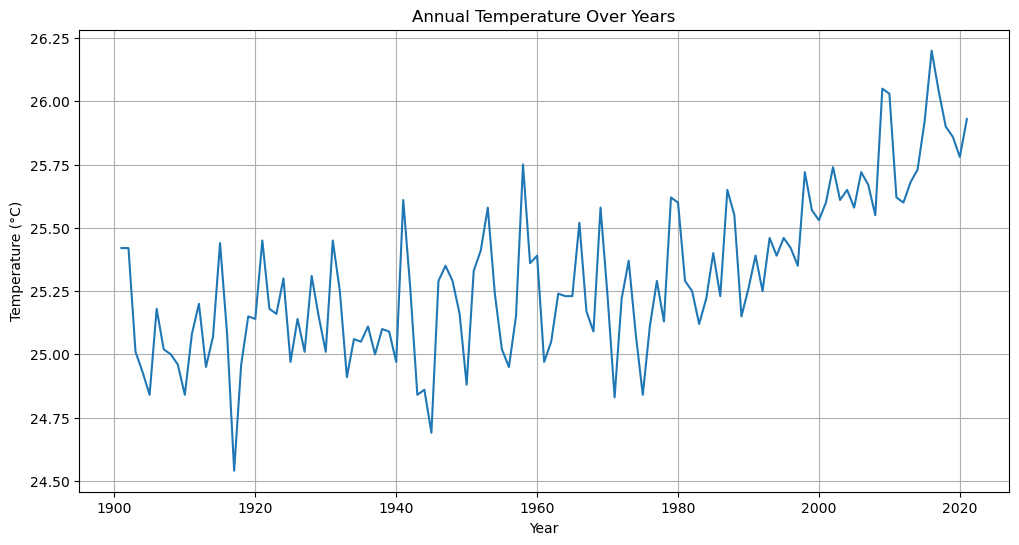

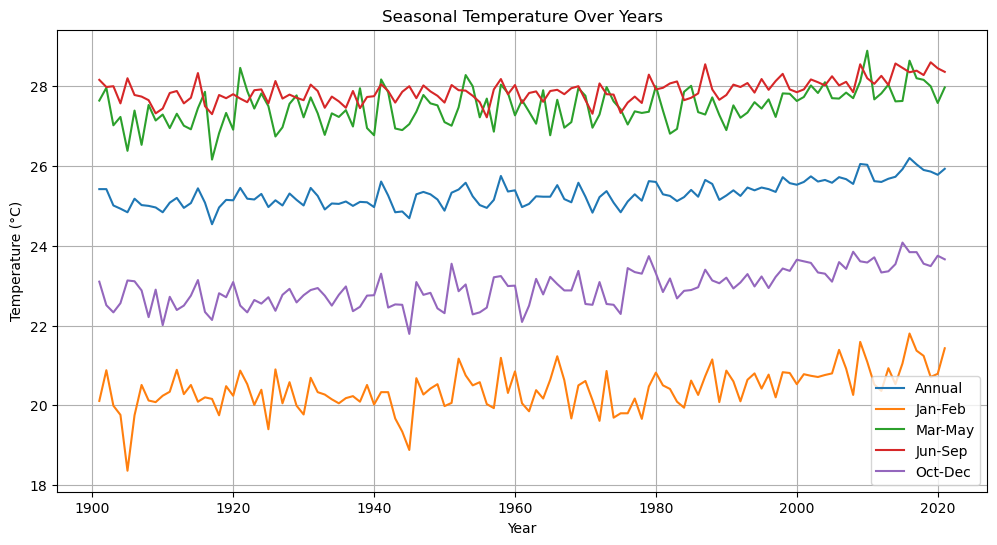

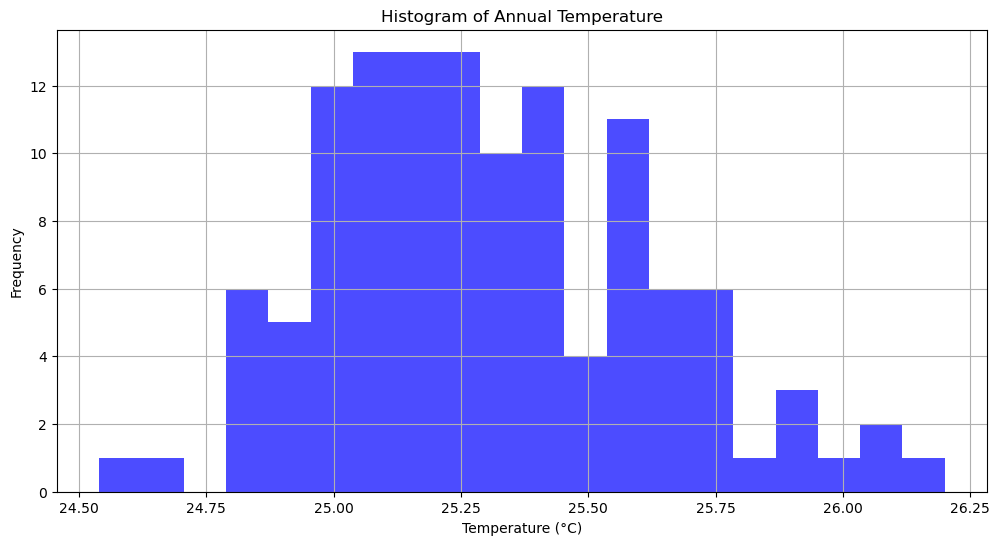

In [4]:
year = temp['YEAR']
temp_ann = temp['ANNUAL']
print(len(year), len(temp_ann), type(year[0]), type(temp_ann[0]))
# Changing the data type of the year to int and temperature to float
temp['YEAR'] = temp['YEAR'].astype(int)
temp['ANNUAL'] = temp['ANNUAL'].astype(float)
temp['JAN-FEB'] = temp['JAN-FEB'].astype(float)
temp['MAR-MAY'] = temp['MAR-MAY'].astype(float)
temp['JUN-SEP'] = temp['JUN-SEP'].astype(float)
temp['OCT-DEC'] = temp['OCT-DEC'].astype(float)
# Checking the data types

# Plotting the annual temperature data
plt.figure(figsize=(12, 6))
plt.plot(temp['YEAR'], temp['ANNUAL'])
plt.title('Annual Temperature Over Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid()

plt.show()

# Plotting the seasonal temperature data
plt.figure(figsize=(12, 6))
plt.plot(temp['YEAR'], temp['ANNUAL'], label='Annual')
plt.plot(temp['YEAR'], temp['JAN-FEB'], label='Jan-Feb')
plt.plot(temp['YEAR'], temp['MAR-MAY'], label='Mar-May')
plt.plot(temp['YEAR'], temp['JUN-SEP'], label='Jun-Sep')
plt.plot(temp['YEAR'], temp['OCT-DEC'], label='Oct-Dec')
plt.title('Seasonal Temperature Over Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()
# Plotting the histogram of annual temperature
plt.figure(figsize=(12, 6))
plt.hist(temp['ANNUAL'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Annual Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


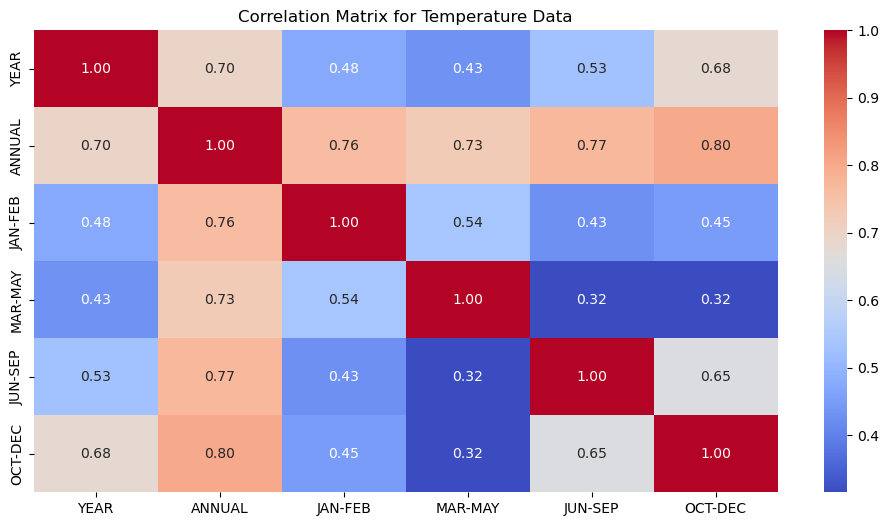

In [5]:
# Correlation matrix
corr = temp.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Temperature Data')
plt.show()

## India's Temperature Story: A Century of Change

India's temperature trends over the past century reveal a fascinating yet concerning narrative. Through four distinct plots, we uncover patterns that highlight the evolving climate and its implications for agriculture and ecosystems.


### **Histogram of Annual Temperature**
The histogram provides a snapshot of the distribution of annual average temperatures from 1901 to 2021. Most years fall within the range of 25.0°C to 25.5°C, showcasing India's historical climatic stability. This range has long been considered the "comfort zone" for agriculture, supporting staple crops like wheat and rice. However, the histogram reveals a subtle but significant shift toward higher temperatures in recent decades, with outliers exceeding 26°C. These warmer years are becoming more frequent, signaling a departure from the stable climatic conditions of the past. This shift could have profound implications for crop yields, as even small increases in average temperature can exacerbate heat stress during critical growth periods.

### **Seasonal Temperature Over Years**
The multi-line plot reveals how seasonal temperatures have evolved over time:
- **Winter (Jan-Feb)** emerges as the fastest warming season, with temperatures rising from ~19°C in the early 1900s to consistently above 21°C today. This rapid increase threatens crops like wheat that rely on prolonged cooling periods for vernalization, potentially reducing yields in key agricultural regions.
- **Pre-monsoon months (Mar-May)** exhibit increasing variability, with frequent temperature spikes that stress crops during flowering stages, leading to reduced productivity.
- **Monsoon (Jun-Sep)** temperatures remain relatively stable but show subtle increases in temperatures, which can impact grain filling efficiency for crops like rice.
- **Post-monsoon season (Oct-Dec)** shows gradual warming as well, extending warm conditions into what traditionally served as a cooling period.

These trends collectively highlight how India's agricultural calendar is being reshaped by changing seasonal temperature patterns.

### **Correlation Matrix**
The correlation matrix uncovers intricate relationships between annual and seasonal temperatures. A strong positive correlation (r = 0.80) between annual and Oct-Dec post-monsoon temperatures suggests that this season plays an increasingly significant role in shaping India's overall climate profile. This could be due to delayed monsoons or extended warm periods, both of which disrupt traditional agricultural cycles. Conversely, weaker correlations between pre-monsoon (Mar-May) and other seasons (e.g., r = 0.32 with Jun-Sep) highlight unique atmospheric dynamics during this period, which is critical for flowering crops like rice and wheat. The matrix also shows a moderate correlation between annual temperatures and year progression (r = 0.70), confirming a steady warming trend over time.


### **Annual Temperature Over Years**
The time-series plot offers the clearest evidence of India's long-term warming trend. Early decades (1901–1950) show natural oscillations between 24.5°C and 25.5°C without clear directional change, reflecting climatic stability during this period. However, starting in the mid-20th century, a steady upward trend becomes evident, culminating in record-breaking averages above 26°C in recent years. This trajectory signals a fundamental shift in India's climate regime, where rising temperatures challenge crop viability and alter traditional agricultural practices.


### **Methods Used for Visualization**

- **Histogram**: The distribution of annual temperatures was plotted using `plt.hist()` with bins set to 15.
- **Correlation Matrix**: Seasonal and annual temperature correlations were calculated using pandas' `corr()` method and visualized with seaborn's `heatmap()`.
- **Seasonal Trends**: Multi-line plots were generated using matplotlib's `plt.plot()` to compare seasonal trends across decades.
- **Annual Time Series**: A focused line plot was created using matplotlib with customized y-axis limits to emphasize long-term warming trends.

These methods allowed us to uncover patterns and relationships in India's temperature data that highlight the challenges posed by climate change.


## Rainfall Rhythms: Tracking India's Water Story

Rainfall in India isn't just weather; it's the lifeblood of the nation, deeply woven into its culture, economy, and the rhythm of daily life. For centuries, the arrival and departure of the monsoon have dictated the fortunes of farmers and shaped the landscape. Analyzing over a century of rainfall data, as visualized in these plots, lets us peer into this vital, complex, and often unpredictable system.


#### Preprocessing Steps

Before visualizing India's rainfall patterns, the raw data from the "Sub_Division_IMD_2017.csv" file needed preprocessing. This preprocessing journey involved several steps ensuring the data was clean, consistent, and ready for analysis.

1.  **Loading and Initial Cleanup:** The journey began by loading the dataset into a pandas DataFrame named `rain`. Immediately after loading, the command `rain.dropna()` was executed. This first step removed any rows containing missing values (often represented as `NaN`). Rainfall data can have gaps, and removing these incomplete records prevents errors or skewed results in later calculations and visualizations.

2.  **Setting the Right Data Types:** Computers need to know what kind of data they are dealing with. The next step involved explicitly defining the data type for each relevant column using the `.astype()` method.
    *   The `SUBDIVISION` column, containing geographical names, was converted to strings (`str`).
    *   The `YEAR` column was converted to integers (`int`) for proper handling in time-series analysis.
    *   All columns representing rainfall amounts – monthly (`JAN` to `DEC`), annual (`ANNUAL`), and calculated seasonal totals (`JF`, `MAM`, `JJAS`, `OND`) – were converted to floating-point numbers (`float`). This ensures they can be used accurately in mathematical operations.

3.  **Identifying and Separating Combined Regions:** A closer look at the geographical subdivisions revealed a challenge: some entries represented combined administrative regions (e.g., 'Assam & Meghalaya', 'Konkan & Goa'). For more granular analysis, these needed to be separated. This involved a meticulous, multi-step process for each combined entity: identifying the combined name, replacing it with one constituent part in the main DataFrame, copying the original rows to a new DataFrame, renaming the subdivision to the *other* constituent part in the new DataFrame, and finally concatenating the two DataFrames back together using `pd.concat()`. This separation was systematically applied to ensure each row represented a distinct geographical subdivision.

4.  **Mapping Subdivisions to States:** The original dataset uses meteorological subdivisions, which don't always align perfectly with administrative state boundaries, especially for merging with other datasets like crop yields which are typically state-level. To address this, a dictionary named `state_mapping` was created. This dictionary explicitly defines which state each subdivision belongs to (e.g., 'Coastal Andhra Pradesh' maps to 'Andhra Pradesh', 'West Uttar Pradesh' maps to 'Uttar Pradesh'). This mapping was then applied to the `rain` DataFrame using the `.map()` function to create a new `STATE` column, standardizing the geographical identifier to the state level.

5.  **Aggregating Rainfall to State Level:** With the `STATE` column created, the final preprocessing step aggregated the rainfall data. The code identified all rainfall columns (`rainfall_cols`). It then grouped the `rain` DataFrame by both `YEAR` and the new `STATE` column using `groupby(['YEAR', 'STATE'])`. For each year-state combination, it calculated the `mean()` rainfall across all relevant columns. This averaging is necessary because some states might encompass multiple meteorological subdivisions; this step provides a single representative rainfall value for each state per year. The result, stored in the `state_rainfall` DataFrame, now presents the average rainfall data at the state-year level, making it suitable for merging with state-level crop yield data later in the analysis.

By the end of these steps, the data was transformed from raw, sub-divisional monthly figures to a clean, state-level dataset showing average annual and seasonal rainfall per year, ready for comparison with temperature and crop yield trends.


In [6]:
# Sub_Division_IMD_2017.csv
# Reading Sub_Division_IMD_2017.csv for rainfall data
rain = pd.read_csv('Sub_Division_IMD_2017.csv')
rain = rain.dropna()
rain

SUBDIVISION  YEAR   JAN    FEB    MAR    APR    MAY  \
0     Andaman & Nicobar Islands  1901  49.2   87.1   29.2    2.3  528.8   
1     Andaman & Nicobar Islands  1902   0.0  159.8   12.2    0.0  446.1   
2     Andaman & Nicobar Islands  1903  12.7  144.0    0.0    1.0  235.1   
3     Andaman & Nicobar Islands  1904   9.4   14.7    0.0  202.4  304.5   
4     Andaman & Nicobar Islands  1905   1.3    0.0    3.3   26.9  279.5   
...                         ...   ...   ...    ...    ...    ...    ...   
4183                Lakshadweep  2013  26.2   34.4   37.5    5.3   88.3   
4184                Lakshadweep  2014  53.2   16.1    4.4   14.9   57.4   
4185                Lakshadweep  2015   2.2    0.5    3.7   87.1  133.1   
4186                Lakshadweep  2016  59.6   12.1    3.2    2.6   77.4   
4187                Lakshadweep  2017  21.3    0.9  100.2    1.8  145.7   

        JUN    JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL     JF    MAM  \
0     517.5  365.1  481.1  332.6  388.5  558.2   33.6  3373.2  136.3  560.3   
1     537.1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7  159.8  458.3   
2     479.9  728.4  326.7  339.0  181.2  284.4  225.0  2957.4  156.7  236.1   
3     495.1  502.0  160.1  820.4  222.2  308.7   40.1  3079.6   24.1  506.9   
4     628.7  368.7  330.5  297.0  260.7   25.4  344.7  2566.7    1.3  309.7   
...     ...    ...    ...    ...    ...    ...    ...     ...    ...    ...   
4183  426.2  296.4  154.4  180.0   72.8   78.1   26.7  1426.3   60.6  131.1   
4184  244.1  116.1  466.1  132.2  169.2   59.0   62.3  1395.0   69.3   76.7   
4185  296.6  257.5  146.4  160.4  165.4  231.0  159.0  1642.9    2.7  223.9   
4186  321.1  262.6   86.2   75.6   58.6   32.0   74.7  1065.7   71.7   83.2   
4187  521.9  164.2  206.2  216.0  137.1   63.5  160.1  1738.9   22.2  247.8   

        JJAS    OND  
0     1696.3  980.3  
1     2185.9  716.7  
2     1874.0  690.6  
3     1977.6  571.0  
4     1624.9  630.8  
...      ...    ...  
4183  1057.0  177.6  
4184   958.5  290.5  
4185   860.9  555.4  
4186   745.4  165.4  
4187  1108.3  360.7  

[4162 rows x 19 columns]

In [7]:
# The type of SUBDIVION has to be a string, the type of YEAR has to be an int, and the type of rainfall has to be a float
rain['SUBDIVISION'] = rain['SUBDIVISION'].astype(str)
rain['YEAR'] = rain['YEAR'].astype(int)
# JAN	FEB	MAR	APR	MAY	JUN	JUL	AUG	SEP	OCT	NOV	DEC	ANNUAL	JF	MAM	JJAS	OND
rain['JAN'] = rain['JAN'].astype(float)
rain['FEB'] = rain['FEB'].astype(float)
rain['MAR'] = rain['MAR'].astype(float)
rain['APR'] = rain['APR'].astype(float)
rain['MAY'] = rain['MAY'].astype(float)
rain['JUN'] = rain['JUN'].astype(float)
rain['JUL'] = rain['JUL'].astype(float)
rain['AUG'] = rain['AUG'].astype(float)
rain['SEP'] = rain['SEP'].astype(float)
rain['OCT'] = rain['OCT'].astype(float)
rain['NOV'] = rain['NOV'].astype(float)
rain['DEC'] = rain['DEC'].astype(float)
rain['ANNUAL'] = rain['ANNUAL'].astype(float)
rain['JF'] = rain['JF'].astype(float)
rain['MAM'] = rain['MAM'].astype(float)
rain['JJAS'] = rain['JJAS'].astype(float)
rain['OND'] = rain['OND'].astype(float)


In [8]:
# Printing the SUBDIVISION Unique values
print(rain['SUBDIVISION'].unique())

['Andaman & Nicobar Islands' 'Arunachal Pradesh' 'Assam & Meghalaya'
 'Naga Mani Mizo Tripura' 'Sub Himalayan West Bengal & Sikkim'
 'Gangetic West Bengal' 'Orissa' 'Jharkhand' 'Bihar' 'East Uttar Pradesh'
 'West Uttar Pradesh' 'Uttarakhand' 'Haryana Delhi & Chandigarh' 'Punjab'
 'Himachal Pradesh' 'Jammu & Kashmir' 'West Rajasthan' 'East Rajasthan'
 'West Madhya Pradesh' 'East Madhya Pradesh' 'Gujarat Region'
 'Saurashtra & Kutch' 'Konkan & Goa' 'Madhya Maharashtra' 'Matathwada'
 'Vidarbha' 'Chhattisgarh' 'Coastal Andhra Pradesh' 'Telangana'
 'Rayalseema' 'Tamil Nadu' 'Coastal Karnataka' 'North Interior Karnataka'
 'South Interior Karnataka' 'Kerala' 'Lakshadweep']


In [9]:
# Here, we have Assam & Meghalaya as a single entity. So, we will create two new subdivisions with the same data
# as Assam and Meghalaya
rain['SUBDIVISION'] = rain['SUBDIVISION'].replace('Assam & Meghalaya', 'Assam')
# Copy the data for Assam and change the SUBDIVISION to Meghalaya
rain_meghalaya = rain[rain['SUBDIVISION'] == 'Assam'].copy()
rain_meghalaya['SUBDIVISION'] = 'Meghalaya'
# Concatenate the two dataframes
rain = pd.concat([rain, rain_meghalaya], ignore_index=True)
# Checking the unique values again
print(rain['SUBDIVISION'].unique())

['Andaman & Nicobar Islands' 'Arunachal Pradesh' 'Assam'
 'Naga Mani Mizo Tripura' 'Sub Himalayan West Bengal & Sikkim'
 'Gangetic West Bengal' 'Orissa' 'Jharkhand' 'Bihar' 'East Uttar Pradesh'
 'West Uttar Pradesh' 'Uttarakhand' 'Haryana Delhi & Chandigarh' 'Punjab'
 'Himachal Pradesh' 'Jammu & Kashmir' 'West Rajasthan' 'East Rajasthan'
 'West Madhya Pradesh' 'East Madhya Pradesh' 'Gujarat Region'
 'Saurashtra & Kutch' 'Konkan & Goa' 'Madhya Maharashtra' 'Matathwada'
 'Vidarbha' 'Chhattisgarh' 'Coastal Andhra Pradesh' 'Telangana'
 'Rayalseema' 'Tamil Nadu' 'Coastal Karnataka' 'North Interior Karnataka'
 'South Interior Karnataka' 'Kerala' 'Lakshadweep' 'Meghalaya']


In [10]:
# Konkan and Goa
rain['SUBDIVISION'] = rain['SUBDIVISION'].replace('Konkan & Goa', 'Goa')
# Copy the data for Konkan and change the SUBDIVISION to Konkan
rain_konkan = rain[rain['SUBDIVISION'] == 'Goa'].copy()
rain_konkan['SUBDIVISION'] = 'Konkan'
# Concatenate the two dataframes
rain = pd.concat([rain, rain_konkan], ignore_index=True)
# Checking the unique values again
print(rain['SUBDIVISION'].unique())

['Andaman & Nicobar Islands' 'Arunachal Pradesh' 'Assam'
 'Naga Mani Mizo Tripura' 'Sub Himalayan West Bengal & Sikkim'
 'Gangetic West Bengal' 'Orissa' 'Jharkhand' 'Bihar' 'East Uttar Pradesh'
 'West Uttar Pradesh' 'Uttarakhand' 'Haryana Delhi & Chandigarh' 'Punjab'
 'Himachal Pradesh' 'Jammu & Kashmir' 'West Rajasthan' 'East Rajasthan'
 'West Madhya Pradesh' 'East Madhya Pradesh' 'Gujarat Region'
 'Saurashtra & Kutch' 'Goa' 'Madhya Maharashtra' 'Matathwada' 'Vidarbha'
 'Chhattisgarh' 'Coastal Andhra Pradesh' 'Telangana' 'Rayalseema'
 'Tamil Nadu' 'Coastal Karnataka' 'North Interior Karnataka'
 'South Interior Karnataka' 'Kerala' 'Lakshadweep' 'Meghalaya' 'Konkan']


In [11]:
# Similarly, we will separate Haryana Delhi & Chandigarh, Sub Himalayan West Bengal & Sikkim AND Naga Mani Mizo Tripura
# into their own entities
# Haryana Delhi & Chandigarh
rain['SUBDIVISION'] = rain['SUBDIVISION'].replace('Haryana Delhi & Chandigarh', 'Haryana')
# Copy the data for Haryana and change the SUBDIVISION to Delhi
rain_delhi = rain[rain['SUBDIVISION'] == 'Haryana'].copy()
rain_delhi['SUBDIVISION'] = 'Delhi'
# Concatenate the two dataframes
rain = pd.concat([rain, rain_delhi], ignore_index=True)
# Similarly for Chandigarh
rain_chandigarh = rain[rain['SUBDIVISION'] == 'Haryana'].copy()
rain_chandigarh['SUBDIVISION'] = 'Chandigarh'
# Concatenate the two dataframes
rain = pd.concat([rain, rain_chandigarh], ignore_index=True)
# Now, Sub Himalayan West Bengal & Sikkim
rain['SUBDIVISION'] = rain['SUBDIVISION'].replace('Sub Himalayan West Bengal & Sikkim', 'West Bengal')
# Copy the data for West Bengal and change the SUBDIVISION to Sikkim
rain_sikkim = rain[rain['SUBDIVISION'] == 'West Bengal'].copy()
rain_sikkim['SUBDIVISION'] = 'Sikkim'
# Concatenate the two dataframes
rain = pd.concat([rain, rain_sikkim], ignore_index=True)
# Now, Naga Mani Mizo Tripura
rain['SUBDIVISION'] = rain['SUBDIVISION'].replace('Naga Mani Mizo Tripura', 'Nagaland')
rain_tripura = rain[rain['SUBDIVISION'] == 'Nagaland'].copy()
rain_tripura['SUBDIVISION'] = 'Tripura'
# Concatenate the two dataframes
rain = pd.concat([rain, rain_tripura], ignore_index=True)
# Mizoram 
rain_mizoram = rain[rain['SUBDIVISION'] == 'Nagaland'].copy()
rain_mizoram['SUBDIVISION'] = 'Mizoram'
# Concatenate the two dataframes
rain = pd.concat([rain, rain_mizoram], ignore_index=True)
# Manipur
rain_manipur = rain[rain['SUBDIVISION'] == 'Nagaland'].copy()
rain_manipur['SUBDIVISION'] = 'Manipur'
# Concatenate the two dataframes
rain = pd.concat([rain, rain_manipur], ignore_index=True)
# Now, we will remove the duplicates
rain = rain.drop_duplicates()
# Checking the unique values again
print(rain['SUBDIVISION'].unique(), len(rain['SUBDIVISION'].unique()))

['Andaman & Nicobar Islands' 'Arunachal Pradesh' 'Assam' 'Nagaland'
 'West Bengal' 'Gangetic West Bengal' 'Orissa' 'Jharkhand' 'Bihar'
 'East Uttar Pradesh' 'West Uttar Pradesh' 'Uttarakhand' 'Haryana'
 'Punjab' 'Himachal Pradesh' 'Jammu & Kashmir' 'West Rajasthan'
 'East Rajasthan' 'West Madhya Pradesh' 'East Madhya Pradesh'
 'Gujarat Region' 'Saurashtra & Kutch' 'Goa' 'Madhya Maharashtra'
 'Matathwada' 'Vidarbha' 'Chhattisgarh' 'Coastal Andhra Pradesh'
 'Telangana' 'Rayalseema' 'Tamil Nadu' 'Coastal Karnataka'
 'North Interior Karnataka' 'South Interior Karnataka' 'Kerala'
 'Lakshadweep' 'Meghalaya' 'Konkan' 'Delhi' 'Chandigarh' 'Sikkim'
 'Tripura' 'Mizoram' 'Manipur'] 44


In [12]:
import pandas as pd

# Mapping of subdivisions to states
state_mapping = {
    'Coastal Andhra Pradesh': 'Andhra Pradesh',
    'Rayalseema': 'Andhra Pradesh',
    'Telangana': 'Telangana',
    'Tamil Nadu': 'Tamil Nadu',
    'Coastal Karnataka': 'Karnataka',
    'North Interior Karnataka': 'Karnataka',
    'South Interior Karnataka': 'Karnataka',
    'Kerala': 'Kerala',
    'Gujarat Region': 'Gujarat',
    'Saurashtra & Kutch': 'Gujarat',
    'West Bengal': 'West Bengal',
    'Gangetic West Bengal': 'West Bengal',
    'Assam': 'Assam',
    'Meghalaya': 'Meghalaya',
    'Arunachal Pradesh': 'Arunachal Pradesh',
    'Bihar': 'Bihar',
    'Jharkhand': 'Jharkhand',
    'East Uttar Pradesh': 'Uttar Pradesh',
    'West Uttar Pradesh': 'Uttar Pradesh',
    'Uttarakhand': 'Uttarakhand',
    'Haryana': 'Haryana',
    'Punjab': 'Punjab',
    'Himachal Pradesh': 'Himachal Pradesh',
    'Jammu & Kashmir': 'Jammu & Kashmir',
    'West Rajasthan': 'Rajasthan',
    'East Rajasthan': 'Rajasthan',
    'West Madhya Pradesh': 'Madhya Pradesh',
    'East Madhya Pradesh': 'Madhya Pradesh',
    'Goa': 'Goa',
    'Madhya Maharashtra': 'Maharashtra',
    'Matathwada': 'Maharashtra',
    'Vidarbha': 'Maharashtra',
    'Chhattisgarh': 'Chhattisgarh',
    'Lakshadweep': 'Lakshadweep',
    'Konkan': 'Maharashtra', # Assuming Konkan is part of Maharashtra for this task
    'Delhi': 'Delhi',
    'Chandigarh': 'Chandigarh',
    'Sikkim': 'Sikkim',
    'Tripura': 'Tripura',
    'Mizoram': 'Mizoram',
    'Manipur': 'Manipur',
    'Andaman & Nicobar Islands': 'Andaman & Nicobar Islands',
    'Nagaland': 'Nagaland',
    'Orissa': 'Odisha' # Corrected spelling
}

# Create a new 'STATE' column based on the mapping
rain['STATE'] = rain['SUBDIVISION'].map(state_mapping)

# Identify the rainfall columns
rainfall_cols = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JF', 'MAM', 'JJAS', 'OND']

# Group by 'YEAR' and 'STATE' and calculate the mean for the rainfall columns
state_rainfall = rain.groupby(['YEAR', 'STATE'])[rainfall_cols].mean().reset_index()

print(state_rainfall)

      YEAR                      STATE    JAN    FEB    MAR    APR     MAY  \
0     1901  Andaman & Nicobar Islands  49.20  87.10   29.2    2.3  528.80   
1     1901             Andhra Pradesh  12.90  65.55    3.6   20.4   53.80   
2     1901                      Assam  27.10  19.50   30.6  223.0  207.00   
3     1901                      Bihar  51.80  19.60   11.9    1.1   65.60   
4     1901                 Chandigarh  35.40  28.90   11.1    0.0    5.10   
...    ...                        ...    ...    ...    ...    ...     ...   
3808  2017                  Telangana   0.00   0.00    8.7    3.2   22.40   
3809  2017                    Tripura   0.80  11.90  125.3  277.6  196.70   
3810  2017              Uttar Pradesh  15.85   0.60    6.4    1.7   19.65   
3811  2017                Uttarakhand  36.60  13.50   44.5   52.8  108.20   
3812  2017                West Bengal   2.20   2.55   59.9   86.3  166.55   

         JUN     JUL     AUG     SEP     OCT     NOV   DEC   ANNUAL      JF

In [13]:
# Printing the unique values of the state
print(state_rainfall['STATE'].unique(), len(state_rainfall['STATE'].unique()))

['Andaman & Nicobar Islands' 'Andhra Pradesh' 'Assam' 'Bihar' 'Chandigarh'
 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep'
 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Odisha' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Arunachal Pradesh'] 33


In [14]:
# Renaming Jammu & Kashmir to Jammu and Kashmir
state_rainfall['STATE'] = state_rainfall['STATE'].replace('Jammu & Kashmir', 'Jammu and Kashmir')

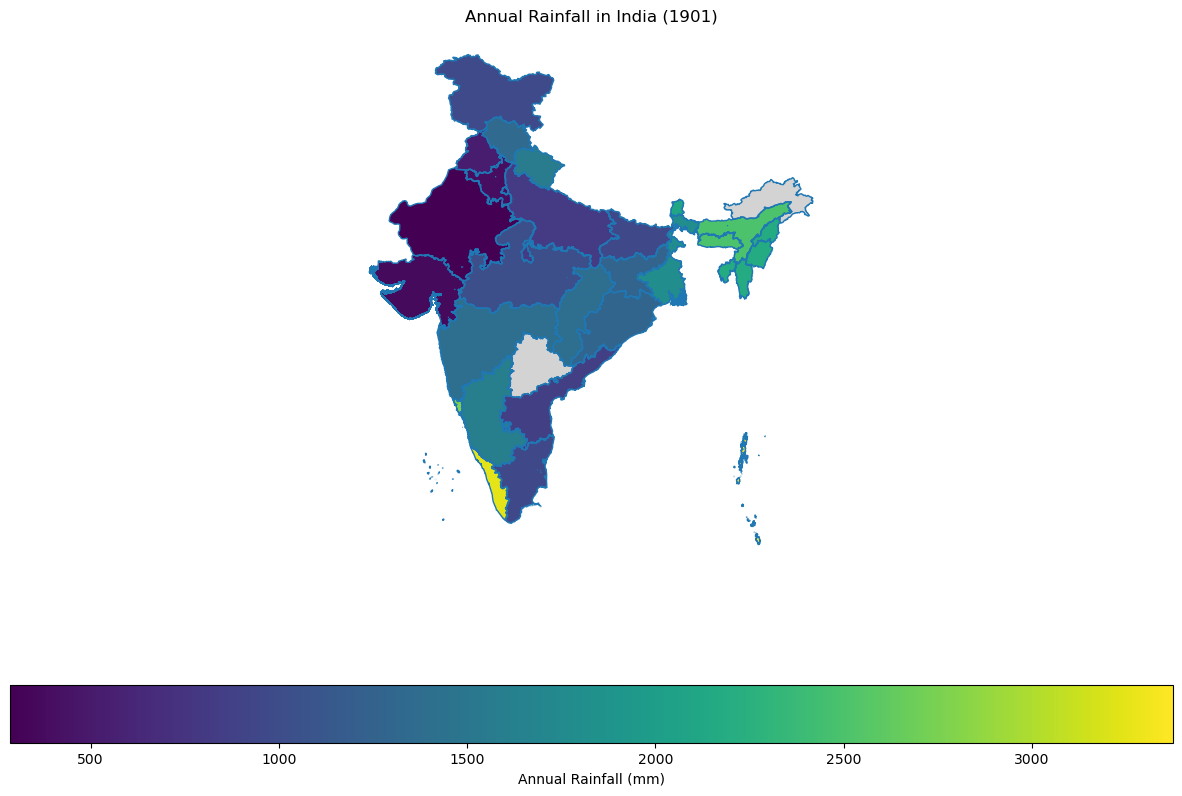

In [15]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the GeoJSON file of India (replace with the actual path)
india_states = gpd.read_file("states_india.geojson")

# 1901 rainfall data is already in the state_rainfall DataFrame
# Filter for the year 1901
rainfall_data = state_rainfall[state_rainfall['YEAR'] == 1901]
# Selecting only the relevant columns for merging
rainfall_data = rainfall_data[['STATE', 'ANNUAL']]
# Assuming your GeoJSON has a column named 'st_nm' for state names.
# You might need to inspect your GeoJSON file and adjust the 'key_on' parameter accordingly.
india_states['NAME_MERGE'] = india_states['st_nm'].str.replace('&', 'and', regex=False)
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Andaman and Nicobar', 'Andaman & Nicobar Islands')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Arunanchal Pradesh', 'Arunachal Pradesh')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Uttaranchal', 'Uttarakhand')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Delhi', 'Delhi') # Ensure exact match
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Chandigarh', 'Chandigarh') # Ensure exact match



# Merge the GeoDataFrame with the rainfall data
merged_data = india_states.merge(rainfall_data, left_on='NAME_MERGE', right_on='STATE', how='left')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Plotting the map with the rainfall data
merged_data.boundary.plot(ax=ax, linewidth=1)
# Plotting the rainfall data
merged_data.plot(column='ANNUAL', ax=ax, legend=True,
                 legend_kwds={'label': "Annual Rainfall (mm)",
                              'orientation': "horizontal"},
                 cmap='viridis', missing_kwds={"color": "lightgrey"})
plt.title('Annual Rainfall in India (1901)')
plt.axis('off')
plt.show()



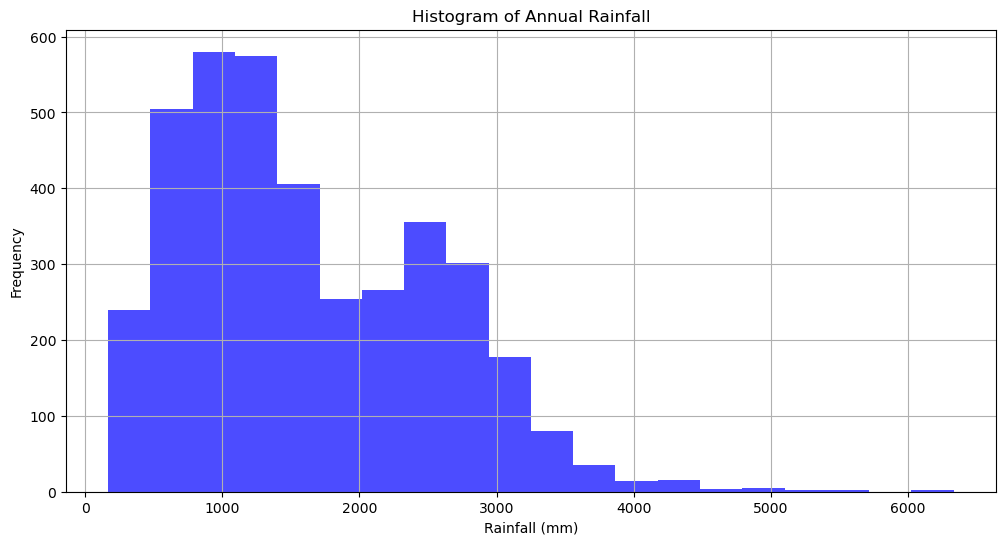

In [16]:
# Plotting the histogram of annual rainfall
plt.figure(figsize=(12, 6))
plt.hist(state_rainfall['ANNUAL'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Annual Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency') 
plt.grid()
plt.show()


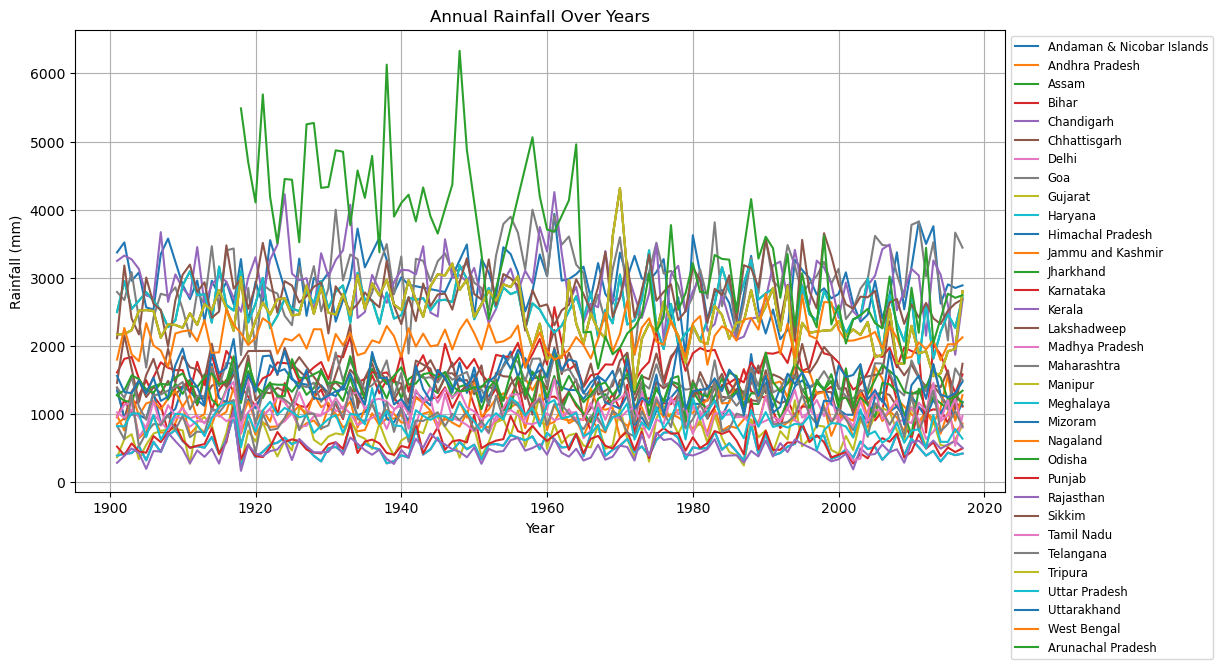

In [17]:
# Plotting the trend of annual rainfall over the years
plt.figure(figsize=(12, 6))
# Plotting the trend of annual rainfall over the years for each state
for state in state_rainfall['STATE'].unique():
    state_data = state_rainfall[state_rainfall['STATE'] == state]
    plt.plot(state_data['YEAR'], state_data['ANNUAL'], label=state)
plt.title('Annual Rainfall Over Years')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.grid()
plt.show()

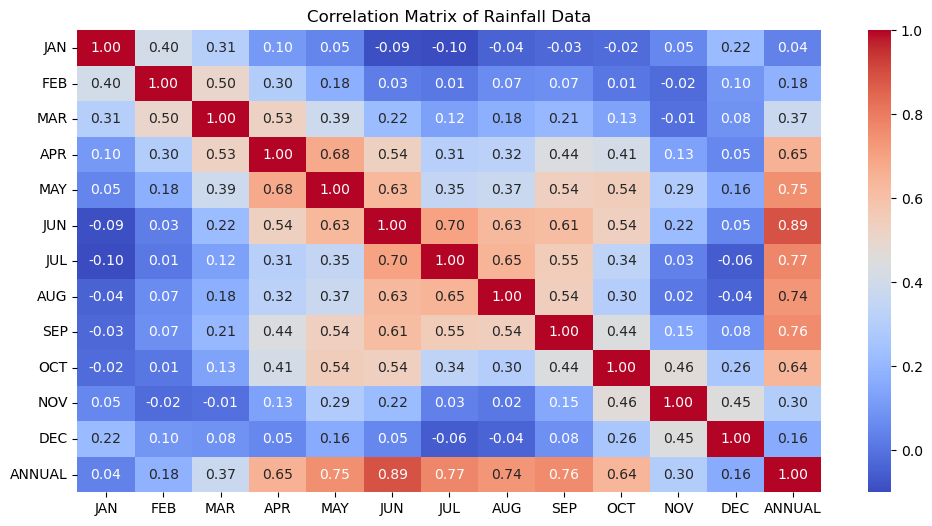

In [18]:
# Correlation between JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, DEC and ANNUAL rainfall
rain_corr = state_rainfall[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL']]
rain_corr = rain_corr.corr()
# Plotting the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(rain_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Rainfall Data')
plt.show()

### **Histogram of Annual Rainfall: The Spectrum of Wetness**

Imagine collecting the total yearly rainfall for every meteorological subdivision across India, year after year, for over a century, and then sorting those amounts into buckets. That's what this histogram shows us. It's a picture of how often different amounts of annual rain occur. The tallest bars are clustered between approximately **800 mm and 1300 mm**, telling us that this range represents the most frequent annual rainfall experience across the subdivisions studied. The absolute peak frequency, with nearly 600 occurrences, sits around the **1000 mm** mark.

But the story doesn't end there. The graph spreads out significantly, stretching from extremely low amounts (bars visible below **500 mm**) all the way to very high rainfall totals, with occurrences recorded even beyond **4000 mm** and tailing off towards **6000 mm**. This broad shape, much wider than a typical temperature distribution, vividly illustrates rainfall's *variability*. Unlike temperature, annual rainfall in India spans a vast spectrum. There isn't one single "normal" rainfall amount; the data shows everything from desert-like scarcity to immense downpours. For example, the average annual rainfall across subdivisions in the sample years ranged from **1361 mm** in 2014 to **1633 mm** in 2017. This inherent spread highlights the diverse climates within India and the significant year-to-year fluctuations that challenge farmers, who must prepare for both scarcity and potential floods.


### **Geographic Snapshot: Annual Rainfall Map (1901)**

This map acts like a time machine, taking us back to the year 1901 and showing us *where* the rain fell across India using a colour scale. Darker, cooler colours (purples and deep blues) represent drier areas, while warmer, brighter colours (greens shifting to yellow) show regions that received abundant rain. The colour bar at the bottom tells us the scale ranges from below **500 mm** (dark purple) up to over **3000 mm** (bright yellow).

Instantly, clear geographical patterns emerge for 1901. The northwestern parts of India, covering regions like Rajasthan and Gujarat, are depicted in dark purple and blue shades, indicating significantly lower rainfall, likely below **1000 mm** based on the colour bar. These are historically arid or semi-arid zones. As our eyes move south and east, the colours generally warm up. A striking bright yellow patch is visible along the southwestern coast, representing areas like Kerala and the Western Ghats, which clearly received very heavy rainfall in 1901, likely exceeding **3000 mm** according to the scale. Pockets of green in the Northeast also suggest substantial rainfall, probably in the **2000-2500 mm** range.

This single snapshot powerfully illustrates the *spatial variability* of rainfall. Even within 1901, the difference between the driest regions (below 1000 mm) and the wettest (above 3000 mm) was enormous. It reminds us that India is a mosaic of diverse rainfall regimes. While only showing 1901, the map establishes a typical baseline pattern: coasts and mountainous regions receive more rain, while the interior and northwest receive less. This spatial pattern, interacting with year-to-year *temporal* variability, dictates water availability across the subcontinent.

### **Correlation Matrix: The Monsoon's Dominance**

This colourful grid acts as a relationship map for rainfall throughout the year, showing how strongly rainfall in one period correlates with another. Bright red squares indicate a strong positive connection (high values in one tend to occur with high values in the other), while blue squares suggest a weak or even slightly negative relationship. The scale bar on the right shows correlation coefficients ranging from near 0 (blue) to 1.0 (red) [9].

The most compelling story here is the overwhelming importance of the monsoon season (June, July, August, September). Look at the row or column labelled 'ANNUAL'. The squares connecting 'ANNUAL' to the core monsoon months are intensely red:
*   ANNUAL vs. JUN: Correlation = **0.89**
*   ANNUAL vs. JUL: Correlation = **0.77**
*   ANNUAL vs. AUG: Correlation = **0.74**
*   ANNUAL vs. SEP: Correlation = **0.76**

These high positive correlations visually confirm a fundamental truth: India's total annual rainfall is overwhelmingly determined by the performance of these four months. A good monsoon (high rainfall in JJAS (June, July, August, September)) strongly correlates with a high annual total. For instance, the seasonal JJAS rainfall in the sample years ranged widely, from **745.4 mm** (2016) to **2185.9 mm** (1902), directly impacting the annual totals.

Contrast this with other periods. The correlation between 'ANNUAL' and winter rainfall ('JAN', 'FEB') is very weak (ANNUAL vs. JAN = **0.04**, ANNUAL vs. FEB = **0.18**). Similarly, the connection with pre-monsoon months is moderate but less dominant than the monsoon (ANNUAL vs. MAR = **0.37**, ANNUAL vs. APR = **0.65**, ANNUAL vs. MAY = **0.75** - note the increasing influence as May approaches the monsoon). Post-monsoon correlations are also weaker (ANNUAL vs. OCT = **0.64**, ANNUAL vs. NOV = **0.30**, ANNUAL vs. DEC = **0.16**). Furthermore, correlations *between* non-monsoon months are generally low (e.g., JAN vs. MAR = **0.31**, FEB vs. OCT = **-0.02**). This reinforces that the summer monsoon system is the primary driver, the main character in India's rainfall drama.

### **Annual Rainfall Over Years: The Fluctuating Lifeline**

This plot unfolds the rainfall story chronologically for various states/subdivisions from 1901 to 2017. Each coloured line represents a different region, tracing its annual rainfall journey, measured in millimeters (mm) on the y-axis, against the year on the x-axis.

The immediate impression is a "spaghetti plot" – a complex web showing diverse experiences. Unlike the clearer trend in temperature, there's no obvious, consistent upward or downward slope across *all* lines simultaneously. Fluctuation is the dominant theme. Some lines, like the bright green one often soaring above **4000 mm** and even peaking above **6000 mm** around 1940 (likely representing a very wet region like Arunachal Pradesh or Meghalaya), stay consistently high but show dramatic peaks and valleys. Other lines, representing drier regions like Rajasthan (likely the lines hovering near the bottom, mostly below **1000 mm**), also exhibit significant year-to-year changes relative to their low average.

The takeaway is the *intense inter-annual variability*. Look at almost any single coloured line – it bounces significantly. For example, the average annual rainfall across subdivisions shown in the sample data fluctuated between **1361.0 mm** (2014) and **1633.5 mm** (2017) just within a few recent years. The plot shows periods where many lines rise together (widespread wet years, perhaps visible in the late 1910s, 1930s, and early 1960s) and periods where many dip simultaneously (widespread droughts, potentially around 1905, 1918, late 1960s, late 1980s, and early 2000s). This vividly illustrates the unpredictable nature of rainfall. While climate change might be altering patterns (like increasing extreme events), this historical view, spanning over a century, emphasizes that large swings between wet years (like 1903 with an average of **1563.9 mm**) and drier years (like 1905 with **1455.4 mm**) have always been characteristic, making long-term water resource management a constant challenge.


### **Methods Used for Visualization**


*   **Visualization:**
    *   The **Histogram** used `matplotlib.pyplot.hist` to show the frequency distribution of average annual rainfall values.
    *   The **Choropleth Map**  used `geopandas` and `matplotlib` to plot 1901 rainfall data spatially onto an Indian map, using a colour scale defined by the colorbar.
    *   The **Correlation Matrix** was calculated using `.corr()` on the rainfall columns, and visualized as a heatmap using `seaborn.heatmap`, displaying exact correlation coefficients.
    *   The **Time Series Plot** used `matplotlib.pyplot.plot` in a loop for each state/subdivision, plotting its annual rainfall against the year.


## Does High Temperature mean Low Rainfall?

In [19]:
# Does High Temperature mean Low Rainfall?
# Merging the temperature and rainfall data
# Taking Annual temperature and statewise average rainfall
temp_Q1 = temp[['YEAR', 'ANNUAL']]
rain_Q1_ = state_rainfall[['YEAR', 'STATE', 'ANNUAL']]
# Dropping the state column
rain_Q1_ = rain_Q1_.drop(columns=['STATE'])
rain_Q1_

# Averaging the rainfall data over years
rain_Q1 = rain_Q1_.groupby('YEAR').mean().reset_index()
rain_Q1

# MErging the two dataframes
temp_rain = pd.merge(temp_Q1, rain_Q1, on='YEAR', how='inner')
# Renaming the columns
temp_rain.columns = ['YEAR', 'TEMP', 'RAIN']
temp_rain

YEAR   TEMP         RAIN
0    1901  25.42  1471.404427
1    1902  25.42  1551.452344
2    1903  25.01  1563.882258
3    1904  24.93  1487.320573
4    1905  24.84  1455.410677
..    ...    ...          ...
112  2013  25.68  1522.663636
113  2014  25.73  1361.004798
114  2015  25.92  1445.957828
115  2016  26.20  1438.018687
116  2017  26.04  1633.539899

[117 rows x 3 columns]

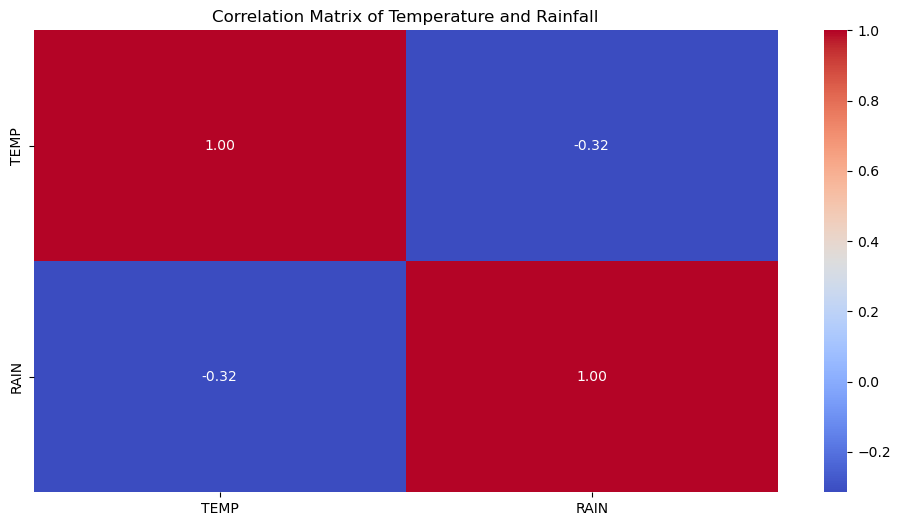

In [20]:
# Correlation between temperature and rainfall
corr_temp_rain = temp_rain.corr()
# Remove the YEAR column from the correlation matrix
corr_temp_rain = corr_temp_rain.drop(columns=['YEAR'])
# Remove the YEAR row from the correlation matrix
corr_temp_rain = corr_temp_rain.drop(index=['YEAR'])
# Plotting the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(corr_temp_rain, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Temperature and Rainfall')
plt.show()


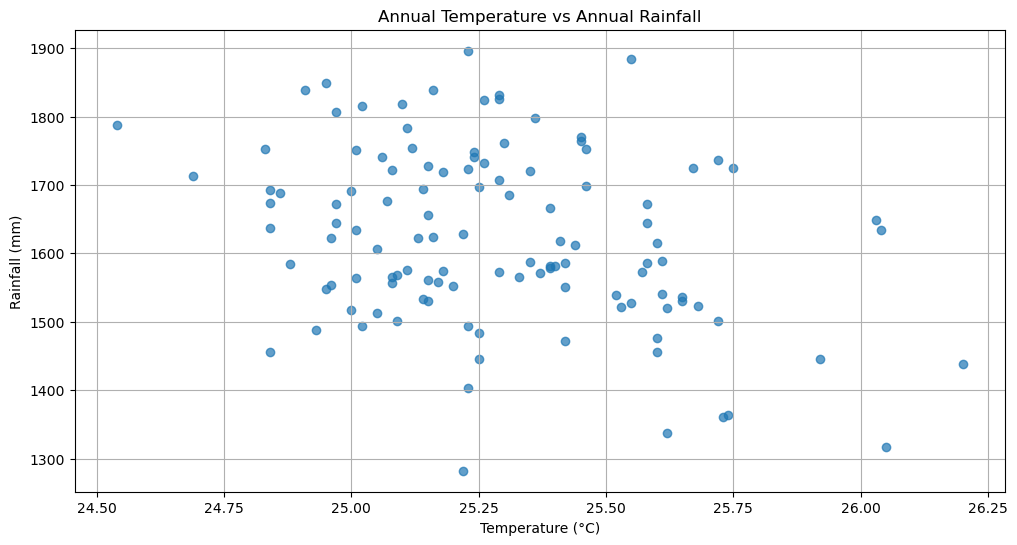

In [21]:
# Plotting the scatter plot of annual temperature vs annual rainfall
plt.figure(figsize=(12, 6))
plt.scatter(temp_rain['TEMP'], temp_rain['RAIN'], alpha=0.7)
plt.title('Annual Temperature vs Annual Rainfall')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.grid()
plt.show()

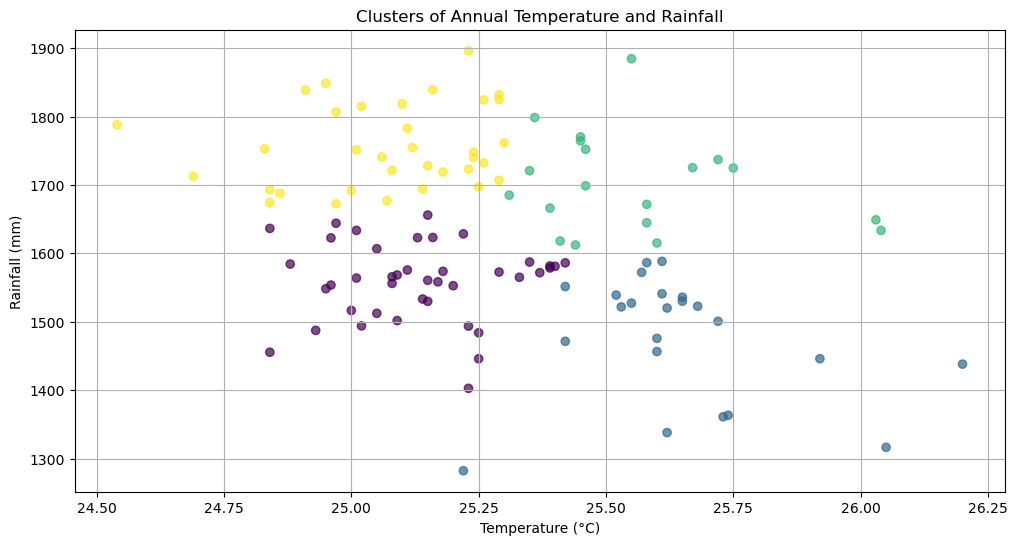

In [22]:
# Performing CLustering over the dataset
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Scaling the data
scaler = StandardScaler()
temp_rain_scaled = scaler.fit_transform(temp_rain[['TEMP', 'RAIN']])
# Performing KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(temp_rain_scaled)

# Adding the cluster labels to the dataframe
temp_rain['CLUSTER'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(12, 6))
plt.scatter(temp_rain['TEMP'], temp_rain['RAIN'], c=temp_rain['CLUSTER'], cmap='viridis', alpha=0.7)
plt.title('Clusters of Annual Temperature and Rainfall')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.grid()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                   RAIN   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     12.70
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           0.000534
Time:                        16:13:09   Log-Likelihood:                -726.81
No. Observations:                 117   AIC:                             1458.
Df Residuals:                     115   BIC:                             1463.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4977.9636    941.373      5.288      0.0

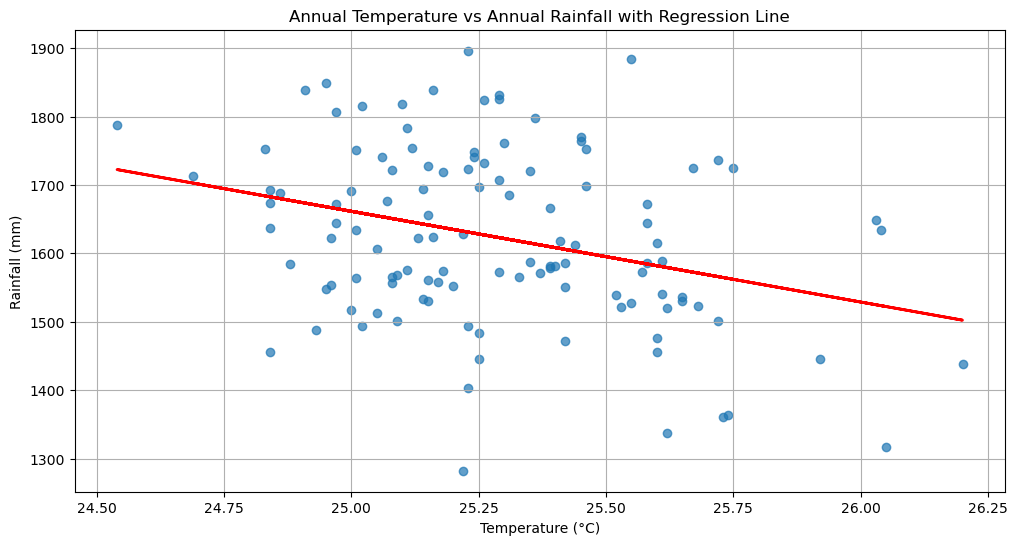

In [23]:
# FItting a Line over this data
import statsmodels.api as sm
# Adding a constant to the independent variable
X = sm.add_constant(temp_rain['TEMP'])
# Fitting the model
model = sm.OLS(temp_rain['RAIN'], X).fit()
# Printing the summary  
print(model.summary())
# Plotting the regression line
plt.figure(figsize=(12, 6))
plt.scatter(temp_rain['TEMP'], temp_rain['RAIN'], alpha=0.7)
plt.plot(temp_rain['TEMP'], model.predict(X), color='red', linewidth=2)
plt.title('Annual Temperature vs Annual Rainfall with Regression Line')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.grid()
plt.show()



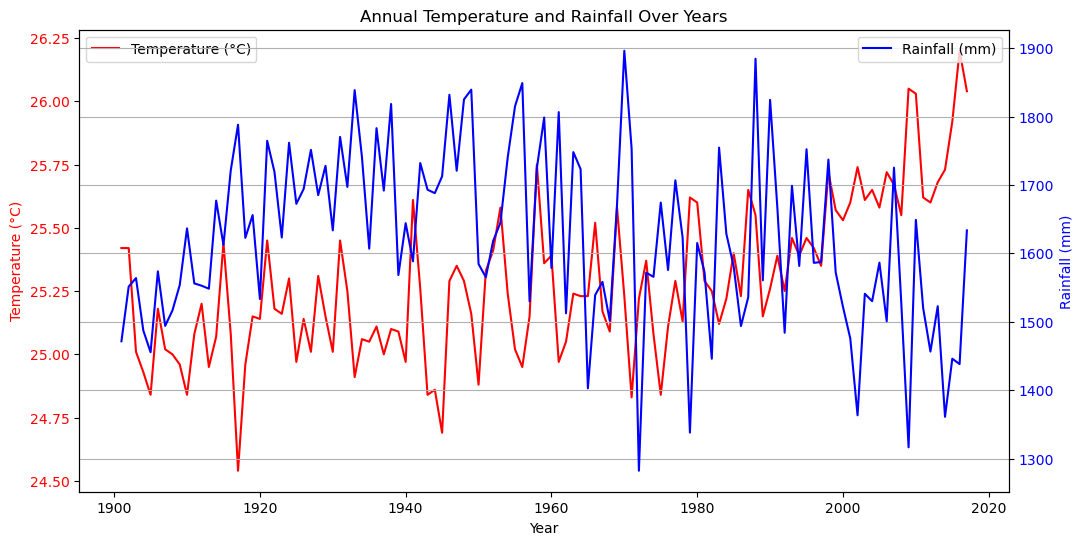

In [24]:
## Now, we will perform plotting of the rainfall and temperature over years on same plot. Left y axis will be temperature and right y axis will be rainfall
# Creating a new figure
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plotting the temperature data from temp_rain dataframe
ax1.plot(temp_rain['YEAR'], temp_rain['TEMP'], color='red', label='Temperature (°C)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature (°C)', color='red')
ax1.tick_params(axis='y', labelcolor='red')
# Creating a second y axis for rainfall
ax2 = ax1.twinx()
# Plotting the rainfall data from temp_rain dataframe
ax2.plot(temp_rain['YEAR'], temp_rain['RAIN'], color='blue', label='Rainfall (mm)')
ax2.set_ylabel('Rainfall (mm)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
# Adding title and grid
plt.title('Annual Temperature and Rainfall Over Years')
plt.grid()
# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()



### **A Correlation Heatmap**

Think of this heatmap as a simple scorecard showing how temperature ('TEMP') and rainfall ('RAIN') relate to each other.

*   **Reading the Grid:** The bright red squares just tell us that temperature is perfectly related to itself (a score of 1.00) and rainfall is perfectly related to itself (1.00). That's expected. The important squares are the blue ones, which show the connection *between* temperature and rainfall.
*   **The Key Number:** Inside the blue squares, we see the number **-0.32**. The minus sign (-) is crucial – it means the relationship is *negative* or *inverse*. This suggests that, generally, when one goes up, the other tends to go down.
*   **Decoding the Color:** The blue color corresponds to the negative end of the color scale on the right. It's a clear blue, but not the darkest possible blue. This tells us the negative relationship exists, but it's not extremely strong.
*   **The Story So Far:** This first clue suggests a **weak tendency for hotter years to have less rainfall**. A correlation of -0.32 isn't close to -1.0 (which would mean a perfect opposite relationship). So, while there's a hint in that direction, it's not a powerful connection. High temperature doesn't automatically guarantee low rainfall based on this score alone.


### **The Scatter Plot**

This plot gives us a more detailed view by plotting each data point as a single blue dot.

*   **Mapping the Dots:** Each dot's position tells a story. How far right it is shows how high the temperature was (hotter to the right). How high up it is shows how much rain fell (more rain higher up).
*   **The Cloud of Points:** Look at how the dots are scattered. They don't fall neatly along a downward-sloping line. Instead, they form a dispersed cloud.
    *   We can find dots in the top right corner – meaning **hot years with high rainfall**.
    *   We can find dots in the bottom left corner – meaning **cool years with low rainfall**.
    *   We also see dots in the top left (cool/wet) and bottom right (hot/dry), which align with the negative correlation idea.
*   **What the Scatter Tells Us:** The fact that the dots are so spread out, forming more of a cloud than a line, visually confirms the weak relationship hinted at by the heatmap. If high temperature strongly meant low rainfall, most dots would cluster in a band from the top-left down to the bottom-right. The wide scatter means knowing the temperature doesn't let you confidently guess the rainfall. Lots of other factors are clearly at play.


### **Clusters on the Scatter Plot**

This plot adds another layer by using different colors to group years with similar temperature and rainfall combinations. The computer identified four main types of years.

*   **The Four Groups:**
    *   **Yellow Dots:** These tend to be on the cooler side (left, around 24.75°C to 25.25°C) and have higher rainfall (top, mostly above 1700 mm). These represent the **cool and wet** years.
    *   **Purple Dots:** These are also on the cooler side (left, mostly 24.75°C to 25.25°C) but have lower rainfall (middle/bottom, roughly 1450 mm to 1650 mm). These are the **cool and relatively dry** years.
    *   **Green Dots:** These shift towards the warmer side (middle/right, around 25.25°C to 25.75°C) but surprisingly have higher rainfall (top/middle, mostly 1550 mm to 1800 mm). These are the **warm and relatively wet** years.
    *   **Blue Dots:** These are mostly found on the warmer side (right, 25.25°C to over 26.0°C) and have lower rainfall (bottom, generally below 1550 mm). These represent the **warm and dry** years.
*    This grouping is very revealing! It clearly shows that high rainfall can happen when it's cool (yellow) *and* when it's warm (green). Similarly, lower rainfall happens when it's cool (purple) *and* when it's warm (blue). The existence of the "warm and wet" green cluster strongly contradicts the simple idea that high temperature automatically leads to low rainfall. The relationship is clearly more complex.


### **The Average Trend**

This final picture adds a straight red line to the scatter plot. This line represents the best single straight-line summary of the overall trend.

*   **The Downward Slope:** Notice the red line slopes downwards as you move from left to right. This visually represents the negative correlation (-0.32) we saw earlier. It shows the *average* pattern: as temperature goes up, the line predicts *slightly* lower rainfall.
*   **Dots vs. Line:** Now, look at the blue dots again. Many of them are quite far away from the red line, both above and below it.
*   **What the Line Reveals:** The downward slope confirms the *average tendency* for hotter years to be slightly drier. However, the fact that so many individual dots (representing actual years) are far from this line shows that the line is not a reliable predictor for any specific year. It captures a weak overall drift, but the actual rainfall for a given temperature can swing wildly above or below this average trend.



Based on these pictures, the answer is **No, not reliably.**

While the data shows a **weak negative relationship** (correlation -0.32), meaning there's a slight statistical tendency for hotter years to have less rainfall *on average*, this connection is too weak to be a firm rule.

*   The points are widely scattered on the plots.
*   We clearly see distinct groups of years that are warm/wet, warm/dry, cool/wet, and cool/dry.
*   The overall trend line slopes slightly downwards, but many actual years deviate significantly from this average trend.

Therefore, you cannot confidently predict low rainfall just because a year has high temperatures based on this evidence. The relationship is weak, and other factors clearly have a significant influence on India's rainfall.


## Exploring the Harvest: A Look Inside India's Crop Data

Now that we've explored the temperature and rainfall patterns that set the stage for agriculture in India, let's dive into the crops themselves. These plots give us a first look at the dataset containing information about what's grown, where, when, and how much yield is achieved.

In [25]:
# reading the data from the csv file for EDA on crops
data = pd.read_csv("crop_yield.csv")
data

Crop  Crop_Year       Season              State      Area  \
0           Arecanut       1997  Whole Year               Assam   73814.0   
1          Arhar/Tur       1997  Kharif                   Assam    6637.0   
2        Castor seed       1997  Kharif                   Assam     796.0   
3           Coconut        1997  Whole Year               Assam   19656.0   
4       Cotton(lint)       1997  Kharif                   Assam    1739.0   
...              ...        ...          ...                ...       ...   
19684  Small millets       1998  Kharif                Nagaland    4000.0   
19685          Wheat       1998  Rabi                  Nagaland    1000.0   
19686          Maize       1997  Kharif       Jammu and Kashmir  310883.0   
19687           Rice       1997  Kharif       Jammu and Kashmir  275746.0   
19688          Wheat       1997  Rabi         Jammu and Kashmir  239344.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide        Yield  
0           56708           2051.4   7024878.38   22882.34     0.796087  
1            4685           2051.4    631643.29    2057.47     0.710435  
2              22           2051.4     75755.32     246.76     0.238333  
3       126905000           2051.4   1870661.52    6093.36  5238.051739  
4             794           2051.4    165500.63     539.09     0.420909  
...           ...              ...          ...        ...          ...  
19684        2000           1498.0    395200.00    1160.00     0.500000  
19685        3000           1498.0     98800.00     290.00     3.000000  
19686      440900           1356.2  29586735.11   96373.73     1.285000  
19687        5488           1356.2  26242746.82   85481.26     0.016667  
19688      392160           1356.2  22778368.48   74196.64     1.261818  

[19689 rows x 10 columns]

In [26]:
# Finding the names of the unique states in the dataset
unique_states = data["State"].unique()
print("Unique states in the dataset:")
for state in unique_states:
    print(state)
print("\n\n")


Unique states in the dataset:
Assam
Karnataka
Kerala
Meghalaya
West Bengal
Puducherry
Goa
Andhra Pradesh
Tamil Nadu
Odisha
Bihar
Gujarat
Madhya Pradesh
Maharashtra
Mizoram
Punjab
Uttar Pradesh
Haryana
Himachal Pradesh
Tripura
Nagaland
Chhattisgarh
Uttarakhand
Jharkhand
Delhi
Manipur
Jammu and Kashmir
Telangana
Arunachal Pradesh
Sikkim





State not in the dataset:  Telengana
State not in the dataset:  Andaman and Nicobar
State not in the dataset:  Daman & Diu
State not in the dataset:  Lakshadweep
State not in the dataset:  Chandigarh
State not in the dataset:  Rajasthan
State not in the dataset:  Dadra and Nagar Haveli and Daman and Diu


/var/folders/nj/cv7zrr5s39g_d0x2440hndx40000gp/T/ipykernel_42282/4235624821.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(states_map.geometry.centroid.x, states_map.geometry.centroid.y, states_map['st_nm']):


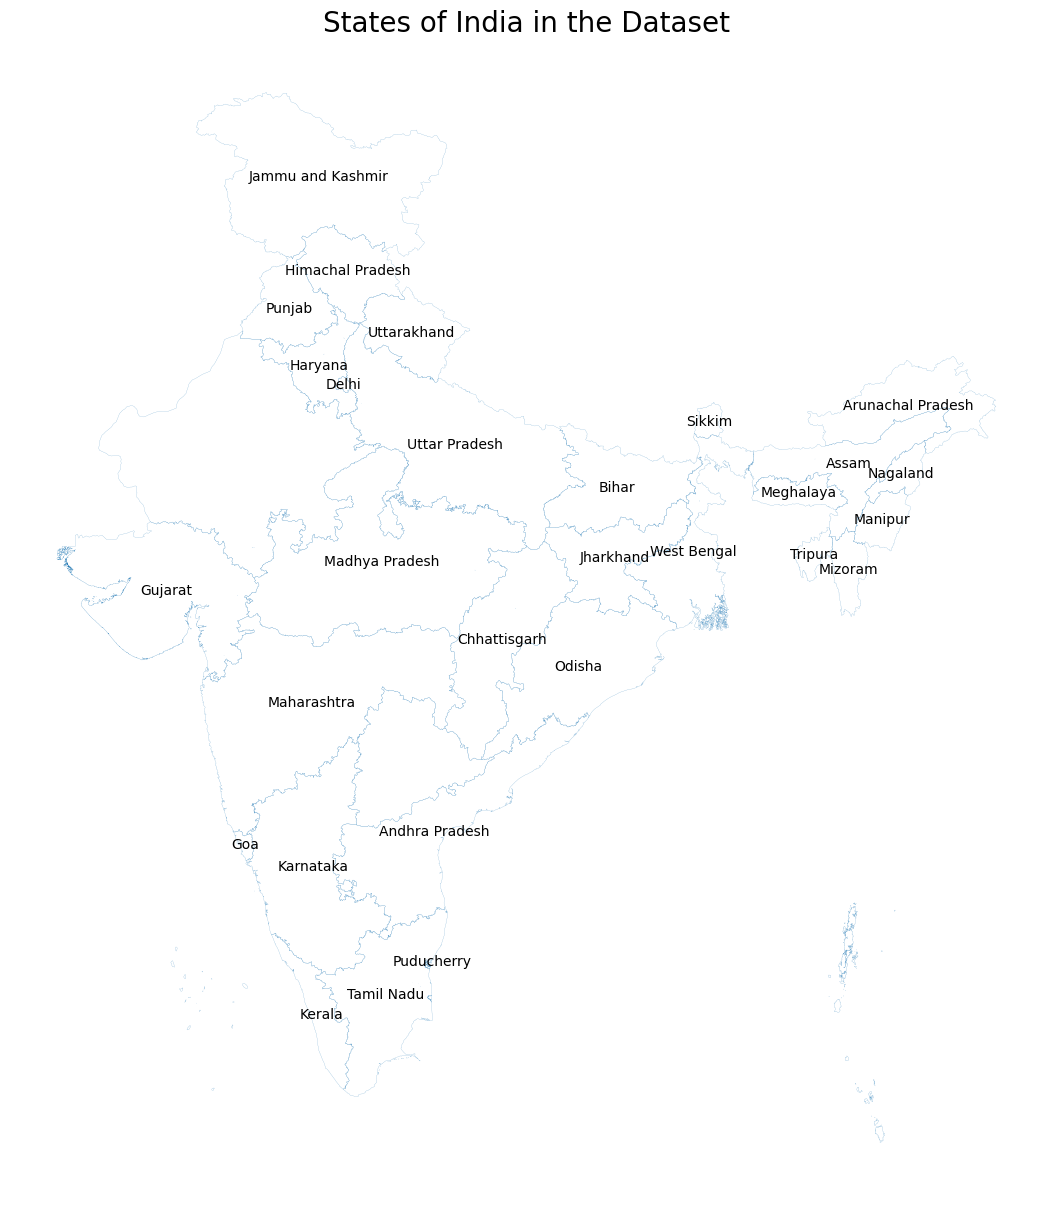

In [28]:
# Plotting these states on India Map 
import geopandas as gpd
# The geojson file for the states of India is states_india.geojson
# Each state should have a different colour and the states should be labelled with their names
# Reading the geojson file
states_map = gpd.read_file("states_india.geojson")
# cartodb_id	state_code	st_nm	geometry
# We will plot the map, colour all the states and name them
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
# Plotting the map
states_map.boundary.plot(ax=ax, linewidth=0.1)
# Adding the names of the states
for x, y, label in zip(states_map.geometry.centroid.x, states_map.geometry.centroid.y, states_map['st_nm']):
    if label in unique_states:
        # Plotting the state name
        ax.text(x, y, label, fontsize=10, ha='center', va='center', color='black')
    # ax.text(x, y, label, fontsize=10, ha='center', va='center', color='black')
    else:
        print("State not in the dataset: ", label)

# Adding title
plt.title("States of India in the Dataset", fontsize=20)
plt.axis('off')
plt.show()  

### **Our Agricultural Map: Where the Story Unfolds**

This first plot is a map showing the different states covered in our crop dataset. It acts as our geographical guide. We can see familiar shapes like Jammu and Kashmir reaching towards the north, Gujarat pushing out to the west, Kerala tucked in the southwest corner, and the cluster of states like Arunachal Pradesh and Assam in the northeast. Major agricultural heartlands like Uttar Pradesh, Punjab, Haryana, Madhya Pradesh, and Maharashtra are clearly marked, along with coastal states like Tamil Nadu and Odisha, and southern states like Karnataka and Telangana. Even smaller areas like Goa, Delhi, and Puducherry appear.

What this map tells us is that our crop data isn't just from one small corner of India. It's broad, covering a vast and diverse range of climates, soils, and farming practices found across the country. From the Himalayan foothills to the tropical south, from the arid west to the humid east, this dataset captures agricultural activities nationwide. This wide coverage is exciting because it means any patterns we find might tell a story about Indian agriculture as a whole, not just a specific region.

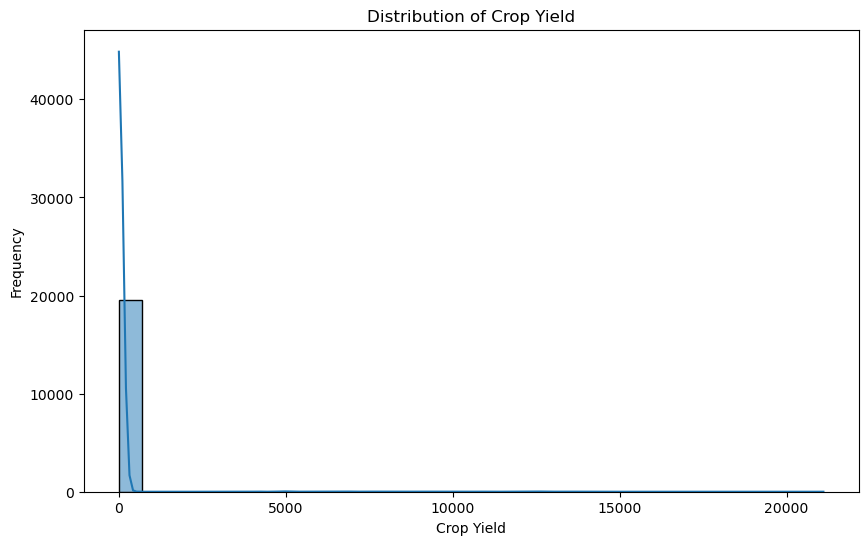

In [29]:
# Plotting the distribution of crop yield
plt.figure(figsize=(10, 6))
sns.histplot(data['Yield'], bins=30, kde=True)
plt.title('Distribution of Crop Yield')
plt.xlabel('Crop Yield')
plt.ylabel('Frequency')
plt.show()

### **What Does Crop Yield Look Like?**

Now, let's look at a crucial piece of information: crop yield. This tells us how much crop was harvested from a given area, perhaps measured in kilograms per hectare. This histogram tries to show us the distribution – are most yields high, low, or spread out?

What we see here is quite striking and perhaps unexpected. There's an enormous, tall bar right at the very beginning, close to zero yield. This bar represents yields between 0 and maybe 500 or 1000 units. After this huge initial spike, the frequency drops dramatically. We can barely see any bars representing higher yields (like 5000, 10000, or more). The smooth blue line, which tries to show the overall shape of the distribution, confirms this: it skyrockets near zero and then immediately flattens out, staying almost flat along the bottom for all higher yield values.

This tells us that the vast majority of crop yield records in this dataset report very low numbers. Why might this be? It could be several reasons mixed together. Perhaps the dataset includes many minor crops that naturally have very low yields per hectare compared to major staples. Maybe it includes records of crop failures where the yield was effectively zero. It's also possible the units used make the numbers seem small. Whatever the reason, this distribution is highly skewed – it's not a balanced bell curve at all. Most entries are clustered at the low end. This is important to know because simply calculating an "average" yield from this data might give a misleading picture, heavily pulled down by the huge number of very low values.

In [30]:
# Finding the names of the unique crops in the dataset
unique_crops = data["Crop"].unique()
print("Unique crops in the dataset:")
for crop in unique_crops:
    print(crop)
print("\n\n")

Unique crops in the dataset:
Arecanut
Arhar/Tur
Castor seed
Coconut 
Cotton(lint)
Dry chillies
Gram
Jute
Linseed
Maize
Mesta
Niger seed
Onion
Other  Rabi pulses
Potato
Rapeseed &Mustard
Rice
Sesamum
Small millets
Sugarcane
Sweet potato
Tapioca
Tobacco
Turmeric
Wheat
Bajra
Black pepper
Cardamom
Coriander
Garlic
Ginger
Groundnut
Horse-gram
Jowar
Ragi
Cashewnut
Banana
Soyabean
Barley
Khesari
Masoor
Moong(Green Gram)
Other Kharif pulses
Safflower
Sannhamp
Sunflower
Urad
Peas & beans (Pulses)
other oilseeds
Other Cereals
Cowpea(Lobia)
Oilseeds total
Guar seed
Other Summer Pulses
Moth





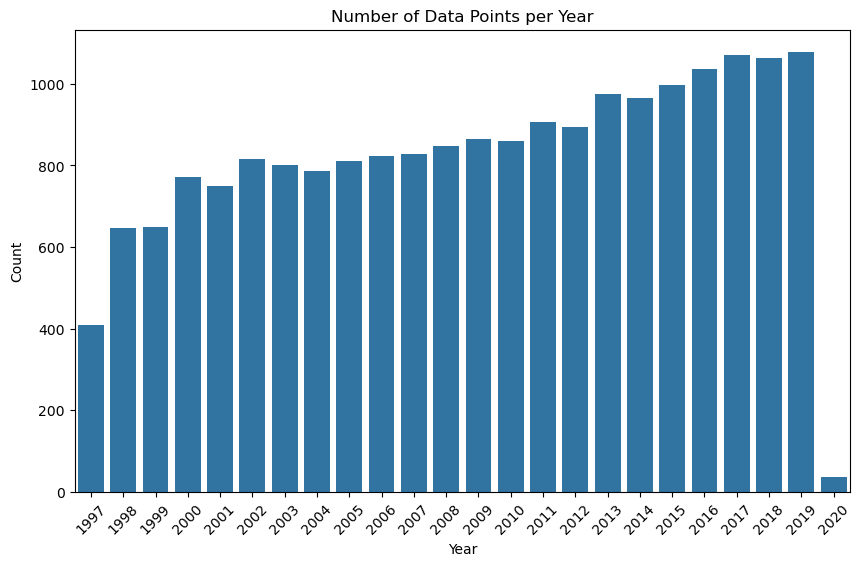

In [31]:
# Plotting the number of datapoints per year
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Crop_Year')
plt.title('Number of Data Points per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### **When Was the Data Collected?**

Having seen *where* the data comes from, let's look at *when*. This bar chart shows us the timeline of our crop data, counting how many records (like a specific crop grown in a specific state during a specific season) we have for each year, starting from 1997 and going up to 2020.

The height of each bar tells us how much information is available for that particular year. We can see the story unfolds over time. In the beginning, 1997 has the lowest bar, meaning less data was recorded or available then. The amount of data jumps up noticeably in 1998 and 1999. Through the early 2000s (from 2000 to about 2007), the number of records stays relatively stable but gradually increases. From around 2008 onwards, and especially after 2011, the bars get taller and taller, reaching their peak in the late 2010s (like 2016, 2017, 2018, 2019), where we have over 1000 data points per year. This suggests that data collection improved significantly over time, or the scope expanded to include more crops or details in later years.

There's one tiny bar at the very end for 2020. This likely means the data for 2020 is incomplete, perhaps collected only partially when the dataset was compiled. So, we should be cautious if we analyze that specific year. Overall, this plot tells us that our dataset becomes richer and more detailed as we move closer to the present day.

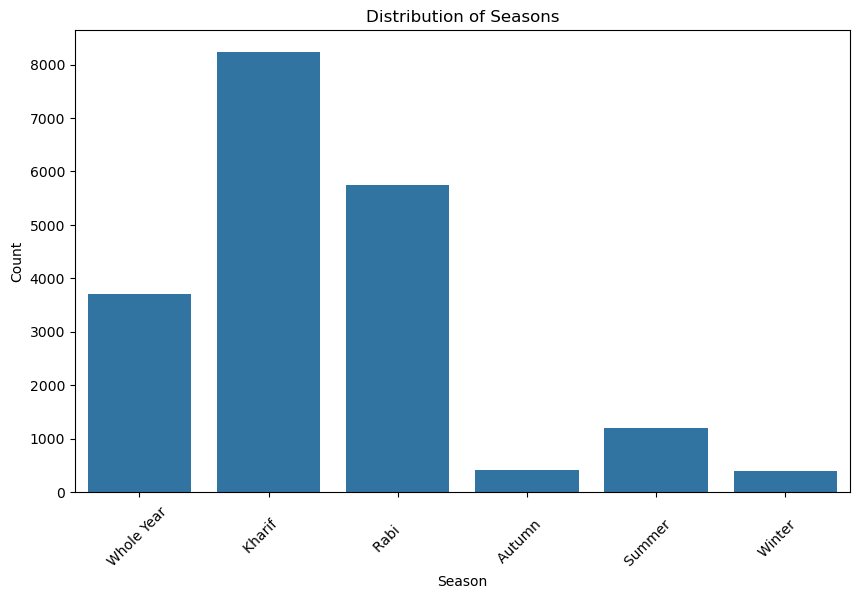

In [32]:
# Plotting the distribution of seasons
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Season')
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



### **Which Seasons Dominate?**

We see distinct bars for 'Kharif', 'Rabi', 'Whole Year', 'Summer', 'Autumn', and 'Winter'. The two tallest bars belong to 'Kharif' (monsoon season, usually June-September) and 'Rabi' (winter season, usually October-March). 'Kharif' has the highest count, with over 8000 records, closely followed by 'Rabi' with around 5700 records. This makes perfect sense, as these are the two primary cropping seasons across most of India, driven largely by the monsoon (for Kharif crops like rice) and the cooler winter temperatures (for Rabi crops like wheat).

The 'Whole Year' also has a substantial number of records (around 3700). This represents crops that grow year-round, such as sugarcane or certain plantation crops. The other seasons – 'Summer', 'Autumn', and 'Winter' – have much smaller bars, indicating fewer crop records associated specifically with these shorter or more regionally specific seasons.

This plot clearly tells us that our dataset is dominated by the Kharif and Rabi seasons. Any analysis we do on overall crop production or trends will be heavily influenced by what happens during these two main agricultural periods. It reinforces the importance of understanding the monsoon (for Kharif) and winter conditions (for Rabi) when we later connect this crop data back to the climate data.


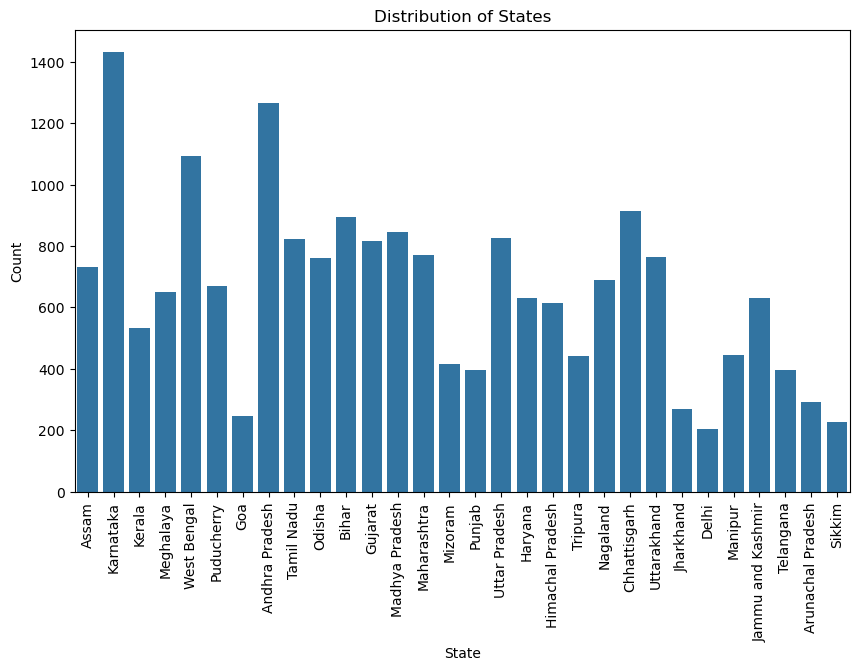

In [33]:
# Plotting the distribution of states
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='State')
plt.title('Distribution of States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### **A Closer Look at the Map: How Much Data Per State?**

We saw earlier that our data covers many states across India. This bar chart now tells us *how much* data we have for each specific state, counting the number of crop records (like 'Wheat grown in Uttar Pradesh during Rabi season in 2010') associated with each one.

The bars vary quite a bit in height. Some states stand out with very tall bars, meaning we have a lot of information about their agriculture. **Karnataka** has the highest bar, soaring above 1400 records, suggesting a very detailed picture of its farming activities in this dataset. **Andhra Pradesh** also has a very high count, well over 1200. **West Bengal**, **Madhya Pradesh**, **Uttar Pradesh**, **Gujarat**, **Tamil Nadu**, **Odisha**, **Bihar**, and **Maharashtra** all have substantial representation, generally between 700 and 1100 records each. This is good news, as these are major agricultural states, and having lots of data means we can potentially draw more robust conclusions about their trends.

On the other hand, some states have much shorter bars. **Delhi**, **Puducherry**, **Goa**, **Jharkhand**, **Manipur**, and **Sikkim**, for example, have fewer than 300 records each. This doesn't mean agriculture isn't important there, but simply that this specific dataset contains less detailed information for them compared to the bigger players.

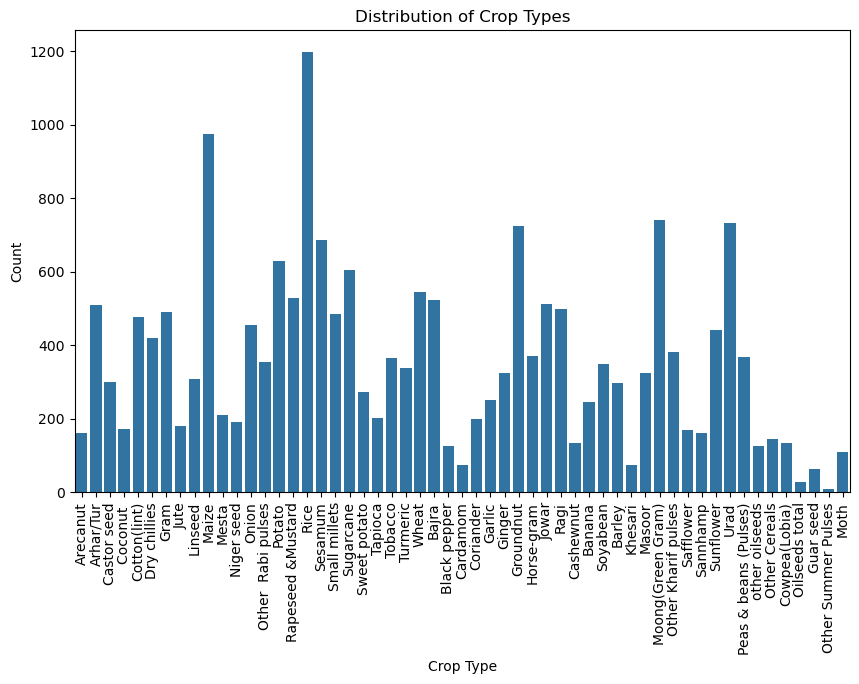

In [34]:
# Crop types
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Crop')
plt.title('Distribution of Crop Types')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### **What Crops Are We Tracking?**

This next bar chart shifts focus from *where* to *what*. It lists dozens of different crop types found in the dataset and shows how many records we have for each one.

It's immediately clear that the dataset is incredibly diverse, listing everything from major grains and pulses to oilseeds, spices, vegetables, and plantation crops. However, just like with the states, some crops feature much more prominently than others. **Rice** stands out with the tallest bar, having around 1200 records, confirming its central importance in Indian agriculture, especially during the Kharif season we saw earlier. **Maize** and **Moong (Green Gram)** also have very high counts, close to 1000 records each. **Gram** (likely chickpea), **Rapeseed & Mustard**, **Wheat**, **Urad** (black gram), **Sugarcane**, **Groundnut**, and **Soyabean** are also well-represented, each appearing in several hundred records.

This tells us the dataset has a strong focus on India's staple food crops and major commercial crops. But it's fascinating to see the breadth – we also have data, albeit less frequently, for things like **Arecanut**, **Cashewnut**, **Cardamom**, **Ginger**, **Garlic**, **Jute**, **Linseed**, **Safflower**, **Sunflower**, **Sweet potato**, **Tapioca**, and various millets and pulses. This plot highlights the richness of Indian agriculture reflected in the data.

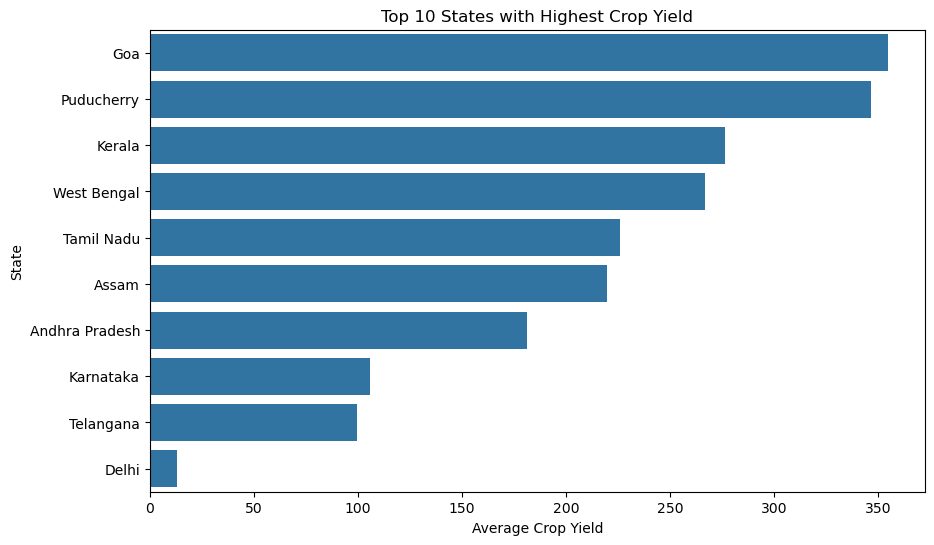

In [35]:
# Top 10 states with the highest crop yield
top_10_states = data.groupby('State')['Yield'].mean().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_states, x='Yield', y='State')
plt.title('Top 10 States with Highest Crop Yield')
plt.xlabel('Average Crop Yield')
plt.ylabel('State')
plt.show()


### **Which States Average the Highest Harvest?**

Now things get really interesting as we start looking at average crop yield. This horizontal bar chart ranks the top 10 states based on their *average* crop yield across all the crops and years recorded for them in the dataset.

The results might be surprising! The state with the highest average yield is **Goa**, followed very closely by **Puducherry**. **Kerala** comes in third. These are relatively small states or union territories. **West Bengal**, **Tamil Nadu**, **Assam**, **Andhra Pradesh**, **Karnataka**, **Telangana**, and **Delhi** make up the rest of the top 10.

Why are smaller states like Goa, Puducherry, and Kerala topping this list? It's likely *not* because they produce the most food overall, but perhaps because their average is boosted by specific high-value or high-yield-per-area crops that are common there (like plantation crops, spices, or certain fruits/vegetables). It could also be related to the mix of crops included in the dataset for these states, or potentially differences in calculation methods or units for certain crops predominant in these areas. Remember the yield histogram showed most records having very low yields? These states must have a significant number of records with yields high enough to pull their overall average way up, far above the typical values seen for many staple crops in other states.


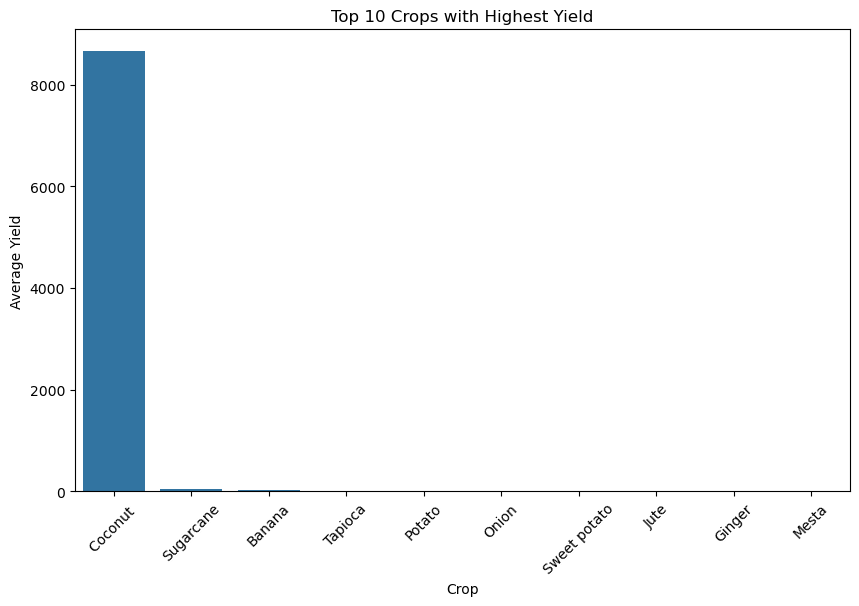

In [36]:
# Finding the top 5 crops with the highest yield
top_5_crops = data.groupby('Crop')['Yield'].mean().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_crops.index, y=top_5_crops.values)
plt.title('Top 10 Crops with Highest Yield')
plt.xlabel('Crop')
plt.ylabel('Average Yield')
plt.xticks(rotation=45)
plt.show()

### **Crops with highest Yield**

The result is absolutely dominated by one crop: **Coconut**. Its bar towers over all others, reaching an average yield close to 9000 units. The second crop, **Sugarcane**, has a much, much smaller bar, maybe only around 50-100 units on this scale. **Banana**, **Tapioca**, **Potato**, **Onion**, **Sweet potato**, **Jute**, **Ginger**, and **Mesta** follow, all with average yields that look tiny compared to Coconut.

This plot provides a huge clue to understanding both the high average yields in states like Kerala and Goa (where coconut is extensively grown) and the highly skewed yield histogram we saw earlier. The enormous yields reported for Coconut (potentially due to how it's measured – maybe total weight including husk, or yield over many years for long-lived trees) are likely pulling up the averages significantly in regions where it's common. It also explains why the histogram had such a massive spike near zero and then almost nothing at higher values, most crops likely fall into that low-yield category, while outlier crops like Coconut create a very long tail at the high end, even if represented by fewer records overall compared to staples like rice or wheat. This plot reveals that "yield" means very different things for different types of crops, and Coconut is in a league of its own in this dataset.



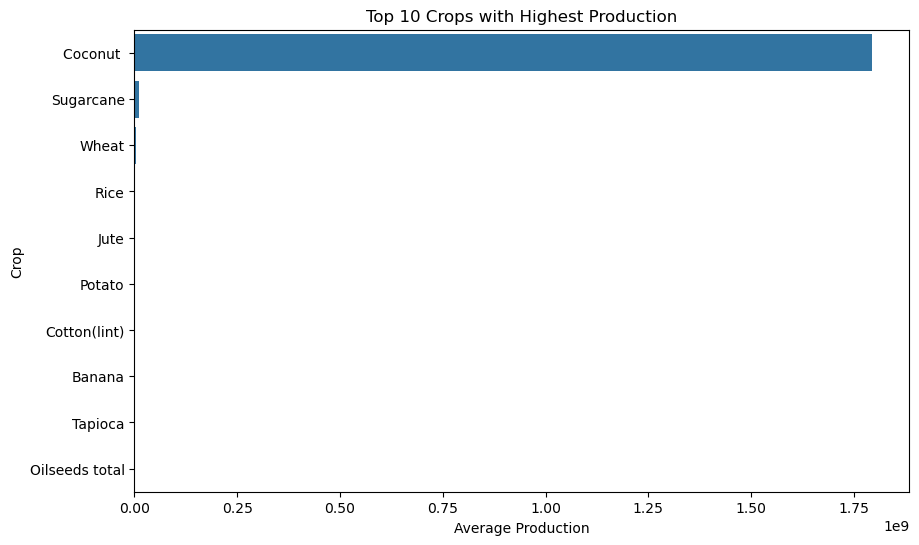

In [37]:
# Top 10 crops of highest Production
top_10_crops = data.groupby('Crop')['Production'].mean().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_crops, x='Production', y='Crop')
plt.title('Top 10 Crops with Highest Production')
plt.xlabel('Average Production')
plt.ylabel('Crop')
plt.show()



### **Top 10 Crops by Total Production**

The result is stark and echoes what we suspected from the state production chart. **Coconut** absolutely dominates. Its bar stretches incredibly far, reaching about 1.75e9 (1.75 billion) units of production. All other crops pale in comparison. **Sugarcane** comes in a very distant second, with a bar so small it's barely visible next to Coconut's.

Further down, we see **Wheat** and **Rice**, India's staple food grains. While grown over vast areas, their total production weight in this dataset is massively overshadowed by Coconut. Other crops making the top 10 for total production include **Jute**, **Potato**, **Cotton (lint)**, **Banana**, **Tapioca**, and a category labelled **Oilseeds total**.


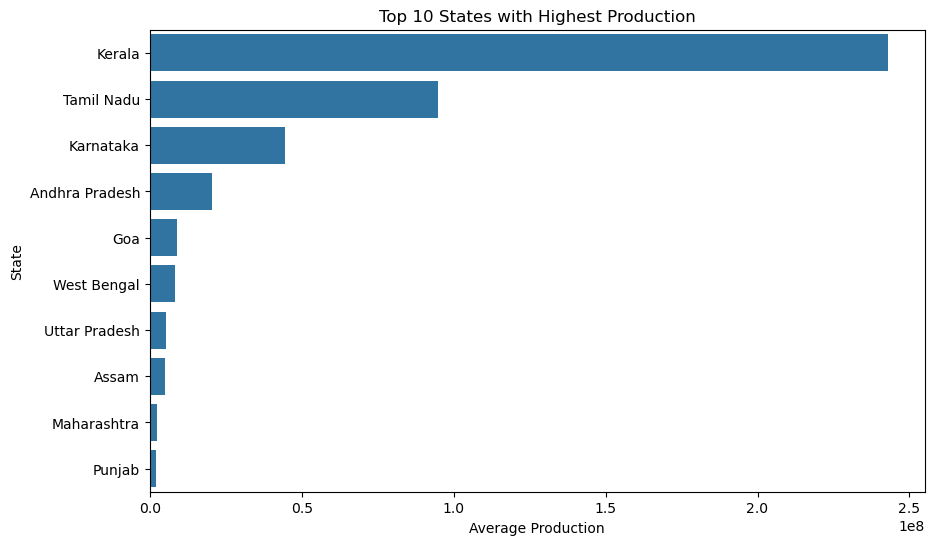

In [38]:
# Top 10 states with the highest production
top_10_states_production = data.groupby('State')['Production'].mean().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_states_production, x='Production', y='State')
plt.title('Top 10 States with Highest Production')
plt.xlabel('Average Production')
plt.ylabel('State')
plt.show()

### **Which States Produce the Most Overall?**

This bar chart ranks the top 10 states based on their *total output* across all crops and years. **Kerala** jumps to the very top with the longest bar by a significant margin, reaching almost 2.5e8 (250 million) units of production. **Tamil Nadu** is second, with a production total around 1.0e8 units. **Karnataka** and **Andhra Pradesh** also feature prominently in the top 4.

Further down the list, we see **Goa**, **West Bengal**, **Uttar Pradesh**, **Assam**, **Maharashtra**, and **Punjab**. Notice how states like Uttar Pradesh and Maharashtra, which dominated the *area* chart, are much lower down on this *production* chart. Conversely, Kerala and Tamil Nadu, which had less total area, dominate the figures.

It strongly suggests that the *type* of crops grown heavily influences total production figures. Kerala and Tamil Nadu's high ranking here is almost certainly linked to the extremely high *production* numbers associated with crops like Coconut (which we saw earlier had massive yield figures) and possibly other high-volume plantation crops common in these southern states. Uttar Pradesh and Maharashtra farm vast areas, but perhaps focus more on grains or other crops that have lower production weight per unit area compared to something like Coconut. This highlights the difference between farming large areas and generating large total weight/volume of output.

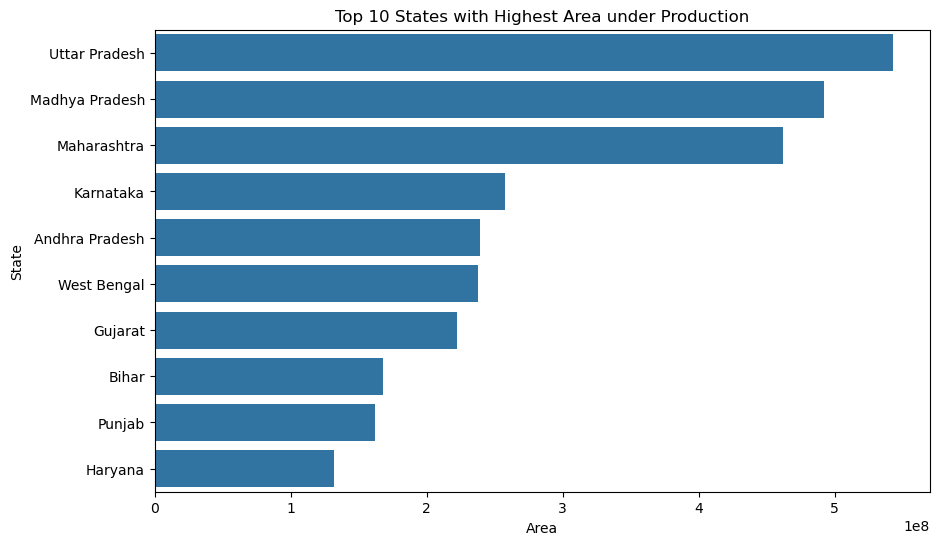

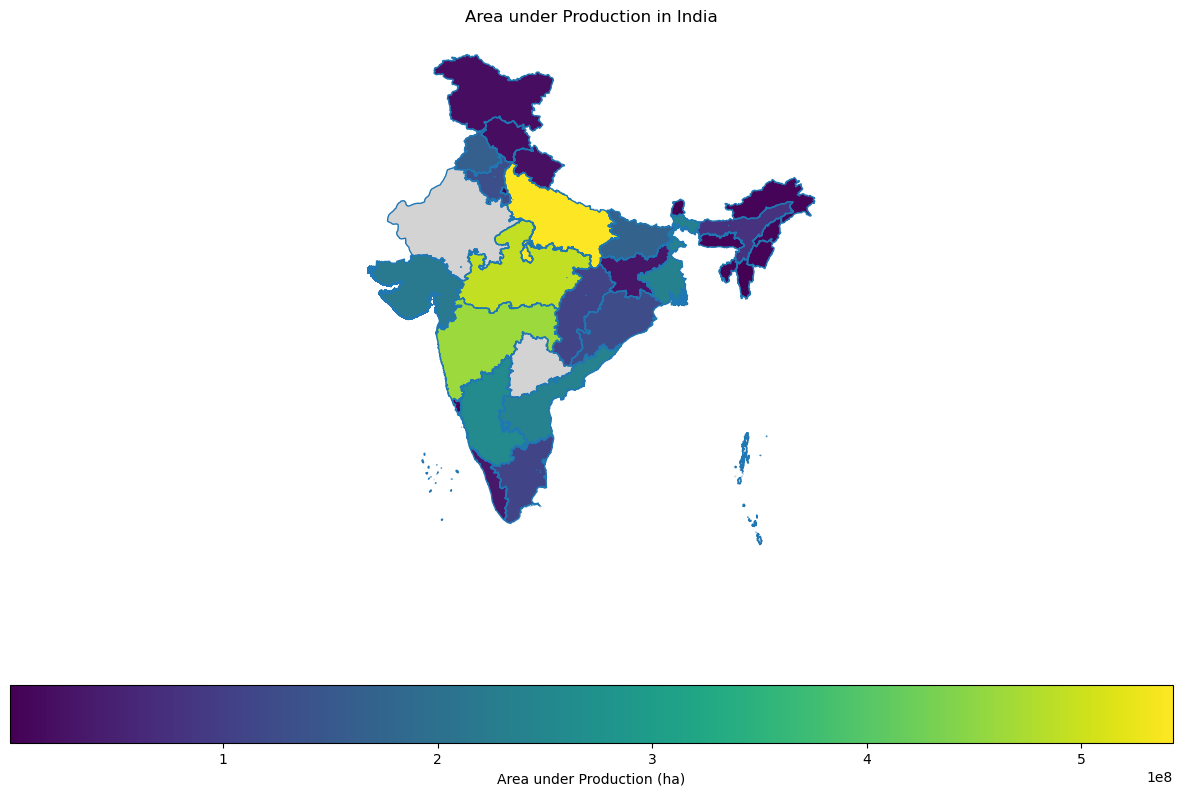

In [39]:
# States with the highest area under production over all seasons
# Crop	Crop_Year	Season	State	Area	Production	Annual_Rainfall	Fertilizer	Pesticide	Yield
States_area_production = data.groupby('State')['Area'].sum().reset_index()
# Plotting the top 10 states with the highest area under production
plt.figure(figsize=(10, 6))
sns.barplot(data=States_area_production.nlargest(10, 'Area'), x='Area', y='State')
plt.title('Top 10 States with Highest Area under Production')
plt.xlabel('Area')
plt.ylabel('State')
plt.show()
# States map with this data
# Plotting the states with the highest area under production over all seasons
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the GeoJSON file of India (replace with the actual path)
india_states = gpd.read_file("states_india.geojson")

# We will have the data of the area under production in the states_area_production dataframe
# Selecting only the relevant columns for merging
states_area_production = States_area_production[['State', 'Area']]
# Assuming your GeoJSON has a column named 'st_nm' for state names.
# You might need to inspect your GeoJSON file and adjust the 'key_on' parameter accordingly.
india_states['NAME_MERGE'] = india_states['st_nm'].str.replace('&', 'and', regex=False)
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Andaman and Nicobar', 'Andaman & Nicobar Islands')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Arunanchal Pradesh', 'Arunachal Pradesh')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Uttaranchal', 'Uttarakhand')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Delhi', 'Delhi') # Ensure exact match
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Chandigarh', 'Chandigarh') # Ensure exact match

# Merge the GeoDataFrame with the area under production data
merged_data = india_states.merge(states_area_production, left_on='NAME_MERGE', right_on='State', how='left')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Plotting the map with the rainfall data
merged_data.boundary.plot(ax=ax, linewidth=1)
# Plotting the rainfall data
merged_data.plot(column='Area', ax=ax, legend=True,
                 legend_kwds={'label': "Area under Production (ha)",
                              'orientation': "horizontal"},
                 cmap='viridis', missing_kwds={"color": "lightgrey"})
plt.title('Area under Production in India')
plt.axis('off')
plt.show()

### **Top 10 States by Area**

This bar chart ranks the top 10 states based purely on the *total area* dedicated to crop production summed across the years in our dataset.

**Uttar Pradesh** sits firmly at the top, with the longest bar, exceeding 5e8 (500 million) units of area. **Madhya Pradesh** is a strong second, followed closely by **Maharashtra**. **Karnataka**, **Andhra Pradesh**, **West Bengal**, and **Gujarat** form the next tier, each showing significant agricultural land use. **Bihar**, **Punjab**, and **Haryana**, despite being smaller states geographically, make it into the top 10, highlighting their intensive agricultural focus.

Comparing this list to the map (below the plot) reinforces the visual impression. The states coloured yellow and green on the map are precisely the ones leading this chart. It emphasizes that states with large plains and favourable conditions for large-scale farming dominate when measured by total cultivated area. This is where the most hectares are being sown and harvested year after year according to our data.

### **Where is Most Land Under Cultivation?**

This map paints a picture of India based on how much land in each state is dedicated to growing the crops included in our dataset. The colours show the *total area under production*, measured in hectares. The colour bar at the bottom gives us the scale: darker purples and blues represent less area, while greens and yellows indicate much larger areas. The scale goes from near zero up to over 5e8 (which is 500 million) hectares.

Immediately, our eyes are drawn to the bright yellow and green heartland of India. States like **Uttar Pradesh** stand out in bright yellow, indicating the largest total cultivated area according to this data. Neighbouring states like **Madhya Pradesh** and **Maharashtra** show up in vibrant green, also representing very large farmed areas. Other states like **Karnataka**, **Andhra Pradesh**, **West Bengal**, and **Gujarat** show lighter green or teal colours, indicating substantial but somewhat smaller total areas compared to the leaders. In contrast, the northeastern states, Himalayan states like Jammu & Kashmir, and smaller states like Kerala or Goa appear in darker blues and purples, showing significantly less total area dedicated to these crops within this dataset's scope.

This map tells a clear story: the vast plains of North and Central India, along with parts of the Deccan plateau and eastern regions, are where agriculture, at least for the crops in this dataset, occupies the most land. This is the agricultural engine room of the country in terms of sheer scale.


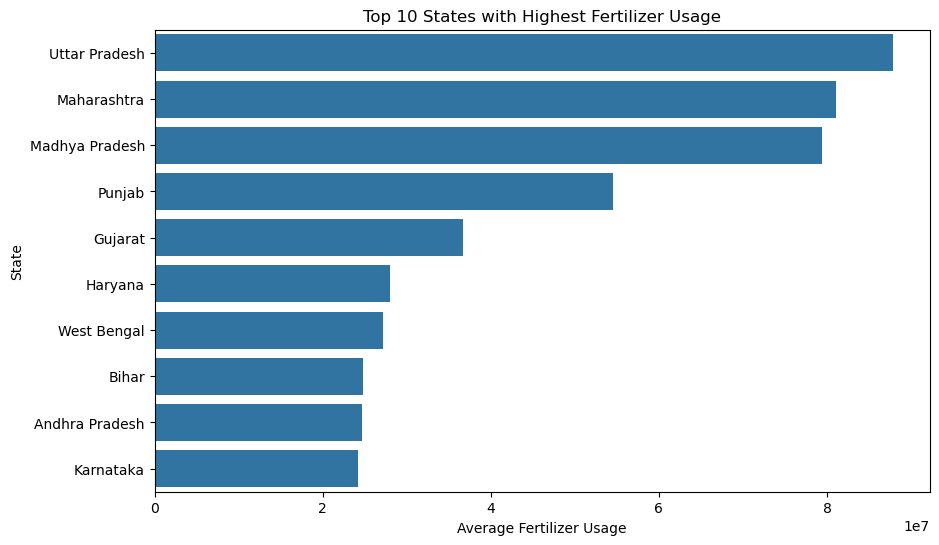

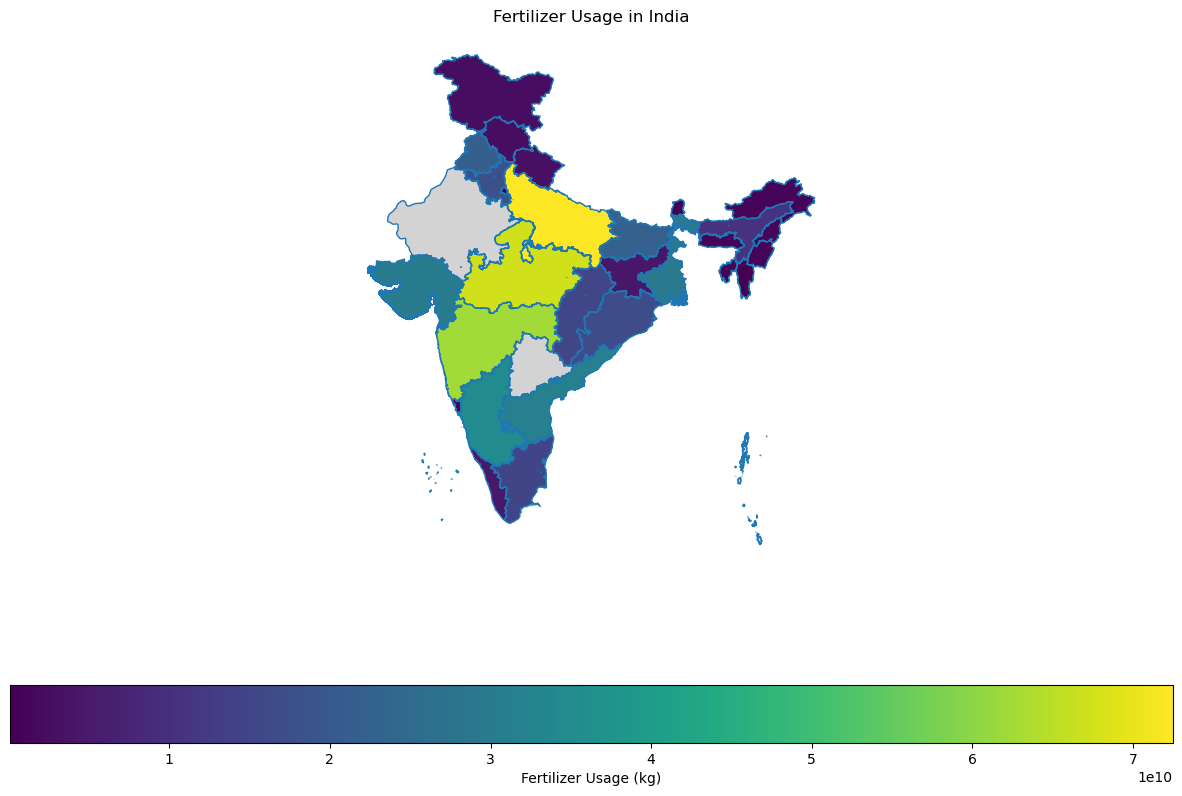

In [40]:
# States that use the highest amount of fertilizer
# Fertilizer
# Plotting the top 10 states with the highest fertilizer usage
States_fertilizer = data.groupby('State')['Fertilizer'].sum().reset_index()
top_10_states_fertilizer = data.groupby('State')['Fertilizer'].mean().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_states_fertilizer, x='Fertilizer', y='State')
plt.title('Top 10 States with Highest Fertilizer Usage')
plt.xlabel('Average Fertilizer Usage')
plt.ylabel('State')
plt.show()
# Plotting on maps
# Plotting the states with the highest fertilizer usage

# Load the GeoJSON file of India (replace with the actual path)
india_states = gpd.read_file("states_india.geojson")

# We will have the data of the area under production in the states_area_production dataframe
# Selecting only the relevant columns for merging
states_fertilizer = States_fertilizer[['State', 'Fertilizer']]
# Assuming your GeoJSON has a column named 'st_nm' for state names.
# You might need to inspect your GeoJSON file and adjust the 'key_on' parameter accordingly.
india_states['NAME_MERGE'] = india_states['st_nm'].str.replace('&', 'and', regex=False)
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Andaman and Nicobar', 'Andaman & Nicobar Islands')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Arunanchal Pradesh', 'Arunachal Pradesh')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Uttaranchal', 'Uttarakhand')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Delhi', 'Delhi') # Ensure exact match
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Chandigarh', 'Chandigarh') # Ensure exact match

# Merge the GeoDataFrame with the area under production data
merged_data = india_states.merge(states_fertilizer, left_on='NAME_MERGE', right_on='State', how='left')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Plotting the map with the rainfall data
merged_data.boundary.plot(ax=ax, linewidth=1)
# Plotting the rainfall data
merged_data.plot(column='Fertilizer', ax=ax, legend=True,
                    legend_kwds={'label': "Fertilizer Usage (kg)",
                                'orientation': "horizontal"},
                    cmap='viridis', missing_kwds={"color": "lightgrey"})
plt.title('Fertilizer Usage in India')
plt.axis('off')
plt.show()

## Exploring Fertilizer Use Across India

After looking at the land farmed, the crops grown, and the yields achieved, let's turn our attention to a key input that influences modern agriculture: fertilizer. These plots explore how much fertilizer is used across India, both in total volume and in terms of application intensity per unit of land.


### **Total Usage Across States**

This first map shows the *total* fertilizer consumption across India. The colours represent the total amount of fertilizer used (measured in kilograms, according to the color bar which goes up to a massive 7e10 or 70 billion kg), summed up over the years in the dataset for each state. Darker purples and blues mean lower total usage, while greens and yellows indicate significantly higher volumes.

The pattern here closely mirrors the map of total cultivated area we saw earlier. **Uttar Pradesh** shines brightly in yellow, indicating it consumes the largest absolute amount of fertilizer in the country. The neighbouring agricultural giants, **Maharashtra** and **Madhya Pradesh**, show up in vibrant green, also signifying very high total fertilizer usage. States like **Punjab**, **Haryana**, **Gujarat**, **West Bengal**, and **Andhra Pradesh** appear in lighter greens or teals, representing substantial but lower total consumption compared to the top three. Conversely, the northeastern states, Himalayan regions, and smaller states generally show darker blues and purples, reflecting much lower overall fertilizer use. Rajasthan appears grey, indicating missing data for that state in this specific fertilizer dataset.

This map tells us that the sheer volume of fertilizer use largely follows the scale of agriculture. The states farming the most land are also, unsurprisingly, the ones consuming the largest total quantities of fertilizer.


### **Top 10 States by Total Fertilizer Usage**

This bar chart confirms and quantifies what the total usage map showed, ranking the top 10 states based on their *average total* fertilizer consumption.

**Uttar Pradesh** leads the pack by a noticeable margin, with its average total usage bar extending furthest, reaching roughly 8.5e7 (85 million) units (likely kilograms). **Maharashtra** and **Madhya Pradesh** are close behind, ranking second and third respectively, both with bars around 7.5e7 to 7.8e7 units. **Punjab**, despite its smaller geographical size, ranks surprisingly high in fourth place (around 5.5e7 units), highlighting its very intensive agriculture. **Gujarat**, **Haryana**, **West Bengal**, **Bihar**, **Andhra Pradesh**, and **Karnataka** round out the top 10, all showing significant, multi-million unit average total fertilizer consumption.

This chart reinforces the link between large agricultural states and high overall fertilizer input. These are the states where the fertilizer trucks are delivering the most material, feeding the vast tracts of land under cultivation we saw previously.


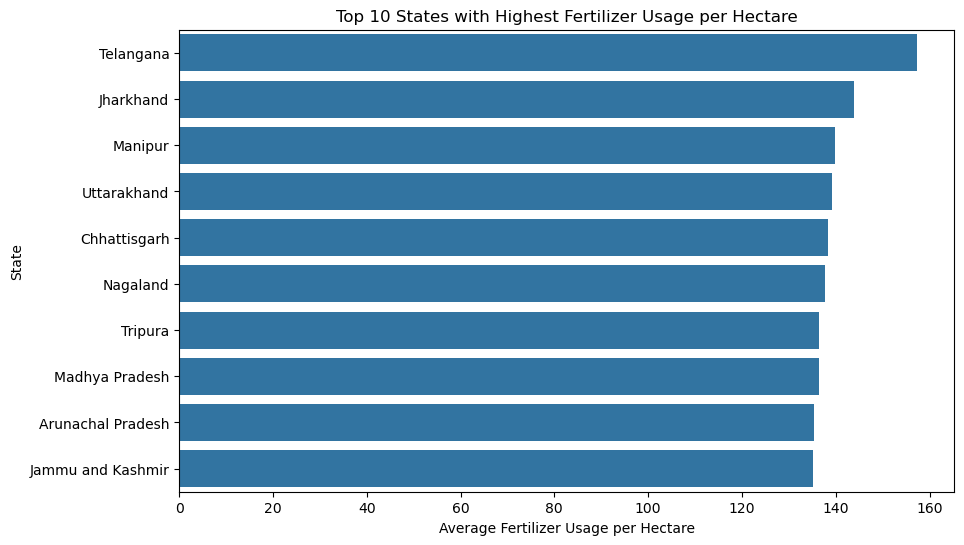

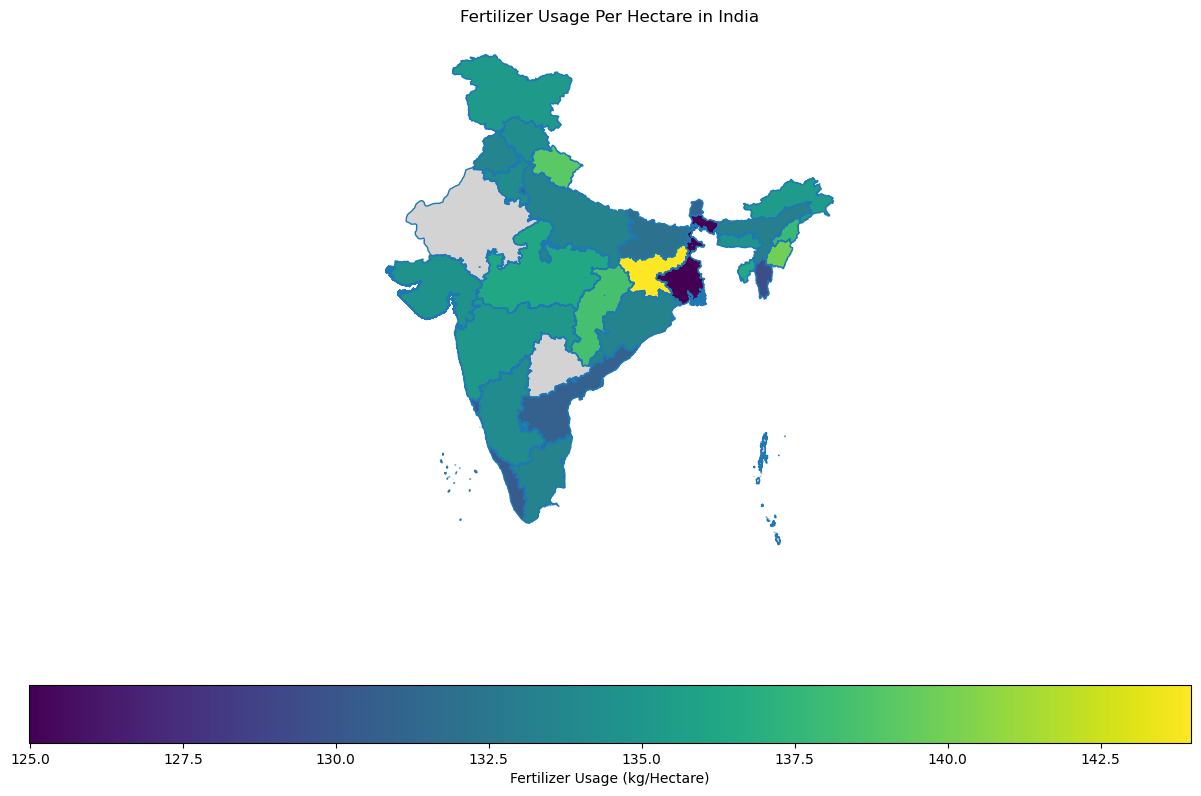

In [41]:
# Fertilizer usage per hectare
# Plotting the top 10 states with the highest fertilizer usage per hectare
States_fertilizer_per_hectare = data.groupby('State')['Fertilizer'].sum().reset_index()
States_area_per_hectare = data.groupby('State')['Area'].sum().reset_index()
# Merging the two dataframes
States_fertilizer_per_hectare = pd.merge(States_fertilizer_per_hectare, States_area_per_hectare, on='State')
# Calculating the fertilizer usage per hectare
States_fertilizer_per_hectare['Fertilizer_per_hectare'] = States_fertilizer_per_hectare['Fertilizer'] / States_fertilizer_per_hectare['Area']
# Plotting the top 10 states with the highest fertilizer usage per hectare
top_10_states_fertilizer_per_hectare = States_fertilizer_per_hectare.nlargest(10, 'Fertilizer_per_hectare')
plt.figure(figsize=(10, 6)) 
sns.barplot(data=top_10_states_fertilizer_per_hectare, x='Fertilizer_per_hectare', y='State')
plt.title('Top 10 States with Highest Fertilizer Usage per Hectare')
plt.xlabel('Average Fertilizer Usage per Hectare')
plt.ylabel('State')
plt.show()
# Plotting on maps
# Plotting the states with the highest fertilizer usage per hectare
# Load the GeoJSON file of India (replace with the actual path)
india_states = gpd.read_file("states_india.geojson")
# We will have the data of the area under production in the states_area_production dataframe
# Selecting only the relevant columns for merging
states_fertilizer_per_hectare = States_fertilizer_per_hectare[['State', 'Fertilizer_per_hectare']]
# You might need to inspect your GeoJSON file and adjust the 'key_on' parameter accordingly.
india_states['NAME_MERGE'] = india_states['st_nm'].str.replace('&', 'and', regex=False)
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Andaman and Nicobar', 'Andaman & Nicobar Islands')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Arunanchal Pradesh', 'Arunachal Pradesh')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Uttaranchal', 'Uttarakhand')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Delhi', 'Delhi') # Ensure exact match
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Chandigarh', 'Chandigarh') # Ensure exact match

# Merge the GeoDataFrame with the area under production data
merged_data = india_states.merge(states_fertilizer_per_hectare, left_on='NAME_MERGE', right_on='State', how='left')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Plotting the map with the rainfall data
merged_data.boundary.plot(ax=ax, linewidth=1)
# Plotting the rainfall data
merged_data.plot(column='Fertilizer_per_hectare', ax=ax, legend=True,
                    legend_kwds={'label': "Fertilizer Usage (kg/Hectare)",
                                'orientation': "horizontal"},
                    cmap='viridis', missing_kwds={"color": "lightgrey"})
plt.title('Fertilizer Usage Per Hectare in India')
plt.axis('off')
plt.show()

### **Fertilizer Use Per Hectare Map**

Now, we shift perspective dramatically. This map doesn't show the *total* amount used, but rather the *intensity* of application – how much fertilizer is used, on average, for each hectare of land farmed (measured in kg/Hectare). The colour scale here is much narrower, ranging from about 125 kg/Ha (dark purple) to 155 kg/Ha (bright yellow).

The bright yellow highlight, indicating the highest *intensity* of fertilizer use per hectare, now appears over **Telangana**. Several other states show up in dark purple or deep blue, suggesting relatively lower intensity (around 125-135 kg/Ha). These include states like **Jharkhand**, **Manipur**, **Uttarakhand**, **Chhattisgarh**, **Nagaland**, and **Tripura**. Interestingly, states like Uttar Pradesh, Maharashtra, and Punjab, which dominated the *total* usage map, do not stand out with the highest intensity colours here; they appear in more moderate blue/green shades.


### **Top 10 States by Fertilizer Use Per Hectare**

This bar chart ranks the states based on the *average fertilizer usage per hectare*.

**Telangana** clearly leads this list, with the longest bar representing an average application rate of around 157 kg per hectare. Following Telangana is a group of states with application rates mostly between 130 kg/Ha and 140 kg/Ha. This includes **Jharkhand**, **Manipur**, **Uttarakhand**, **Chhattisgarh**, **Nagaland**, **Tripura**, **Madhya Pradesh**, **Arunachal Pradesh**, and **Jammu and Kashmir**.

Notice how different this list is from the top 10 list for *total* fertilizer usage! Only Madhya Pradesh appears prominently on both lists. Many states leading in intensity (like Telangana, Jharkhand, Manipur, Nagaland, Tripura, Arunachal Pradesh) are hilly, tribal, or eastern/northeastern states, which were *not* among the top consumers in terms of sheer volume. Conversely, major agricultural states known for high *total* consumption like Uttar Pradesh, Maharashtra, and Punjab do *not* appear in this top 10 list for application *intensity* per hectare based on this data.

Hence, we can say that large agricultural states use the most fertilizer overall due to their scale, but certain other states apply fertilizer more heavily to each individual hectare they farm, possibly due to specific soil conditions, crop choices, or perhaps even data reporting nuances for those regions.

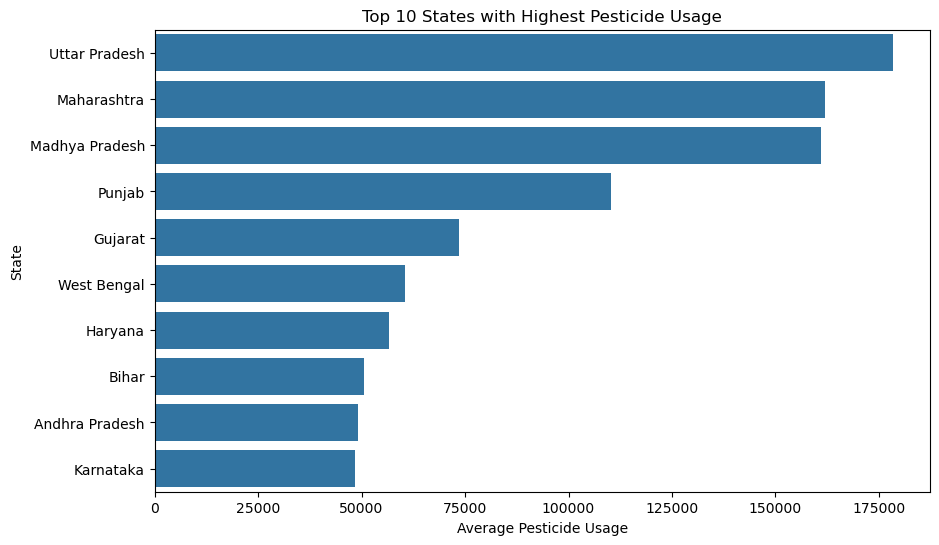

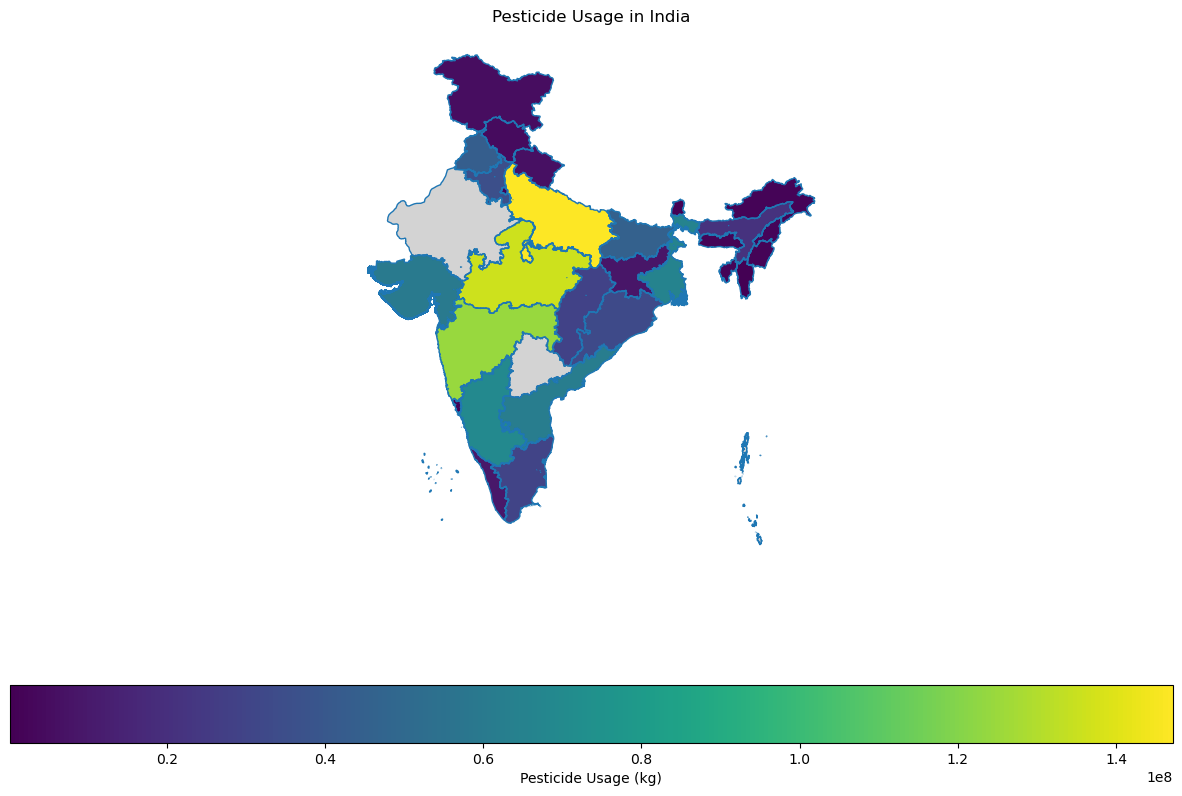

In [42]:
# States that use the highest amount of pesticide
# Plotting the top 10 states with the highest pesticide usage
States_pesticide = data.groupby('State')['Pesticide'].sum().reset_index()
top_10_states_pesticide = data.groupby('State')['Pesticide'].mean().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_states_pesticide, x='Pesticide', y='State')
plt.title('Top 10 States with Highest Pesticide Usage')
plt.xlabel('Average Pesticide Usage')
plt.ylabel('State')
plt.show()
# Plotting on maps
# Plotting the states with the highest pesticide usage

# Load the GeoJSON file of India (replace with the actual path)
india_states = gpd.read_file("states_india.geojson")

# We will have the data of the area under production in the states_area_production dataframe
# Selecting only the relevant columns for merging
states_pesticide = States_pesticide[['State', 'Pesticide']]
# Assuming your GeoJSON has a column named 'st_nm' for state names.
# You might need to inspect your GeoJSON file and adjust the 'key_on' parameter accordingly.
india_states['NAME_MERGE'] = india_states['st_nm'].str.replace('&', 'and', regex=False)
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Andaman and Nicobar', 'Andaman & Nicobar Islands')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Arunanchal Pradesh', 'Arunachal Pradesh')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Uttaranchal', 'Uttarakhand')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Delhi', 'Delhi') # Ensure exact match
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Chandigarh', 'Chandigarh') # Ensure exact match

# Merge the GeoDataFrame with the area under production data
merged_data = india_states.merge(states_pesticide, left_on='NAME_MERGE', right_on='State', how='left')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Plotting the map with the rainfall data
merged_data.boundary.plot(ax=ax, linewidth=1)
# Plotting the rainfall data
merged_data.plot(column='Pesticide', ax=ax, legend=True,
                    legend_kwds={'label': "Pesticide Usage (kg)",
                                'orientation': "horizontal"},
                    cmap='viridis', missing_kwds={"color": "lightgrey"})
plt.title('Pesticide Usage in India')
plt.axis('off')
plt.show()

## Protecting the Harvest: A Look at Pesticide Use Across India

After exploring rainfall, temperature, crops, and fertilizers, our journey into Indian agriculture now turns to another important input: pesticides. These chemicals are used to protect crops from pests and diseases, aiming to secure the harvest. But how much is used, and where? These plots shed light on the patterns of pesticide application across the country.

### **Top 10 States by Total Pesticide Usage**

This bar chart puts numbers to the map below it, ranking the top 10 states based on their *average total* pesticide usage.

**Uttar Pradesh** stands firmly at the top, with its average usage exceeding 170,000 units (kg, representing an average *per year*). **Maharashtra** and **Madhya Pradesh** hold the second and third spots, with average usages around 160,000 and 155,000 units, respectively. **Punjab** ranks fourth, using significantly less than the top three (around 110,000 units) but still a large amount for its size. **Gujarat**, **West Bengal**, **Haryana**, **Bihar**, **Andhra Pradesh**, and **Karnataka** complete the top 10, showing substantial usage figures ranging from about 50,000 to 70,000 units. These are the regions where the most chemicals are being applied across the fields, reflecting the vast scale of farming operations.

### **Total Pesticide Volume**

This map gives us a nationwide view of *total* pesticide usage. Similar to the fertilizer map, the colours represent the total amount used in each state, summed up over the years in the dataset. The colour bar at the bottom shows the scale, measured in kilograms (kg), going from low amounts (dark purple, around 0.2e8 or 20 million kg) up to very high amounts (bright yellow, around 1.4e8 or 140 million kg).

Once again, a familiar pattern emerges, strongly echoing the maps for total cultivated area and total fertilizer use. The agricultural heartland states dominate. **Uttar Pradesh** glows brightly in yellow, indicating it uses the largest absolute volume of pesticides in India, according to this data. **Maharashtra** and **Madhya Pradesh** are shown in vibrant green, signifying the next highest levels of total pesticide consumption. Other major agricultural players like **Punjab**, **Gujarat**, **West Bengal**, and **Andhra Pradesh** appear in lighter greens and teals, indicating substantial but lower total usage compared to the top three. As before, the northeastern states, Himalayan regions, and smaller states generally display darker blues and purples, reflecting much lower overall pesticide application volumes. Rajasthan is again shown in grey, due to missing data.

This map suggests that, much like fertilizer, the sheer volume of pesticide applied largely tracks the scale of agriculture. States farming vast areas use the most pesticides overall to protect those extensive crops.


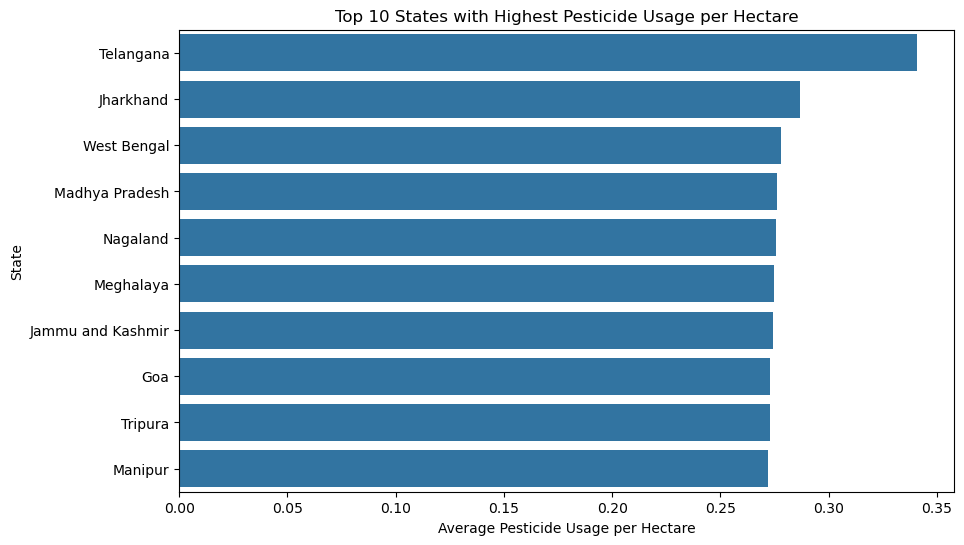

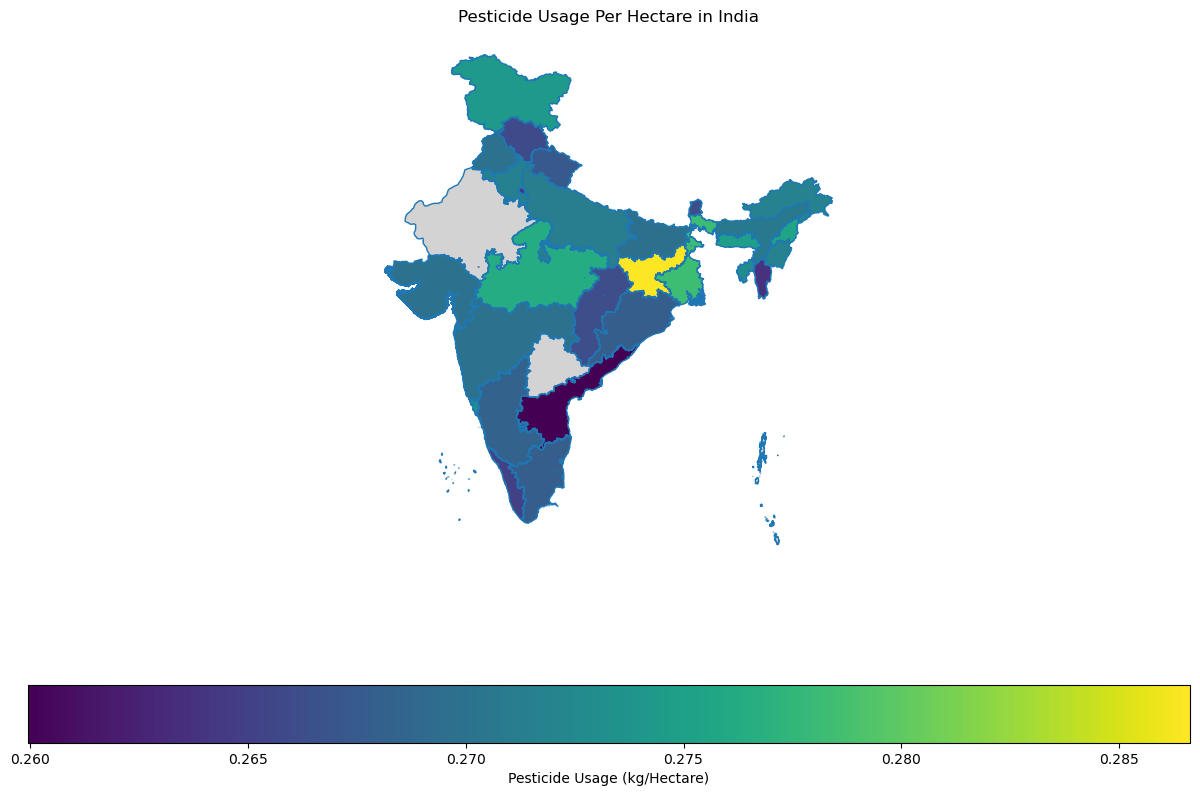

In [43]:
# Pesticide usage per hectare
# Plotting the top 10 states with the highest pesticide usage per hectare
States_pesticide_per_hectare = data.groupby('State')['Pesticide'].sum().reset_index()
States_area_per_hectare = data.groupby('State')['Area'].sum().reset_index()
# Merging the two dataframes
States_pesticide_per_hectare = pd.merge(States_pesticide_per_hectare, States_area_per_hectare, on='State')
# Calculating the pesticide usage per hectare
States_pesticide_per_hectare['Pesticide_per_hectare'] = States_pesticide_per_hectare['Pesticide'] / States_pesticide_per_hectare['Area']
# Plotting the top 10 states with the highest pesticide usage per hectare
top_10_states_pesticide_per_hectare = States_pesticide_per_hectare.nlargest(10, 'Pesticide_per_hectare')
plt.figure(figsize=(10, 6)) 
sns.barplot(data=top_10_states_pesticide_per_hectare, x='Pesticide_per_hectare', y='State')
plt.title('Top 10 States with Highest Pesticide Usage per Hectare')
plt.xlabel('Average Pesticide Usage per Hectare')
plt.ylabel('State')
plt.show()
# Plotting on maps
# Plotting the states with the highest pesticide usage per hectare
# Load the GeoJSON file of India (replace with the actual path)
india_states = gpd.read_file("states_india.geojson")
# We will have the data of the area under production in the states_area_production dataframe
# Selecting only the relevant columns for merging
states_pesticide_per_hectare = States_pesticide_per_hectare[['State', 'Pesticide_per_hectare']]
# You might need to inspect your GeoJSON file and adjust the 'key_on' parameter accordingly.
india_states['NAME_MERGE'] = india_states['st_nm'].str.replace('&', 'and', regex=False)
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Andaman and Nicobar', 'Andaman & Nicobar Islands')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Arunanchal Pradesh', 'Arunachal Pradesh')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Uttaranchal', 'Uttarakhand')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Delhi', 'Delhi') # Ensure exact match
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Chandigarh', 'Chandigarh') # Ensure exact match

# Merge the GeoDataFrame with the area under production data
merged_data = india_states.merge(states_pesticide_per_hectare, left_on='NAME_MERGE', right_on='State', how='left')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Plotting the map with the rainfall data
merged_data.boundary.plot(ax=ax, linewidth=1)
# Plotting the rainfall data
merged_data.plot(column='Pesticide_per_hectare', ax=ax, legend=True,
                    legend_kwds={'label': "Pesticide Usage (kg/Hectare)",
                                'orientation': "horizontal"},
                    cmap='viridis', missing_kwds={"color": "lightgrey"})
plt.title('Pesticide Usage Per Hectare in India')
plt.axis('off')
plt.show()

### **Top 10 States by Pesticide Use Per Hectare**

This bar chart ranks the states based on their *average pesticide usage per hectare*, confirming the intensity map's surprising results.

**Telangana** leads this list decisively, with an average application rate close to 0.34 kg per hectare. Following Telangana, there's a group of states with significantly lower but still relatively high intensity compared to the national average. **Jharkhand** is second, with around 0.28 kg/Ha. The rest of the top 10 cluster closely together with application rates between roughly 0.25 kg/Ha and 0.27 kg/Ha. This group includes **West Bengal**, **Madhya Pradesh**, **Nagaland**, **Meghalaya**, **Jammu and Kashmir**, **Goa**, **Tripura**, and **Manipur**.

Compare this list to the top 10 for *total* usage. Only Madhya Pradesh and West Bengal appear prominently on both lists. Telangana, the leader in intensity, wasn't even in the top 10 for total usage. Many states leading in intensity (like Jharkhand, Nagaland, Meghalaya, Jammu and Kashmir, Goa, Tripura, Manipur) are eastern, northeastern, hilly, or smaller states that used much less pesticide overall. Conversely, giants in total usage like Uttar Pradesh, Maharashtra, and Punjab are absent from this top 10 intensity list.


### **Pesticide Intensity Map (Usage Per Hectare)**

Now, let's change our focus from the total amount to the *intensity* – how much pesticide is applied, on average, to *each hectare* of land farmed. The color scale on this map is very different, representing kilograms per hectare (kg/Hectare) and ranging narrowly from about 0.26 kg/Ha (dark purple) up to 0.34 kg/Ha (bright yellow).

The geographical pattern transforms completely, just as it did with fertilizer intensity! The bright yellow highlight, signifying the highest application rate per hectare, is centred squarely on **Telangana**. Many other states, including the large northern agricultural belts, now appear in much darker shades of blue and purple, indicating lower application intensity.

This intensity map reveals that the states applying pesticides most heavily *per unit of land* are not the same ones using the largest *total volume*. It suggests potentially different pest pressures, crop choices requiring more protection, or different application strategies in specific regions.



## Connecting the Dots: Inputs, Climate, and Crop Outcomes




### Does More Fertilizer Per Hectare Mean Higher Yield?

Based on the below plots, high fertilizer application per hectare does **not** appear to be a requirement for achieving high yield (production per hectare).

The correlation matrix shows a score of **0.00** between fertilizer intensity and yield, indicating no relationship. The scatter plot confirms this, showing a wide spread of points; high yields occur across various fertilizer levels (from below 100 kg/Ha to over 170 kg/Ha), and very low yields occur even with high fertilizer application.

The clustering analysis further supports this. The data clusters primarily based on yield levels (low, moderate, high), with each yield category spanning a broad range of fertilizer intensities. High yield clusters (blue/green) are found at low, medium, and high fertilizer rates. Therefore, other factors like crop type, water, soil, and weather likely play a more decisive role in determining yield than fertilizer intensity alone in this dataset.


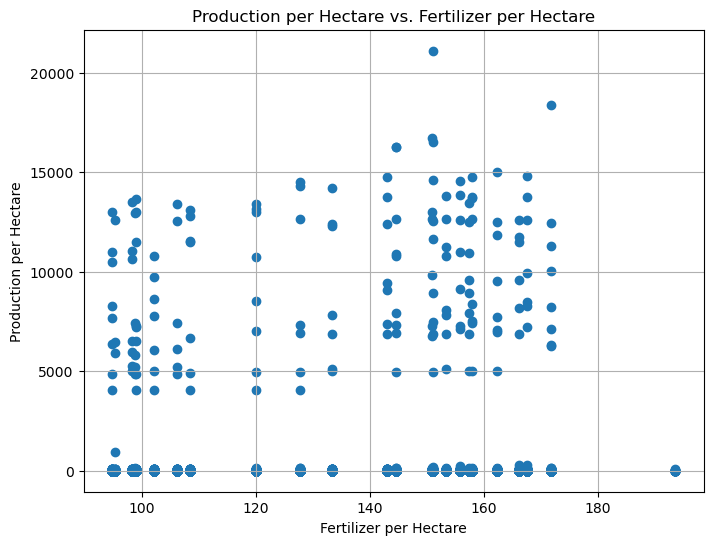


Correlation between Yield and Fertilizer per Hectare: 0.00
A positive correlation suggests that higher fertilizer usage per hectare tends to be associated with higher yield, but it doesn't prove causation.
A correlation close to 0 suggests a weak linear relationship.
A negative correlation would suggest that higher fertilizer usage per hectare tends to be associated with lower yield (which is less likely but possible in some scenarios).

Cluster Analysis:
         Fertilizer_Per_Hectare  Production_Per_Hectare  \
Cluster                                                   
0                    155.532297                4.626612   
1                    105.750451                4.311768   
2                    138.811486            12930.028884   
3                    132.074444             6731.677838   

         Production_Per_Hectare  
Cluster                          
0                      4.626612  
1                      4.311768  
2                  12930.028884  
3             

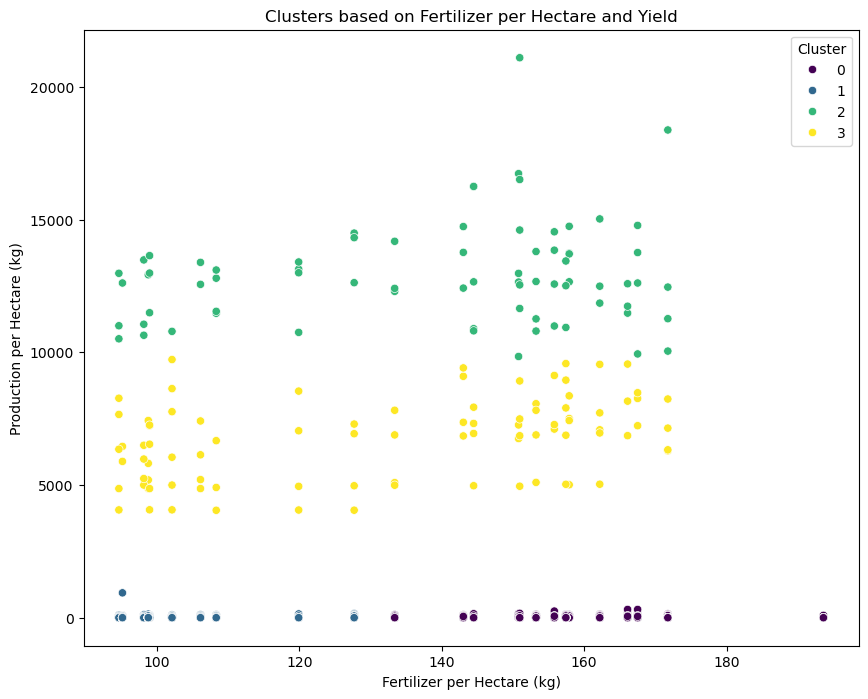

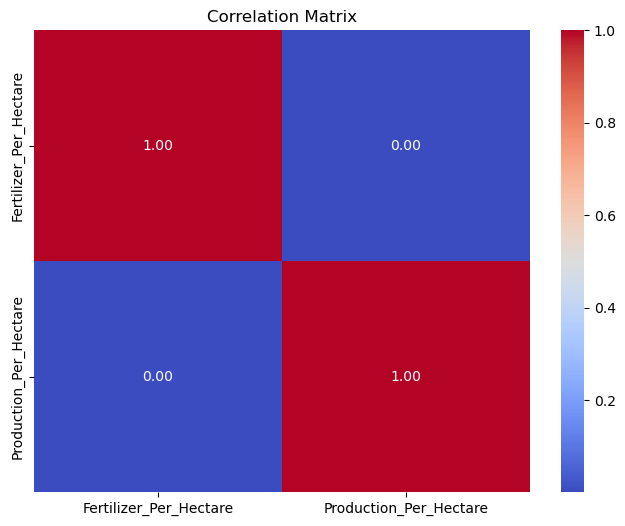


Correlation Matrix Interpretation:
The heatmap shows the pairwise correlations between the selected numerical features.
- Values close to +1 indicate a strong positive linear relationship.
- Values close to -1 indicate a strong negative linear relationship.
- Values close to 0 indicate a weak linear relationship.


In [70]:
# - Does high yield require High Fertilizer per hectare usage? Cluster
# We will first plot a correlation matrix. Then, we will perform the clustering
# Correlation matrix

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns



data['Production_Per_Hectare'] = data['Production'] / data['Area']
# Calculate Fertilizer per hectare
data['Fertilizer_Per_Hectare'] = data['Fertilizer'] / data['Area']

# Analyze the relationship between Yield and Fertilizer per hectare
plt.figure(figsize=(8, 6))
plt.scatter(data['Fertilizer_Per_Hectare'], data['Production_Per_Hectare'])
plt.xlabel('Fertilizer per Hectare')
plt.ylabel('Production per Hectare')
plt.title('Production per Hectare vs. Fertilizer per Hectare')
plt.grid(True)
plt.show()

correlation = data['Production_Per_Hectare'].corr(data['Fertilizer_Per_Hectare'])
print(f"\nCorrelation between Yield and Fertilizer per Hectare: {correlation:.2f}")
print("A positive correlation suggests that higher fertilizer usage per hectare tends to be associated with higher yield, but it doesn't prove causation.")
print("A correlation close to 0 suggests a weak linear relationship.")
print("A negative correlation would suggest that higher fertilizer usage per hectare tends to be associated with lower yield (which is less likely but possible in some scenarios).")

# Clustering Analysis
cluster_features = ['Fertilizer_Per_Hectare','Production_Per_Hectare']

# Handle missing values (if any) - fill with mean for simplicity
data_cluster = data[cluster_features].fillna(data[cluster_features].mean())

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_cluster)


# Based on the elbow plot, choose an optimal number of clusters (let's say 3 for this example)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze the clusters
print("\nCluster Analysis:")
print(data.groupby('Cluster')[cluster_features + ['Production_Per_Hectare']].mean())

# Visualize the clusters (for a 2D representation)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Fertilizer_Per_Hectare', y='Production_Per_Hectare', hue='Cluster', data=data, palette='viridis')
plt.title('Clusters based on Fertilizer per Hectare and Yield')
plt.xlabel('Fertilizer per Hectare (kg)')
plt.ylabel('Production per Hectare (kg)')
plt.show()

# Correlation Analysis
correlation_matrix = data[['Fertilizer_Per_Hectare', 'Production_Per_Hectare']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

print("\nCorrelation Matrix Interpretation:")
print("The heatmap shows the pairwise correlations between the selected numerical features.")
print("- Values close to +1 indicate a strong positive linear relationship.")
print("- Values close to -1 indicate a strong negative linear relationship.")
print("- Values close to 0 indicate a weak linear relationship.")


### Does high yield require High Pesticide per hectare usage?

Based on the below plots, higher pesticide application per hectare does **not** appear necessary for achieving higher yield (production per hectare).
The correlation matrix shows a value of 0.00, indicating no linear relationship between pesticide intensity and yield. The scatter plot confirms this lack of a clear trend; high yields (above 10,000) are achieved across a wide range of pesticide application rates (from below 0.15 kg/Ha to over 0.35 kg/Ha). Furthermore, very low yields occur even when pesticide application is high.
The clustering analysis reinforces this: the main high-yield cluster (blue/green) spans nearly the entire spectrum of pesticide intensities. This suggests that factors other than pesticide application rate per hectare—like crop type, weather, soil health, and nutrient management, are likely more critical in determining the final yield achieved in this dataset.

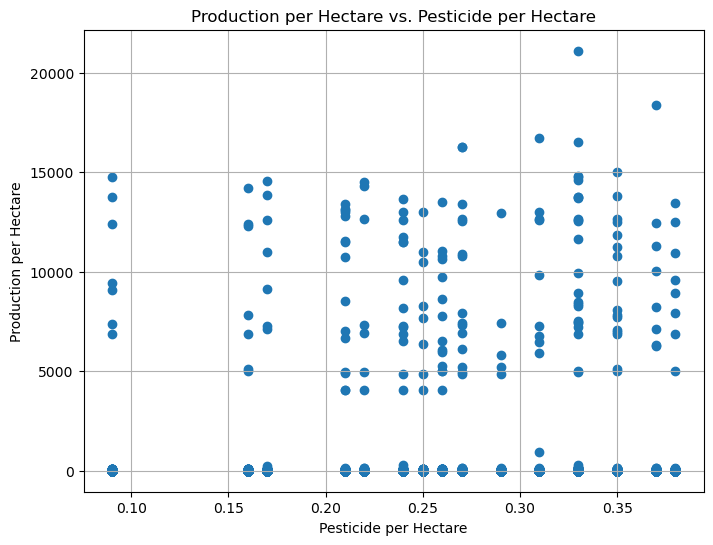


Correlation between Yield and Pesticide per Hectare: -0.00
A positive correlation suggests that higher pesticide usage per hectare tends to be associated with higher yield, but it doesn't prove causation.
A correlation close to 0 suggests a weak linear relationship.
A negative correlation would suggest that higher pesticide usage per hectare tends to be associated with lower yield (which is less likely but possible in some scenarios).

Cluster Analysis:
         Pesticide_Per_Hectare  Production_Per_Hectare  Production_Per_Hectare
Cluster                                                                       
0                     0.246355               12.843061               12.843061
1                     0.343486                7.714094                7.714094
2                     0.273121            10310.789023            10310.789023
3                     0.140079                8.456691                8.456691


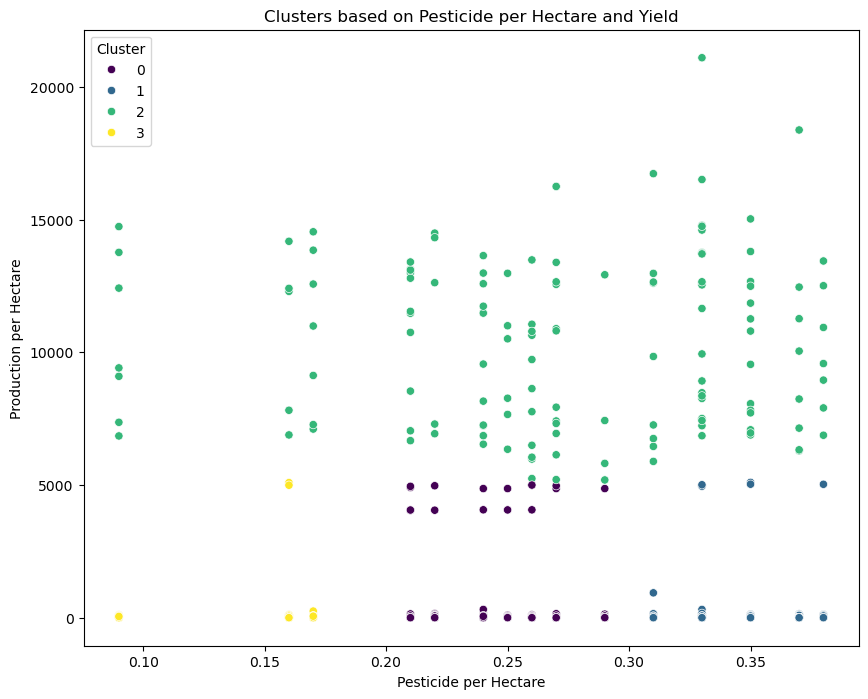

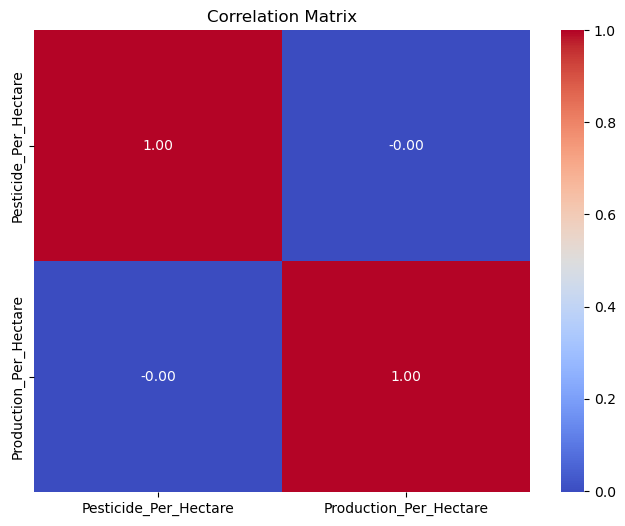


Correlation Matrix Interpretation:
The heatmap shows the pairwise correlations between the selected numerical features.
- Values close to +1 indicate a strong positive linear relationship.
- Values close to -1 indicate a strong negative linear relationship.
- Values close to 0 indicate a weak linear relationship.


In [45]:
# - Does high yield require High Pesticide per hectare usage? Cluster
# We will first plot a correlation matrix. Then, we will perform the clustering
# Correlation matrix

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'data'
# If not, replace 'data' with the actual name of your DataFrame

data['Production_Per_Hectare'] = data['Production'] / data['Area']
# Calculate Pesticide per hectare
data['Pesticide_Per_Hectare'] = data['Pesticide'] / data['Area']

# Analyze the relationship between Yield and Pesticide per hectare
plt.figure(figsize=(8, 6))
plt.scatter(data['Pesticide_Per_Hectare'], data['Production_Per_Hectare'])
plt.xlabel('Pesticide per Hectare')
plt.ylabel('Production per Hectare')
plt.title('Production per Hectare vs. Pesticide per Hectare')
plt.grid(True)
plt.show()

correlation = data['Production_Per_Hectare'].corr(data['Pesticide_Per_Hectare'])
print(f"\nCorrelation between Yield and Pesticide per Hectare: {correlation:.2f}")
print("A positive correlation suggests that higher pesticide usage per hectare tends to be associated with higher yield, but it doesn't prove causation.")
print("A correlation close to 0 suggests a weak linear relationship.")
print("A negative correlation would suggest that higher pesticide usage per hectare tends to be associated with lower yield (which is less likely but possible in some scenarios).")

# Clustering Analysis
cluster_features = ['Pesticide_Per_Hectare','Production_Per_Hectare']

# Handle missing values (if any) - fill with mean for simplicity
data_cluster = data[cluster_features].fillna(data[cluster_features].mean())

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_cluster)


# Based on the elbow plot, choose an optimal number of clusters (let's say 3 for this example)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze the clusters
print("\nCluster Analysis:")
print(data.groupby('Cluster')[cluster_features + ['Production_Per_Hectare']].mean())

# Visualize the clusters (for a 2D representation)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Pesticide_Per_Hectare', y='Production_Per_Hectare', hue='Cluster', data=data, palette='viridis')
plt.title('Clusters based on Pesticide per Hectare and Yield')
plt.xlabel('Pesticide per Hectare')
plt.ylabel('Production per Hectare')
plt.show()

# Correlation Analysis
correlation_matrix = data[['Pesticide_Per_Hectare', 'Production_Per_Hectare']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

print("\nCorrelation Matrix Interpretation:")
print("The heatmap shows the pairwise correlations between the selected numerical features.")
print("- Values close to +1 indicate a strong positive linear relationship.")
print("- Values close to -1 indicate a strong negative linear relationship.")
print("- Values close to 0 indicate a weak linear relationship.")


### Does high yield require High Rainfall?

Based on the below plots, high yield does **not** necessarily require high annual rainfall.
The correlation matrix shows a value of **0.02** between annual rainfall and yield, indicating essentially no linear relationship. The scatter plot reveals a more complex picture: the highest yields (above 10,000) are predominantly clustered within a moderate rainfall zone, roughly between 1000 mm and 2500 mm. Interestingly, very high rainfall amounts (above 3000 mm) correspond to fewer high-yield points and many near-zero yield points.
The cluster plot reinforces this finding. The cluster representing the highest yields (Teal) is concentrated within that same moderate rainfall band. The near-zero yield cluster (Yellow) spans all rainfall levels. This suggests that while some rainfall is necessary, excessive rainfall might be detrimental, and achieving high yields depends more on an optimal rainfall range and other critical factors, not simply maximizing rainfall.

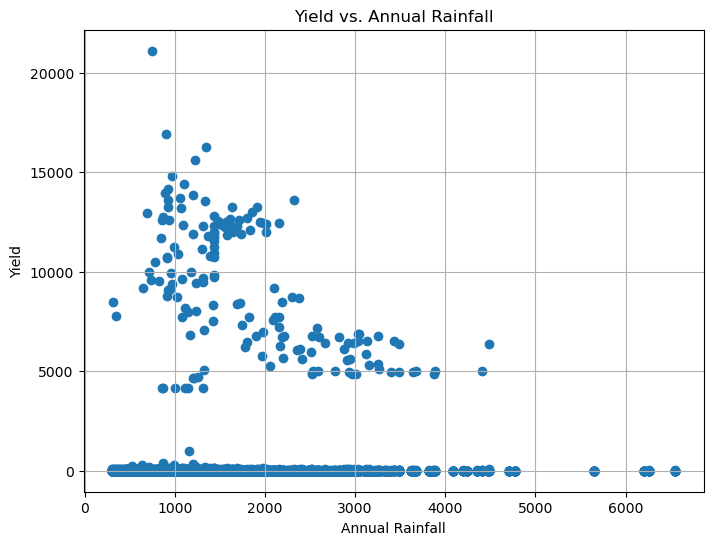


Correlation between Yield and Annual Rainfall: 0.02
A positive correlation suggests that higher annual rainfall tends to be associated with higher yield.
A correlation close to 0 suggests a weak linear relationship.
A negative correlation would suggest that higher annual rainfall tends to be associated with lower yield (which might occur for certain crops or in specific conditions).

Cluster Analysis (Rainfall Focus):
                  Annual_Rainfall        Yield        Yield
Cluster_Rainfall                                           
0                     1150.056103     6.856984     6.856984
1                     1836.934416  9378.155497  9378.155497
2                     2913.611876     5.596628     5.596628


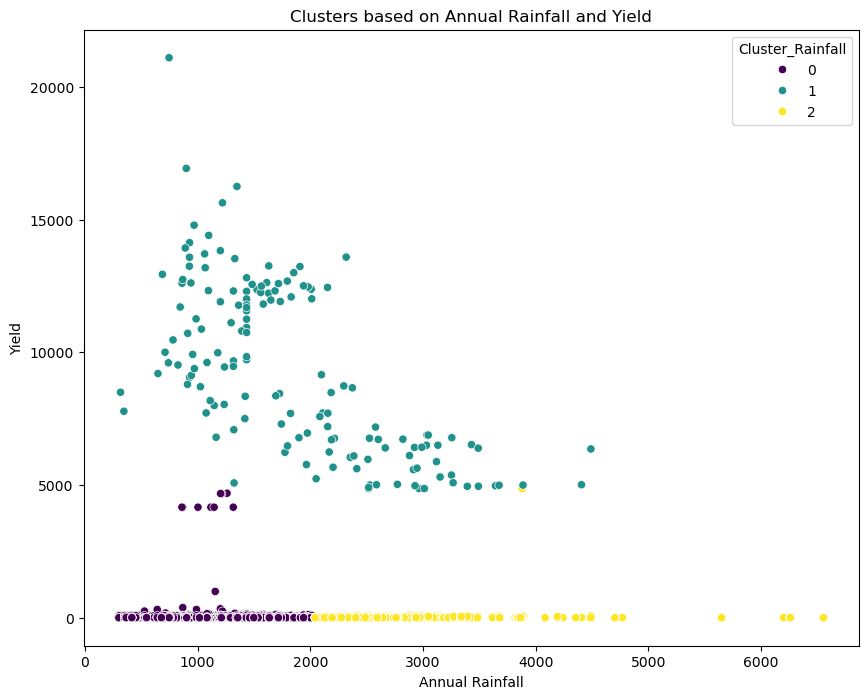

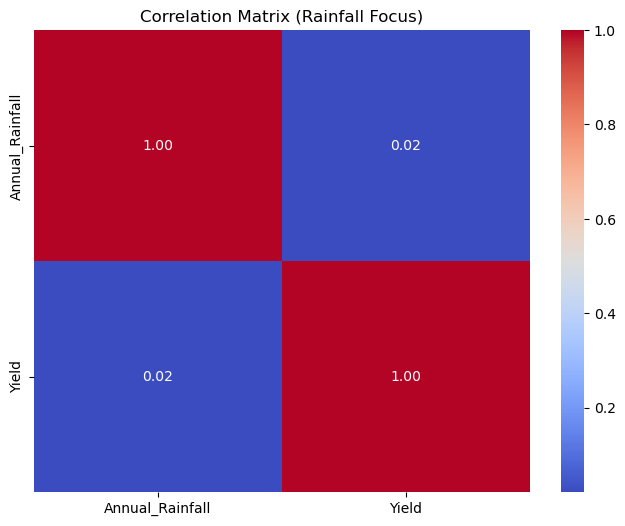


Correlation Matrix Interpretation (Rainfall Focus):
The heatmap shows the pairwise correlations between the selected numerical features.
- Values close to +1 indicate a strong positive linear relationship.
- Values close to -1 indicate a strong negative linear relationship.
- Values close to 0 indicate a weak linear relationship.
Focus on the correlation between 'Yield' and 'Annual_Rainfall' to see their linear relationship.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


data_rain_yield = data[['Annual_Rainfall', 'Yield']].copy()
# If yield values are missing or zero, remove them
data_rain_yield = data_rain_yield[(data_rain_yield['Yield'] > 0) & (data_rain_yield['Annual_Rainfall'] > 0)]
# Handle missing values (if any) - fill with mean for simplicity
data_rain_yield = data_rain_yield.fillna(data_rain_yield.mean())

# Analyze the relationship between Yield and Annual Rainfall
plt.figure(figsize=(8, 6))
plt.scatter(data_rain_yield['Annual_Rainfall'], data_rain_yield['Yield'])
plt.xlabel('Annual Rainfall')
plt.ylabel('Yield')
plt.title('Yield vs. Annual Rainfall')
plt.grid(True)
plt.show()

correlation_rainfall_yield = data['Yield'].corr(data['Annual_Rainfall'])
print(f"\nCorrelation between Yield and Annual Rainfall: {correlation_rainfall_yield:.2f}")
print("A positive correlation suggests that higher annual rainfall tends to be associated with higher yield.")
print("A correlation close to 0 suggests a weak linear relationship.")
print("A negative correlation would suggest that higher annual rainfall tends to be associated with lower yield (which might occur for certain crops or in specific conditions).")

# Clustering Analysis
# Select features for clustering (you can choose more or different features)
cluster_features_rainfall = ['Annual_Rainfall', 'Yield']

# Handle missing values (if any) - fill with mean for simplicity
data_cluster_rainfall = data[cluster_features_rainfall].fillna(data[cluster_features_rainfall].mean())

# Standardize the features
scaler_rainfall = StandardScaler()
scaled_features_rainfall = scaler_rainfall.fit_transform(data_cluster_rainfall)


# Based on the elbow plot, choose an optimal number of clusters (let's say 3 for this example)
n_clusters_rainfall = 3
kmeans_rainfall = KMeans(n_clusters=n_clusters_rainfall, random_state=42, n_init=10)
data['Cluster_Rainfall'] = kmeans_rainfall.fit_predict(scaled_features_rainfall)

# Analyze the clusters
print("\nCluster Analysis (Rainfall Focus):")
print(data.groupby('Cluster_Rainfall')[cluster_features_rainfall + ['Yield']].mean())

# Visualize the clusters (for a 2D representation)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual_Rainfall', y='Yield', hue='Cluster_Rainfall', data=data, palette='viridis')
plt.title('Clusters based on Annual Rainfall and Yield')
plt.xlabel('Annual Rainfall')
plt.ylabel('Yield')
plt.show()

# Correlation Analysis
correlation_matrix_rainfall = data[['Annual_Rainfall', 'Yield']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_rainfall, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Rainfall Focus)')
plt.show()

print("\nCorrelation Matrix Interpretation (Rainfall Focus):")
print("The heatmap shows the pairwise correlations between the selected numerical features.")
print("- Values close to +1 indicate a strong positive linear relationship.")
print("- Values close to -1 indicate a strong negative linear relationship.")
print("- Values close to 0 indicate a weak linear relationship.")
print("Focus on the correlation between 'Yield' and 'Annual_Rainfall' to see their linear relationship.")

### Which year so far was the best with highest overall prodcutions? and what is the correlation between yearly production, rainfall and temperature?

Based on the plots below, the following conclusions can be drawn regarding overall agricultural production trends and their correlation with climate variables within the observed timeframe:  

1.  **Peak Production Year:**  
    *   The year **2011** registered the highest overall agricultural production during the period analyzed (1997-2019).  
    *   **Evidence:** This is demonstrated consistently across multiple plots:  
        *   The "Yearly Total Production" bar chart clearly shows the bar for **2011** as the tallest,    reaching a value close to 2.0 x 10^10 units, distinctly higher than any other year between 1997 and 2019.  
        *   The "Yearly Total Production" line chart shows the production line reaching its sharpest peak in  **2011**, approximating 1.95 x 10^10 units, before dropping in 2012.  
        *   The "Yearly Production, Temperature and Rainfall" line chart also displays the red "Total Production" line peaking significantly in **2011** relative to surrounding years within its 1997-2017 timeframe.  

2.  **Correlation between Yearly Production and Rainfall:**  
    *   There is a **moderate negative correlation** between total yearly production and average annual rainfall during this period, with a calculated correlation coefficient of **-0.39**.  
    *   **Evidence:** This value is stated in the Correlation Matrix plot.    
    *   **Interpretation:** This suggests a tendency within this dataset for years experiencing higher average rainfall to correspond with lower overall agricultural production, and vice versa.  

3.  **Correlation between Yearly Production and Temperature:**
    *   There is a **moderate positive correlation** between total yearly production and average annual temperature during this period, with a calculated correlation coefficient of **0.46**.  
    *   **Evidence:** This value is shown in the Correlation Matrix plot.  
    *   **Interpretation:** This indicates a tendency within this dataset for years experiencing higher average temperatures to correspond with higher overall agricultural production.  


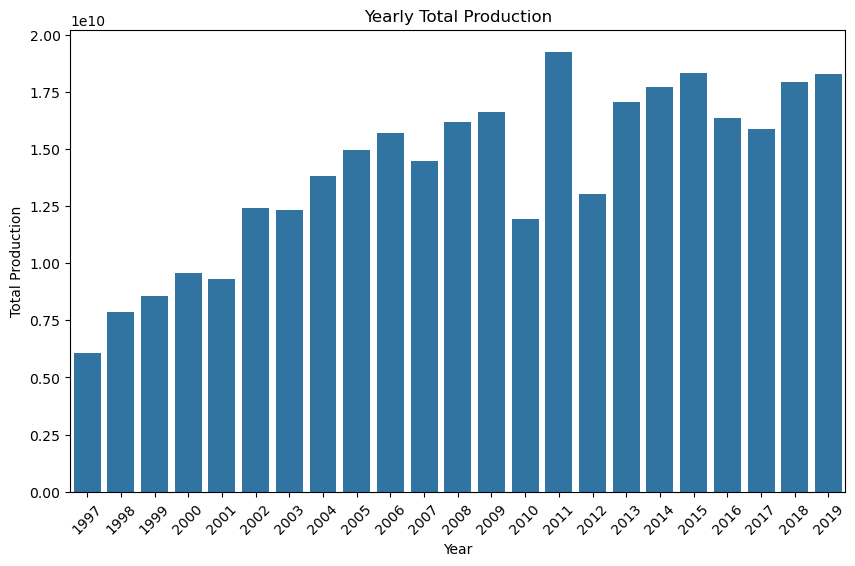

In [47]:
# Finding the yearly total production
# Grouping the data by year and summing the production
yearly_production = data.groupby('Crop_Year')['Production'].sum().reset_index()
yearly_production.columns = ['Year', 'Total_Production']
# Remove 2020
yearly_production = yearly_production[yearly_production['Year'] != 2020]
# Plotting the yearly production
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_production, x='Year', y='Total_Production')
plt.title('Yearly Total Production')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.xticks(rotation=45)
plt.show()

In [48]:
# Plotting this against the temperature and rainfall from the temp_rain dataframe
# Merging the two dataframes
yearly_production_temp_rain = pd.merge(yearly_production, temp_rain, left_on='Year', right_on='YEAR', how='inner')
# Plotting the yearly production against the temperature and rainfall
# Drop the columns CLUSTER, YEAR from yearly_production_temp_rain
yearly_production_temp_rain = yearly_production_temp_rain.drop(columns=['CLUSTER', 'YEAR'])

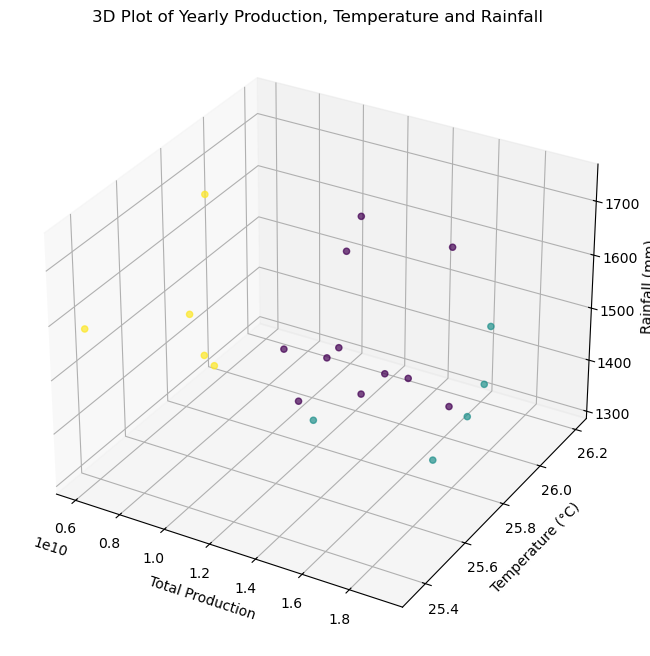

In [49]:
# Now, creating a 3D plot of yearly production, temperature and rainfall
# Perform kmeans
from sklearn.cluster import KMeans

# Standardize the features
scaler = StandardScaler()
temp_rain_scaled = scaler.fit_transform(yearly_production_temp_rain[['Total_Production', 'TEMP', 'RAIN']])
# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
yearly_production_temp_rain['CLUSTER'] = kmeans.fit_predict(temp_rain_scaled)
# Plotting the clusters as 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(yearly_production_temp_rain['Total_Production'], yearly_production_temp_rain['TEMP'], yearly_production_temp_rain['RAIN'], c=yearly_production_temp_rain['CLUSTER'], cmap='viridis', alpha=0.7)
ax.set_xlabel('Total Production')   
ax.set_ylabel('Temperature (°C)')
ax.set_zlabel('Rainfall (mm)')
plt.title('3D Plot of Yearly Production, Temperature and Rainfall')
plt.show()

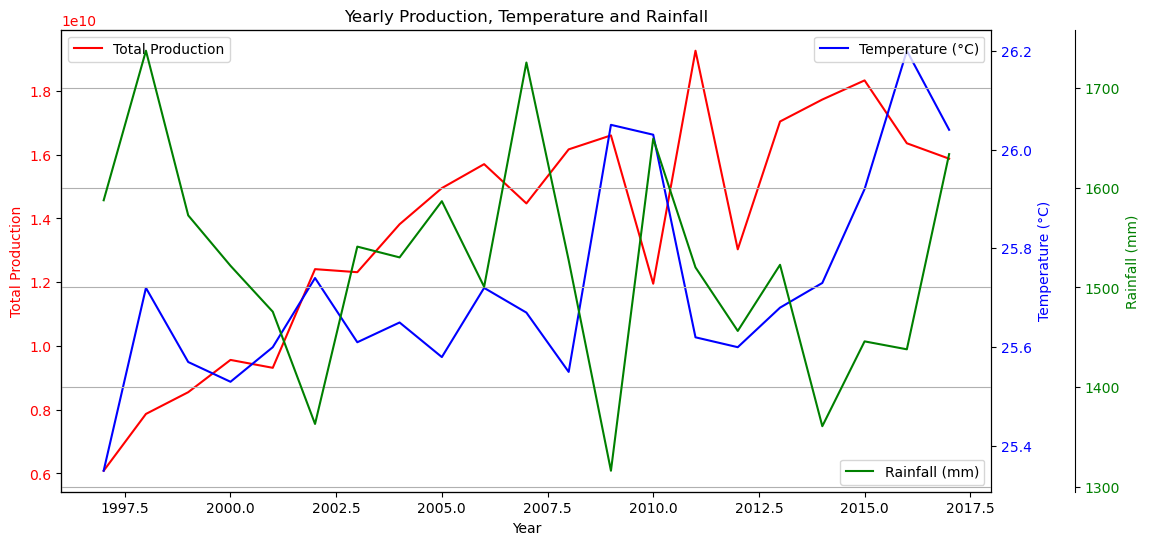

In [50]:
# Plotting the Production, Temperature and Rainfall on the same plot against YEars
# Creating a new figure
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plotting the production data from yearly_production_temp_rain dataframe
ax1.plot(yearly_production_temp_rain['Year'], yearly_production_temp_rain['Total_Production'], color='red', label='Total Production')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Production', color='red')
ax1.tick_params(axis='y', labelcolor='red')
# Creating a second y axis for temperature
ax2 = ax1.twinx()
# Plotting the temperature data from yearly_production_temp_rain dataframe
ax2.plot(yearly_production_temp_rain['Year'], yearly_production_temp_rain['TEMP'], color='blue', label='Temperature (°C)')
ax2.set_ylabel('Temperature (°C)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
# Creating a third y axis for rainfall
ax3 = ax1.twinx()
# Plotting the rainfall data from yearly_production_temp_rain dataframe
ax3.spines['right'].set_position(('outward', 60))  # Move the right spine outward
ax3.plot(yearly_production_temp_rain['Year'], yearly_production_temp_rain['RAIN'], color='green', label='Rainfall (mm)')
ax3.set_ylabel('Rainfall (mm)', color='green')
ax3.tick_params(axis='y', labelcolor='green')
# Adding title and grid
plt.title('Yearly Production, Temperature and Rainfall')
plt.grid()
# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='lower right')
plt.show()


<Figure size 1000x600 with 0 Axes>

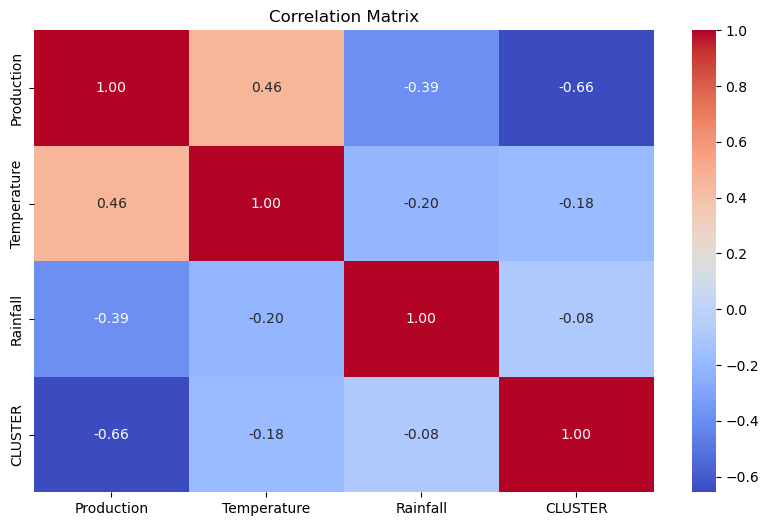

In [51]:
# Finding the correlation
# Correlation matrix
correlation_matrix = yearly_production_temp_rain.corr()
# Drop the Year column
correlation_matrix = correlation_matrix.drop(columns=['Year'])
# Rename the columns
correlation_matrix = correlation_matrix.rename(columns={'Total_Production': 'Production', 'TEMP': 'Temperature', 'RAIN': 'Rainfall'})
# Rename the rows
correlation_matrix = correlation_matrix.rename(index={'Total_Production': 'Production', 'TEMP': 'Temperature', 'RAIN': 'Rainfall'})
# Drop the row Year
correlation_matrix = correlation_matrix.drop(index=['Year'])
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


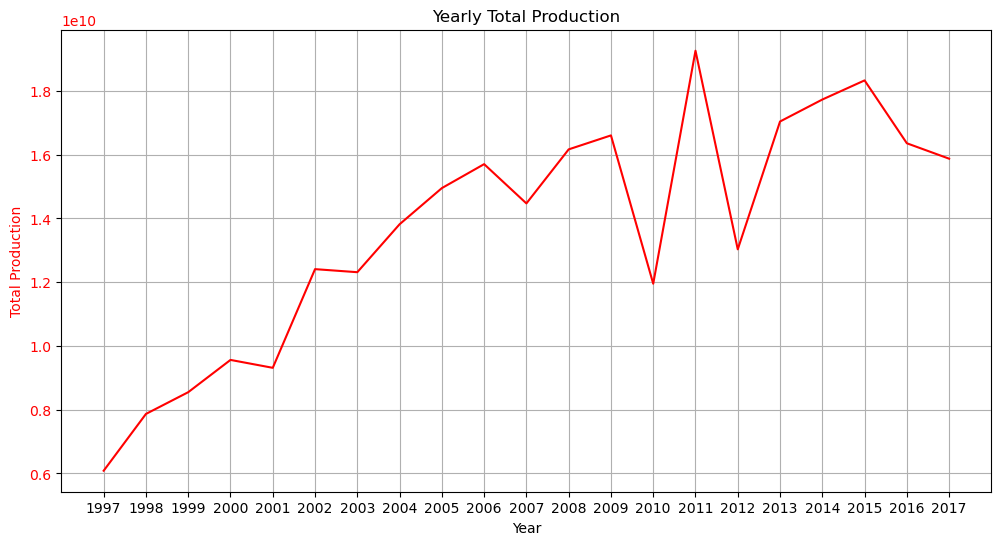

In [52]:
# Plotting production and finding the year with the highest production
# Plotting the Production, Temperature and Rainfall on the same plot against YEars
# Creating a new figure
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plotting the production data from yearly_production_temp_rain dataframe
ax1.plot(yearly_production_temp_rain['Year'], yearly_production_temp_rain['Total_Production'], color='red', label='Total Production')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Production', color='red')
ax1.tick_params(axis='y', labelcolor='red')
# Adding title and grid
plt.title('Yearly Total Production')
plt.grid()
# Adding legends
ax1.set_xticks(yearly_production_temp_rain['Year'])
plt.show()


In [53]:
print("Highest Production was in 2011")

Highest Production was in 2011


### Which state leads the production of which crop?


Based on the map visualization below ("Best Producing Crop in Each State"), the following analysis identifies the crop with the highest production volume within various states of India, according to the dataset used for the plot:  

- Dominance of Coconut in the South:  
The map clearly indicates that Coconut is the highest producing crop in the southern peninsula states.  
Evidence: States including Kerala (dark blue), Tamil Nadu (orange), Karnataka (light yellow), Andhra Pradesh (light yellow adjacent to Tamil Nadu), and Goa (small coastal state) are explicitly labeled with "Coconut". The bright yellow, orange, and light green colours associated with these states also correspond to the highest end of the production scale shown in the color bar (approximately 0.6e11 to 1.2e11 kg), indicating extremely high production volumes for Coconut in these regions.  

- Dominance of Sugarcane in West and North-Central Regions:  
Sugarcane is identified as the leading production crop in several large states.  
Evidence: Labels for "Sugarcane" are visible over Uttar Pradesh, Maharashtra, Gujarat, and Bihar. These states are generally colored in darker reds/purples, signifying lower total production volumes for Sugarcane compared to Coconut in the south, according to the map's color scale.  

- Dominance of Wheat in North-West and Central Regions:  
Wheat is shown as the highest producing crop in parts of North-Western and Central India.  
Evidence: Labels for "Wheat" appear over Punjab, Haryana, Rajasthan, and Madhya Pradesh. These regions are also primarily colored in darker reds/purples.  

- Dominance of Rice in East and Northeast:  
Rice is indicated as the leading production crop across Eastern and Northeastern India.  
Evidence: "Rice" labels are visible over West Bengal, Odisha, Chhattisgarh, Assam, and several other northeastern states. A "Coconut" label near the east coast might refer to Andaman & Nicobar Islands or coastal influence. These areas mostly fall into the lower production range according to the color scale.  

- Dominance of Maize in Northern Hilly Regions:  
Maize is identified as the top producer in the northernmost states.  
Evidence: Labels for "Maize" are placed over Jammu & Kashmir and Himachal Pradesh. These states show darker colors, indicating lower production volumes on the map's scale.  

In [54]:
import pandas as pd

data_without_2020 = data[data['Crop_Year'] != 2020]

# Group by State and Crop, then sum the production for each (State, Crop) combination
state_crop_production_sum = data_without_2020.groupby(['State', 'Crop'])['Production'].sum().reset_index()

# For each state, find the crop with the maximum total production
best_production_per_state_sum = state_crop_production_sum.loc[state_crop_production_sum.groupby('State')['Production'].idxmax()]

print("State with its best producing crop (based on total production sum over all years excluding 2020):")
print(best_production_per_state_sum)

State with its best producing crop (based on total production sum over all years excluding 2020):
                 State       Crop    Production
7       Andhra Pradesh   Coconut    25212327031
59   Arunachal Pradesh       Rice       3851550
74               Assam   Coconut     3455431000
136              Bihar  Sugarcane     178942980
173       Chhattisgarh       Rice     116274060
198              Delhi      Wheat       1915317
203                Goa   Coconut     2188980000
238            Gujarat  Sugarcane     294470104
279            Haryana      Wheat     241279000
294   Himachal Pradesh      Maize      14003230
330  Jammu and Kashmir      Maize       9999452
372          Jharkhand       Rice      28771602
388          Karnataka   Coconut    62692166000
431             Kerala   Coconut   129607125000
506     Madhya Pradesh      Wheat     288882663
531        Maharashtra  Sugarcane    1396763558
556            Manipur       Rice       9426598
588          Meghalaya       Rice     

/var/folders/nj/cv7zrr5s39g_d0x2440hndx40000gp/T/ipykernel_42282/3572327784.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['Crop']):


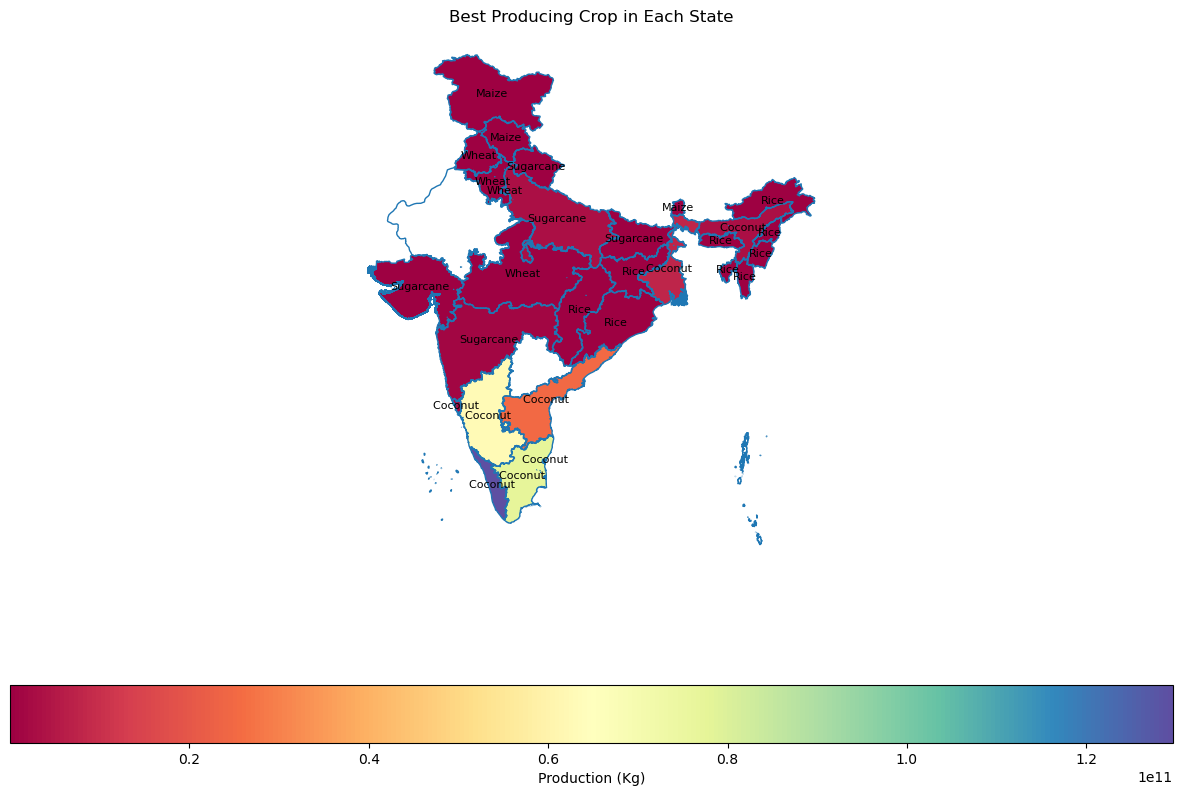

In [55]:
# Plotting the states with the highest pesticide usage per hectare
india_states = gpd.read_file("states_india.geojson")
# We will have the data of the area under production in the states_area_production dataframe
# Selecting only the relevant columns for merging
# You might need to inspect your GeoJSON file and adjust the 'key_on' parameter accordingly.
india_states['NAME_MERGE'] = india_states['st_nm'].str.replace('&', 'and', regex=False)
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Andaman and Nicobar', 'Andaman & Nicobar Islands')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Arunanchal Pradesh', 'Arunachal Pradesh')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Uttaranchal', 'Uttarakhand')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Delhi', 'Delhi') # Ensure exact match
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Chandigarh', 'Chandigarh') # Ensure exact match

# Merge the GeoDataFrame with the area under production data
merged_data = india_states.merge(best_production_per_state_sum, left_on='NAME_MERGE', right_on='State', how='left')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Plotting the map with the rainfall data
merged_data.boundary.plot(ax=ax, linewidth=1)
# Plotting the rainfall data
merged_data.plot(column='Production', ax=ax, legend=True,
                    legend_kwds={'label': "Production (Kg)",
                                'orientation': "horizontal"},
                    cmap='Spectral', missing_kwds={"color": "white"})
# On the plot, write the name of the crop that each state grows the most
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['Crop']):
    # if nan 
    if pd.isna(label):
        continue
    ax.text(x, y, label, fontsize=8, ha='center', va='center')
plt.title('Best Producing Crop in Each State')

plt.axis('off')
plt.show()

In [56]:
# For each crop, find the state with the maximum total production
highest_producing_state_per_crop_sum = state_crop_production_sum.loc[state_crop_production_sum.groupby('Crop')['Production'].idxmax()]

print("\nHighest producing state for each crop (based on total production sum over all years excluding 2020):")
print(highest_producing_state_per_crop_sum)


Highest producing state for each crop (based on total production sum over all years excluding 2020):
              State                   Crop    Production
380       Karnataka               Arecanut      34451742
507     Maharashtra              Arhar/Tur      19846220
880   Uttar Pradesh                  Bajra      33447486
771      Tamil Nadu                 Banana      72630447
882   Uttar Pradesh                 Barley      10797383
428          Kerala           Black pepper       1157005
429          Kerala               Cardamom        212950
430          Kerala              Cashewnut       1061781
215         Gujarat            Castor seed      21632374
431          Kerala               Coconut   129607125000
468  Madhya Pradesh              Coriander       2683870
216         Gujarat           Cotton(lint)     143260549
391       Karnataka          Cowpea(Lobia)        311061
11   Andhra Pradesh           Dry chillies      15223056
472  Madhya Pradesh                 Garlic 

In [57]:
import pandas as pd

# Group by State and Crop, then sum the production for each combination
state_crop_production_sum = data_without_2020.groupby(['State', 'Crop'])['Production'].sum().reset_index()

def get_top_n_crops_sum(df, state, n=3):
    state_data = df[df['State'] == state].sort_values(by='Production', ascending=False).head(n)
    return state_data

top_crops_per_state = {}

for state in data_without_2020['State'].unique():
    top_3_crops = get_top_n_crops_sum(state_crop_production_sum, state, n=3)
    if not top_3_crops.empty:
        top_crops_per_state[state] = top_3_crops[['Crop', 'Production']].to_dict('records')
    else:
        top_crops_per_state[state] = "No production data available"

print("Top 3 most produced crops per state (based on total production sum):")
for state, top_crops in top_crops_per_state.items():
    print(f"\nState: {state}")
    if isinstance(top_crops, str):
        print(f"  {top_crops}")
    else:
        for crop_info in top_crops:
            print(f"  - Crop: {crop_info['Crop']}, Total Production: {crop_info['Production']:.2f}")

Top 3 most produced crops per state (based on total production sum):

State: Assam
  - Crop: Coconut , Total Production: 3455431000.00
  - Crop: Rice, Total Production: 97989518.00
  - Crop: Sugarcane, Total Production: 24546512.00

State: Karnataka
  - Crop: Coconut , Total Production: 62692166000.00
  - Crop: Sugarcane, Total Production: 695356190.00
  - Crop: Rice, Total Production: 82049324.00

State: Kerala
  - Crop: Coconut , Total Production: 129607125000.00
  - Crop: Tapioca, Total Production: 58920957.00
  - Crop: Rice, Total Production: 13284212.00

State: Meghalaya
  - Crop: Rice, Total Production: 5169434.00
  - Crop: Potato, Total Production: 3785600.00
  - Crop: Banana, Total Production: 1638460.00

State: West Bengal
  - Crop: Coconut , Total Production: 8068332400.00
  - Crop: Rice, Total Production: 338984869.00
  - Crop: Potato, Total Production: 217756226.00

State: Puducherry
  - Crop: Coconut , Total Production: 486987000.00
  - Crop: Sugarcane, Total Production: 5

### Which States lead in the production of Rice?



Based on the visualizations below (bar chart, map, and pie chart), the following analysis identifies the states that lead in total rice production according to the dataset:

1.  **Identification of Top Producers:**
    *   The state of **West Bengal** consistently emerges as the top rice-producing state in India within this dataset.
    *   **Uttar Pradesh** ranks as the second-highest producer, closely followed by **Punjab** and **Andhra Pradesh**.
    *   **Evidence:**
        *   The horizontal bar chart ("Total Rice Production by State (All Years)") clearly shows West Bengal with the longest bar, indicating the highest total production (approximately 3.2 x 10^8 kg), followed by Uttar Pradesh (approx. 3.0 x 10^8 kg), Punjab (approx. 2.5 x 10^8 kg), and Andhra Pradesh (approx. 2.2 x 10^8 kg).
        *   The map ("Rice Production in Each State") visually confirms this, displaying West Bengal, Uttar Pradesh, Punjab, and Andhra Pradesh in colours (light blues, greens, yellows) corresponding to the highest production bracket on the color bar (generally > 1.5 x 10^8 kg).
        *   The pie chart ("Distribution of Total Rice Production Among Top 9 States") quantifies their contribution, showing West Bengal accounting for **15.2%**, Uttar Pradesh for **13.3%**, Punjab for **10.9%**, and Andhra Pradesh for **10.7%** of the total rice production.

2.  **Significant Contributions from Other States:**
    *   Beyond the top four, several other states contribute significantly to the national rice production total.
    *   **Evidence:**
        *   The bar chart shows Odisha, Tamil Nadu, Bihar, Chhattisgarh, and Assam as the next tier of major producers.
        *   The pie chart further highlights their shares: Odisha (**6.9%**), Tamil Nadu (**5.9%**), Bihar (**5.9%**), Chhattisgarh (**5.2%**), and Assam (**4.4%**).

3.  **Concentration of Production:**
    *   A significant portion of India's rice production, as represented in this dataset, is concentrated within these top states.
    *   **Evidence:** The top four states (West Bengal, Uttar Pradesh, Punjab, Andhra Pradesh) collectively account for just over half (**50.1%**) of the total production, according to the pie chart. The top nine states featured in the pie chart contribute **78.4%** of the total production, with the remaining states grouped under "Other" accounting for **21.6%**.


In [58]:
rice_production = data[data['Crop'] == 'Rice'].groupby('State')['Production'].sum().sort_values(ascending=False)
print("\nStates Leading in Rice Production (Total over all years):\n", rice_production)


States Leading in Rice Production (Total over all years):
 State
West Bengal          338984869
Uttar Pradesh        296108280
Punjab               243042000
Andhra Pradesh       239361201
Odisha               153257182
Tamil Nadu           132142328
Bihar                131489958
Chhattisgarh         116274060
Assam                 97989518
Karnataka             82049324
Haryana               80531900
Madhya Pradesh        64509637
Maharashtra           61238128
Telangana             45590609
Gujarat               32098665
Jharkhand             28771602
Tripura               14710040
Kerala                13284212
Uttarakhand           12568071
Jammu and Kashmir      9853947
Manipur                9426598
Nagaland               7818760
Meghalaya              5169434
Arunachal Pradesh      3851550
Goa                    2817936
Himachal Pradesh       2514409
Mizoram                1719535
Puducherry             1260683
Sikkim                  474991
Delhi                   391753
Name

/var/folders/nj/cv7zrr5s39g_d0x2440hndx40000gp/T/ipykernel_42282/3995344454.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Production', y='State', data=df.sort_values(by='Production', ascending=False), palette='viridis')


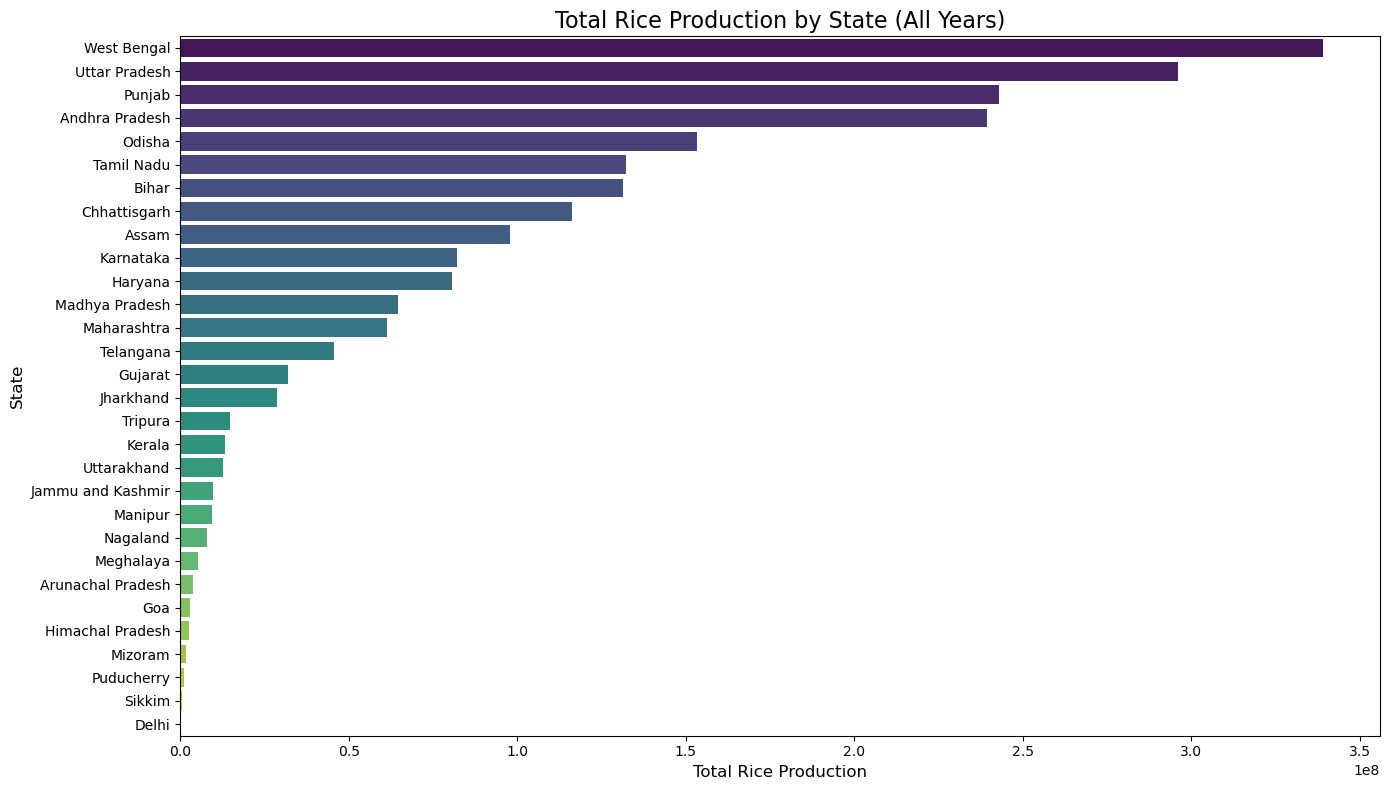

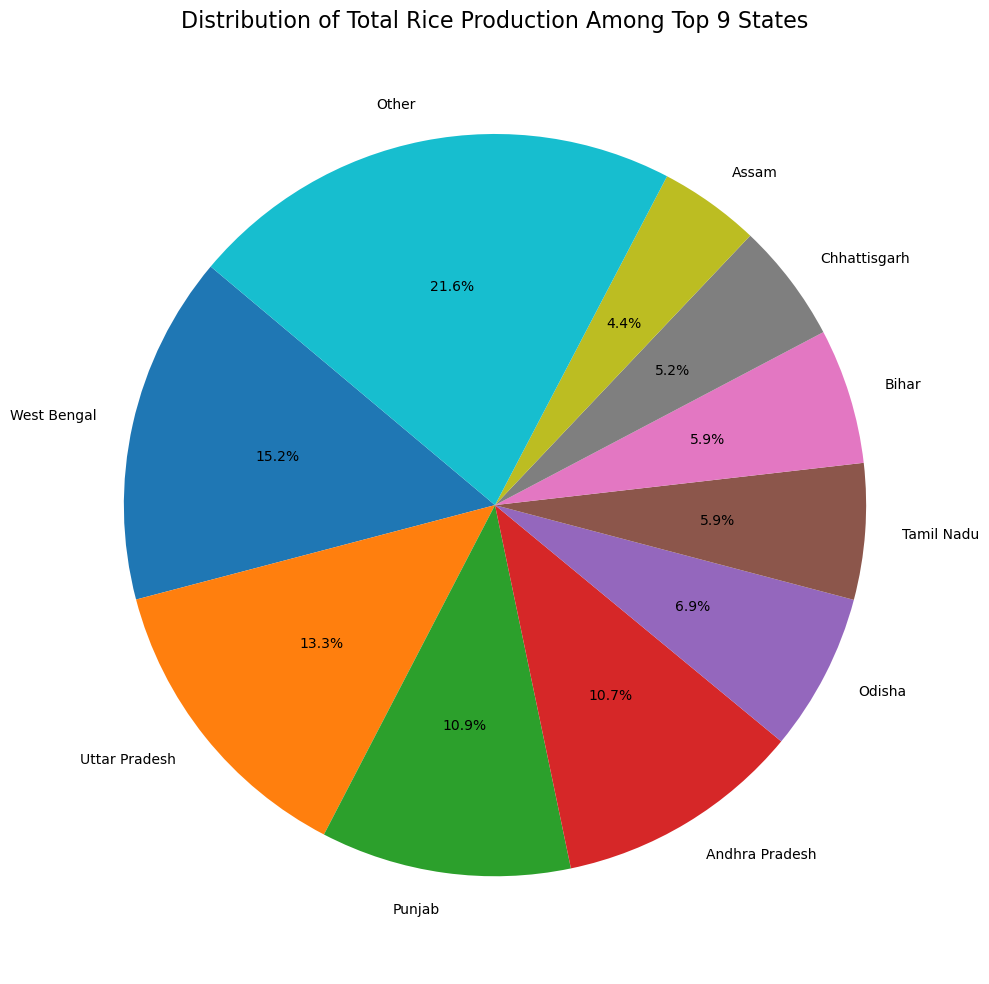

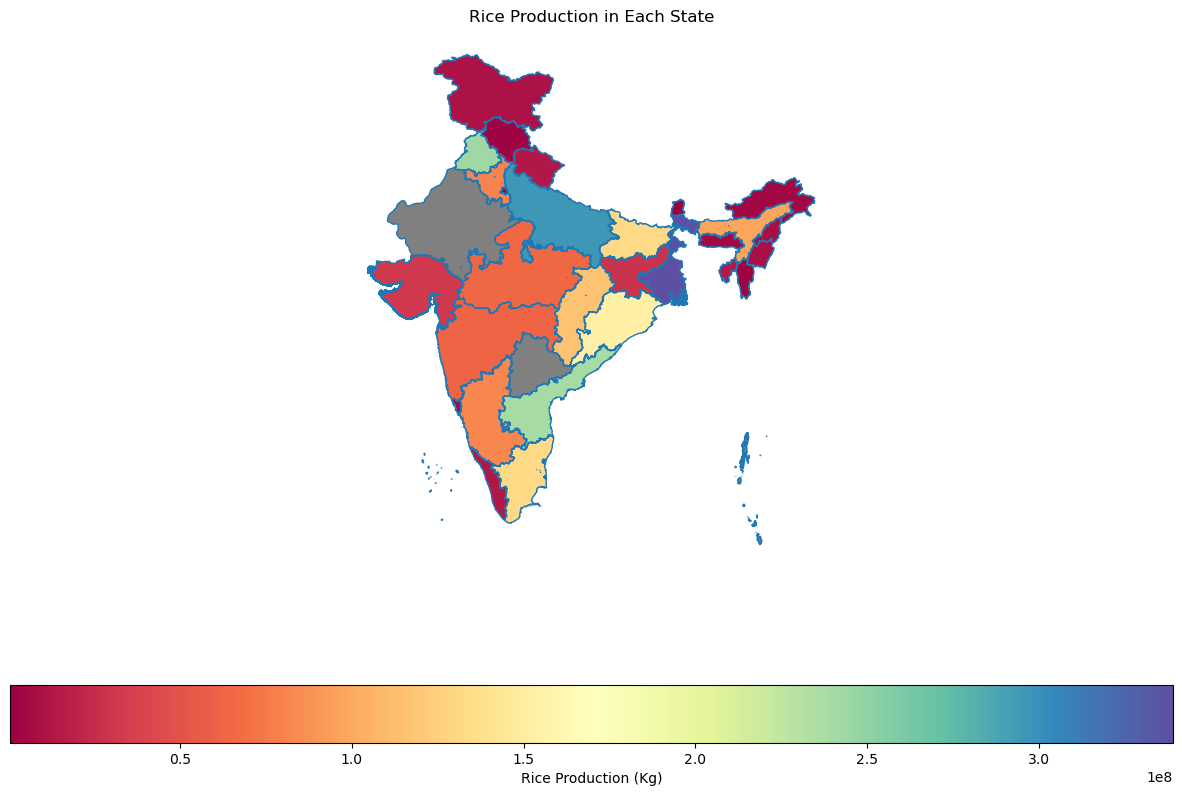

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# # Convert the Series to a DataFrame for easier plotting
# df = pd.DataFrame({'State': rice_data.index, 'Production': rice_data.values})

df = rice_production.reset_index()
df.columns = ['State', 'Production']

plt.figure(figsize=(14, 8))
sns.barplot(x='Production', y='State', data=df.sort_values(by='Production', ascending=False), palette='viridis')
plt.title('Total Rice Production by State (All Years)', fontsize=16)
plt.xlabel('Total Rice Production', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.show()

top_n = 9  # Number of top states to display
top_states = df.nlargest(top_n, 'Production')
other_production = df['Production'].sum() - top_states['Production'].sum()

labels = top_states['State'].tolist() + ['Other']
sizes = top_states['Production'].tolist() + [other_production]

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Total Rice Production Among Top {top_n} States', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Plotting the states with the highest pesticide usage per hectare
india_states = gpd.read_file("states_india.geojson")
# We will have the data of the area under production in the states_area_production dataframe
# Selecting only the relevant columns for merging
# You might need to inspect your GeoJSON file and adjust the 'key_on' parameter accordingly.
india_states['NAME_MERGE'] = india_states['st_nm'].str.replace('&', 'and', regex=False)
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Andaman and Nicobar', 'Andaman & Nicobar Islands')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Arunanchal Pradesh', 'Arunachal Pradesh')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Uttaranchal', 'Uttarakhand')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Delhi', 'Delhi') # Ensure exact match
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Chandigarh', 'Chandigarh') # Ensure exact match

# Merge the GeoDataFrame with the area under production data
merged_data = india_states.merge(df, left_on='NAME_MERGE', right_on='State', how='left')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Plotting the map with the rainfall data
merged_data.boundary.plot(ax=ax, linewidth=1)
# Plotting the rainfall data
merged_data.plot(column='Production', ax=ax, legend=True,
                    legend_kwds={'label': "Rice Production (Kg)",
                                'orientation': "horizontal"},
                    cmap='Spectral', missing_kwds={"color": "gray"})
plt.title('Rice Production in Each State')

plt.axis('off')
plt.show()

### Which States lead in the production of Wheat?

## Analysis of Leading Wheat Producing States

Based on the visualizations below (bar chart, pie chart, and map), the following analysis identifies the states that dominate total wheat production in India according to the dataset:

1.  **Identification of Top Producers:**
    *   **Uttar Pradesh** is unequivocally the leading wheat-producing state, contributing the largest share by a substantial margin.
    *   **Punjab**, **Madhya Pradesh**, and **Haryana** follow as the next major producers, forming a clear second tier.
    *   **Evidence:**
        *   The horizontal bar chart ("Total Wheat Production by State (All Years)") shows Uttar Pradesh with the longest bar, indicating the highest total production (approximately 6.3 x 10^8 kg). Punjab follows significantly behind (approx. 3.7 x 10^8 kg), then Madhya Pradesh (approx. 2.8 x 10^8 kg), and Haryana (approx. 2.2 x 10^8 kg).
        *   The map ("Wheat Production in Each State") visually highlights this dominance, with Uttar Pradesh coloured in light yellow, corresponding to the highest production bracket on the color bar (likely > 3 x 10^8 kg). Punjab, Madhya Pradesh, and Haryana are shown in slightly darker shades (oranges/yellows), indicating the next highest production levels.
        *   The pie chart ("Distribution of Total Wheat Production Among Top 9 States") quantifies Uttar Pradesh's leading role, attributing **35.6%** of the total production to it. Punjab contributes **20.1%**, Madhya Pradesh **16.0%**, and Haryana **13.3%**.

2.  **Significant Contribution from Bihar:**
    *   Beyond the top four, **Bihar** emerges as the next most significant contributor.
    *   **Evidence:**
        *   The bar chart shows Bihar as the fifth-highest producer, though considerably less than the top four.
        *   The pie chart assigns **6.1%** of the total production share to Bihar.

3.  **High Concentration of Production:**
    *   Wheat production in India, as depicted in this dataset, is highly concentrated in a few key states.
    *   **Evidence:** The top four states alone (Uttar Pradesh, Punjab, Madhya Pradesh, Haryana) account for a commanding **85.0%** of the total wheat production shown in the pie chart. The top nine states featured capture almost all production, with the "Other" category representing only **1.9%**.

4.  **Geographical Concentration:**
    *   The production is primarily concentrated in the northern and central plains of India.
    *   **Evidence:** The map clearly shows the highest production levels (yellow/orange/green colors) clustered in the states of Uttar Pradesh, Punjab, Haryana, Madhya Pradesh, and extending into Bihar and Rajasthan. Southern and eastern states are predominantly shown in dark purple/red or grey, indicating very low or negligible wheat production according to this dataset.


In [60]:
wheat_production = data[data['Crop'] == 'Wheat'].groupby('State')['Production'].sum().sort_values(ascending=False)
print("\nStates Leading in Wheat Production (Total over all years):\n", wheat_production)


States Leading in Wheat Production (Total over all years):
 State
Uttar Pradesh        643820578
Punjab               364370000
Madhya Pradesh       288882663
Haryana              241279000
Bihar                110112855
Gujarat               59820734
Maharashtra           32916852
West Bengal           18646952
Uttarakhand           16996170
Himachal Pradesh      11198010
Jammu and Kashmir      8735440
Karnataka              4718976
Jharkhand              2709245
Chhattisgarh           2412036
Delhi                  1915317
Assam                  1329099
Andhra Pradesh          150552
Nagaland                141780
Arunachal Pradesh       140771
Sikkim                  121565
Odisha                  121331
Manipur                  80400
Telangana                58713
Meghalaya                46622
Tripura                  28730
Mizoram                    101
Kerala                      12
Name: Production, dtype: int64


/var/folders/nj/cv7zrr5s39g_d0x2440hndx40000gp/T/ipykernel_42282/1513366838.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Production', y='State', data=df.sort_values(by='Production', ascending=False), palette='viridis')


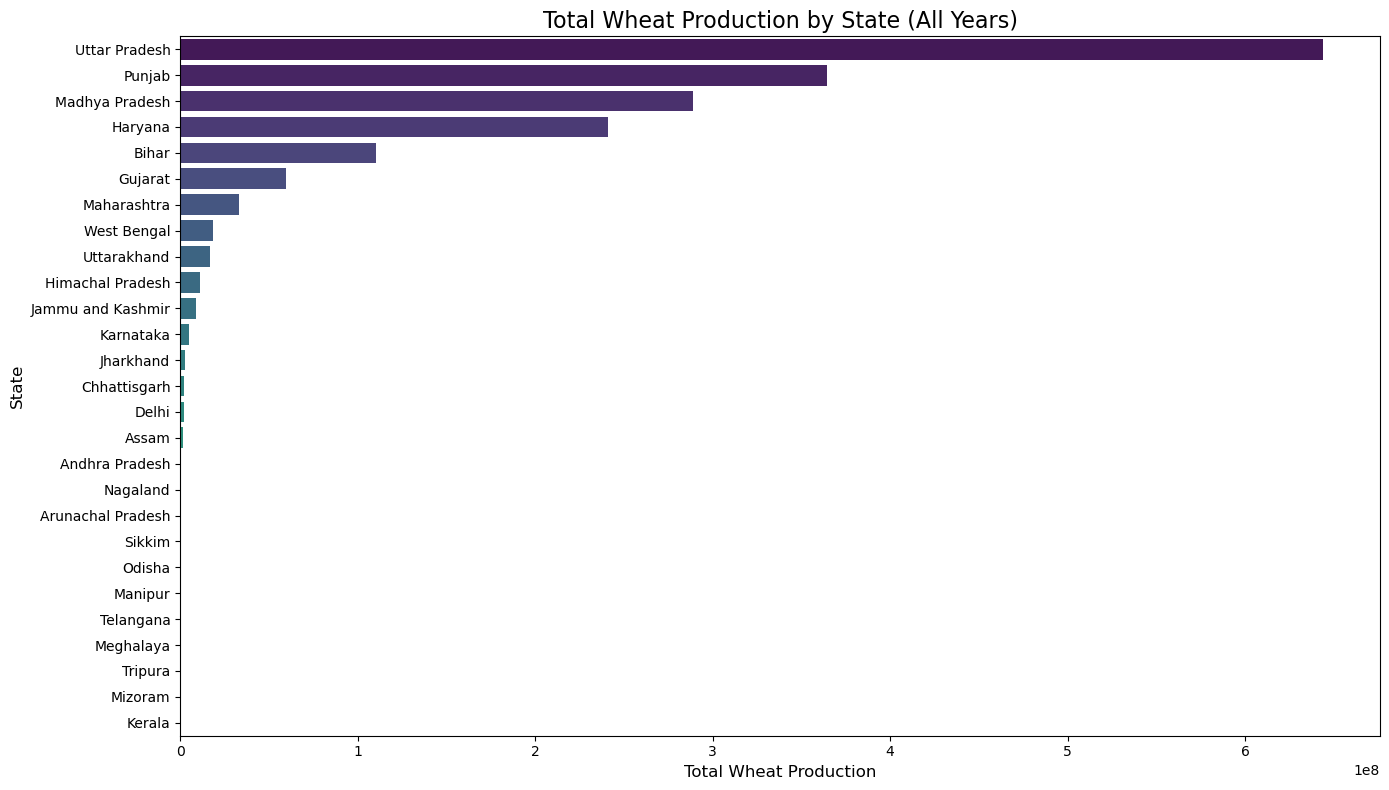

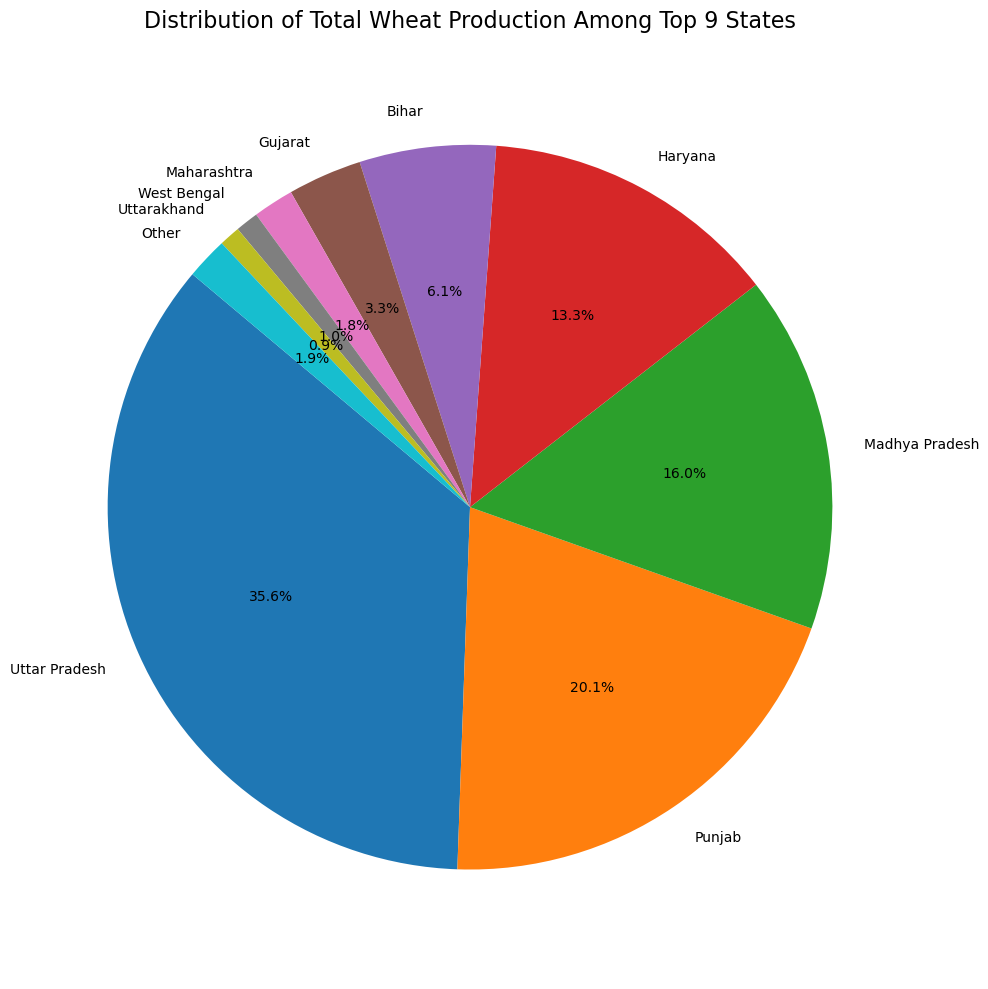

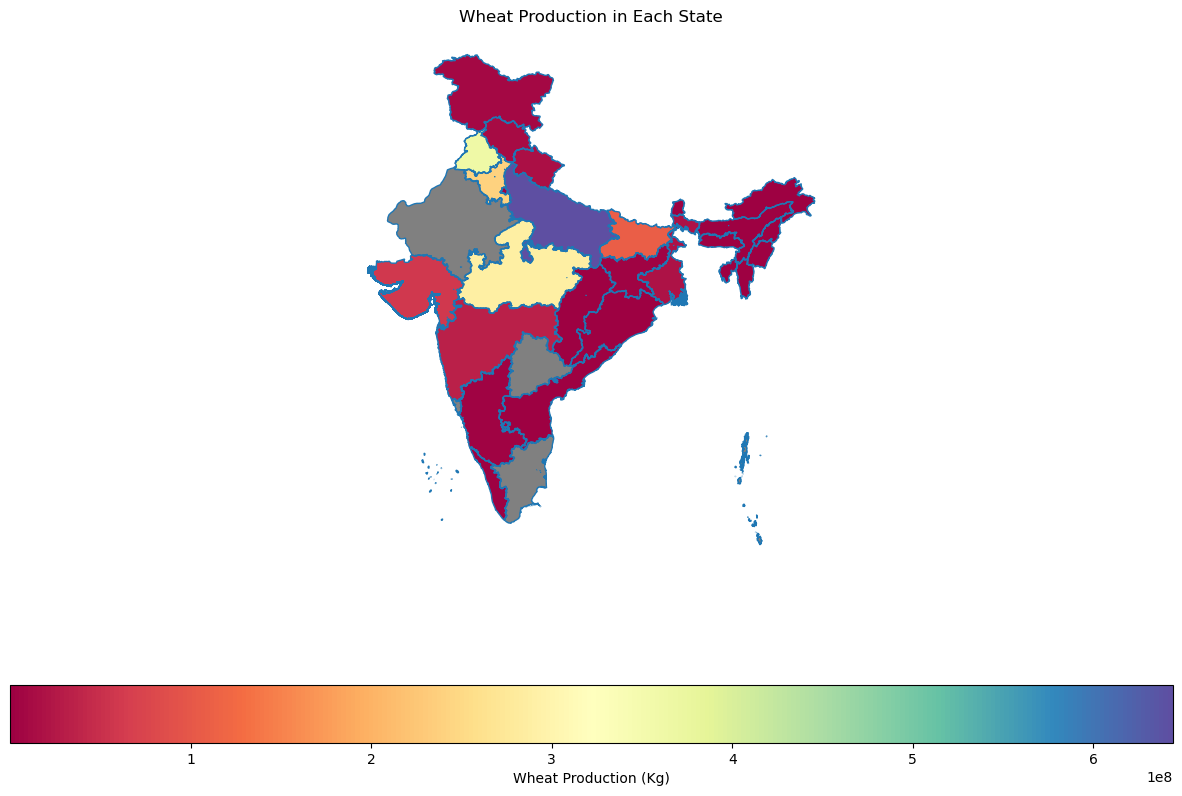

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# # Convert the Series to a DataFrame for easier plotting
# df = pd.DataFrame({'State': wheat_data.index, 'Production': wheat_data.values})

df = wheat_production.reset_index()
df.columns = ['State', 'Production']

plt.figure(figsize=(14, 8))
sns.barplot(x='Production', y='State', data=df.sort_values(by='Production', ascending=False), palette='viridis')
plt.title('Total Wheat Production by State (All Years)', fontsize=16)
plt.xlabel('Total Wheat Production', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.show()

top_n = 9  # Number of top states to display
top_states = df.nlargest(top_n, 'Production')
other_production = df['Production'].sum() - top_states['Production'].sum()

labels = top_states['State'].tolist() + ['Other']
sizes = top_states['Production'].tolist() + [other_production]

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Total Wheat Production Among Top {top_n} States', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Plotting the states with the highest pesticide usage per hectare
india_states = gpd.read_file("states_india.geojson")
# We will have the data of the area under production in the states_area_production dataframe
# Selecting only the relevant columns for merging
# You might need to inspect your GeoJSON file and adjust the 'key_on' parameter accordingly.
india_states['NAME_MERGE'] = india_states['st_nm'].str.replace('&', 'and', regex=False)
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Andaman and Nicobar', 'Andaman & Nicobar Islands')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Arunanchal Pradesh', 'Arunachal Pradesh')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Uttaranchal', 'Uttarakhand')
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Delhi', 'Delhi') # Ensure exact match
india_states['NAME_MERGE'] = india_states['NAME_MERGE'].str.replace('Chandigarh', 'Chandigarh') # Ensure exact match

# Merge the GeoDataFrame with the area under production data
merged_data = india_states.merge(df, left_on='NAME_MERGE', right_on='State', how='left')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Plotting the map with the rainfall data
merged_data.boundary.plot(ax=ax, linewidth=1)
# Plotting the rainfall data
merged_data.plot(column='Production', ax=ax, legend=True,
                    legend_kwds={'label': "Wheat Production (Kg)",
                                'orientation': "horizontal"},
                    cmap='Spectral', missing_kwds={"color": "gray"})
plt.title('Wheat Production in Each State')

plt.axis('off')
plt.show()

### How does the production of wheat, rice and pulses vary with rainfall and temperature?



This analysis examines the relationship between annual rainfall, temperature, and the production levels of three key crop types – Rice, Wheat, and Pulses – based on the cluster plots below.


#### **1. Rice Production vs. Rainfall and Temperature**

*   **Plot Description:** The cluster plot for Rice displays production on the y-axis against annual rainfall on the x-axis. Three distinct clusters are shown: Cluster 0 (Purple - highest production), Cluster 1 (Teal - moderate production), and Cluster 2 (Yellow - lowest/near-zero production).
*   **Relationship with Rainfall:**
    *   The highest production levels (Cluster 0) and moderate production levels (Cluster 1) are predominantly concentrated within a **moderate rainfall zone**, roughly between 750 mm and 2000 mm.
    *   The lowest production cluster (Cluster 2) spans all rainfall levels but is particularly dominant at very high rainfall amounts (above ~2000 mm), suggesting that excessive rainfall is detrimental to rice production. Low rainfall (below ~750 mm) also does not support high production levels.
    *   This indicates a **non-linear relationship** where optimal rice production occurs within a specific moderate rainfall range.
*   **Inferred Relationship with Temperature:** Since clusters representing different production levels exist within the optimal rainfall band, temperature (the other variable used for clustering) likely plays a significant role. The highest production (Cluster 0) likely occurs when optimal temperatures coincide with optimal rainfall, though the specific temperature range cannot be determined from this plot alone.


### **2. Wheat Production vs. Rainfall and Temperature**

*   **Plot Description:** The cluster plot for Wheat uses the same axes and cluster colour scheme. Cluster 0 (Purple) represents the highest production, Cluster 1 (Teal) moderate production, and Cluster 2 (Yellow) the lowest production.
*   **Relationship with Rainfall:**
    *   The highest production levels (Cluster 0) and moderate production levels (Cluster 1) are strongly concentrated in the **lower rainfall zone**, primarily below approximately 1000 mm.
    *   The lowest production cluster (Cluster 2) is spread across all rainfall levels but becomes dominant at higher rainfall amounts (above ~1500 mm).
    *   This suggests a **negative relationship** between rainfall and high wheat production beyond a certain low threshold; wheat thrives in relatively drier conditions characteristic of the Rabi season in its primary growing regions.
*   **Inferred Relationship with Temperature:** Within the preferred low-rainfall zone, the distinction between high (Cluster 0) and moderate (Cluster 1) production implies temperature is crucial. Optimal wheat production likely occurs when favorable (cooler) temperatures align with these lower rainfall conditions.


### **3. Pulses Production vs. Rainfall and Temperature**

*   **Plot Description:** The cluster plot for Pulses follows the same format. Cluster 1 (Teal) represents the highest production here, Cluster 0 (Purple) moderate production, and Cluster 2 (Yellow) the lowest production.
*   **Relationship with Rainfall:**
    *   The highest production levels (Cluster 1) are concentrated within a **moderate rainfall band**, roughly between 600 mm and 1500 mm.
    *   Moderate production (Cluster 0) occurs primarily below ~1600 mm.
    *   The lowest production cluster (Cluster 2) spans all rainfall levels but is prominent at very high rainfall amounts (above ~1700 mm).
    *   Similar to rice, this indicates a **non-linear relationship**, with optimal pulse production favored within a specific moderate rainfall range. Both excessive and potentially very low rainfall appear less conducive to high production.
*   **Inferred Relationship with Temperature:** The existence of different production level clusters (0 and 1) within the optimal rainfall band suggests that specific temperature ranges are also critical for achieving the highest pulse production (Cluster 1).



Correlation Matrix (Rice Production, Rainfall, Temperature):
                  Production  Annual_Rainfall
Production         1.000000        -0.340358
Annual_Rainfall   -0.340358         1.000000

Cluster Analysis (Rice):
           Production  Annual_Rainfall
Cluster                               
0        8.027330e+06      1082.527684
1        1.015638e+06      1267.757446
2        2.418732e+05      3011.182050


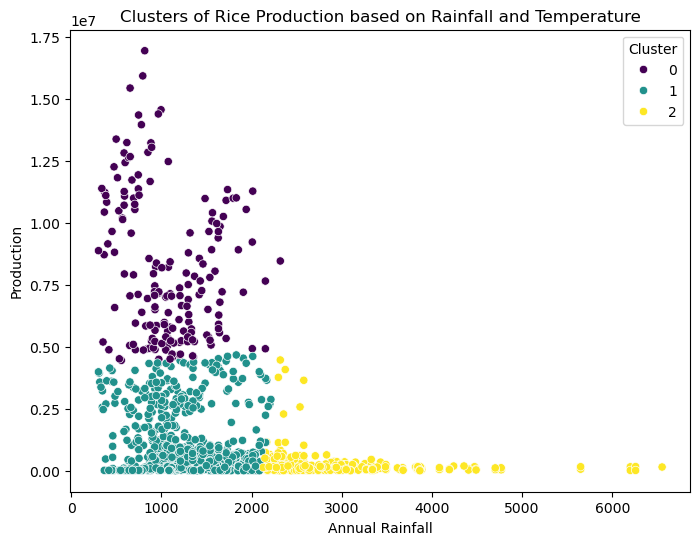

In [71]:
rice_data = data[data['Crop'] == 'Rice'][['Production', 'Annual_Rainfall']] # Add 'Temperature' if available
rice_data = rice_data.dropna() # Handle missing values

if not rice_data.empty:
    correlation_rice = rice_data.corr()
    print("\nCorrelation Matrix (Rice Production, Rainfall, Temperature):\n", correlation_rice)

    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    import seaborn as sns

    features_rice_cluster = rice_data.columns
    scaler_rice = StandardScaler()
    scaled_features_rice = scaler_rice.fit_transform(rice_data)


    n_clusters_rice = 3 # Choose based on elbow plot
    kmeans_rice_final = KMeans(n_clusters=n_clusters_rice, random_state=42, n_init=10)
    rice_data['Cluster'] = kmeans_rice_final.fit_predict(scaled_features_rice)

    print("\nCluster Analysis (Rice):")
    print(rice_data.groupby('Cluster')[features_rice_cluster].mean())

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Annual_Rainfall', y='Production', hue='Cluster', data=rice_data, palette='viridis') # Adjust x and y if you have Temperature
    plt.title('Clusters of Rice Production based on Rainfall and Temperature') 
    plt.xlabel('Annual Rainfall') # Adjust label
    plt.ylabel('Production')
    plt.show()
else:
    print("\nNo data available for Rice to perform correlation and clustering.")


Correlation Matrix (Wheat Production, Rainfall, Temperature):
                  Production  Annual_Rainfall
Production         1.000000        -0.369942
Annual_Rainfall   -0.369942         1.000000

Cluster Analysis (Wheat):
           Production  Annual_Rainfall
Cluster                               
0        1.911069e+07       639.323848
1        1.153049e+06      1188.593114
2        3.509422e+04      2782.334466


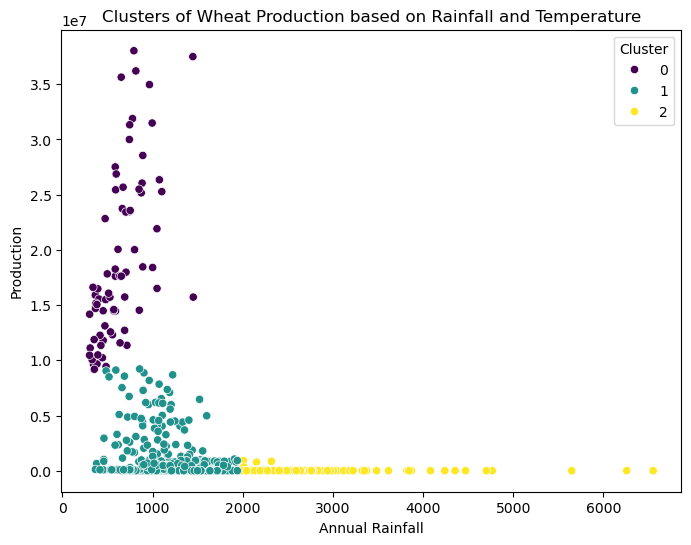

In [72]:
wheat_data = data[data['Crop'] == 'Wheat'][['Production', 'Annual_Rainfall']] # Add 'Temperature' if available
wheat_data = wheat_data.dropna() # Handle missing values

if not wheat_data.empty:
    correlation_wheat = wheat_data.corr()
    print("\nCorrelation Matrix (Wheat Production, Rainfall, Temperature):\n", correlation_wheat)

    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    import seaborn as sns

    features_wheat_cluster = wheat_data.columns
    scaler_wheat = StandardScaler()
    scaled_features_wheat = scaler_wheat.fit_transform(wheat_data)


    n_clusters_wheat = 3 # Choose based on elbow plot
    kmeans_wheat_final = KMeans(n_clusters=n_clusters_wheat, random_state=42, n_init=10)
    wheat_data['Cluster'] = kmeans_wheat_final.fit_predict(scaled_features_wheat)

    print("\nCluster Analysis (Wheat):")
    print(wheat_data.groupby('Cluster')[features_wheat_cluster].mean())

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Annual_Rainfall', y='Production', hue='Cluster', data=wheat_data, palette='viridis') # Adjust x and y if you have Temperature
    plt.title('Clusters of Wheat Production based on Rainfall and Temperature') # Adjust title
    plt.xlabel('Annual Rainfall') # Adjust label
    plt.ylabel('Production')
    plt.show()
else:
    print("\nNo data available for Wheat to perform correlation and clustering.")


Correlation Matrix (Pulses Production, Rainfall, Temperature):
                  Production  Annual_Rainfall
Production         1.000000        -0.139381
Annual_Rainfall   -0.139381         1.000000

Cluster Analysis (Pulses):
           Production  Annual_Rainfall
Cluster                               
0        1.019009e+05      1095.687787
1        2.599564e+06      1050.055172
2        5.514137e+03      2643.258052


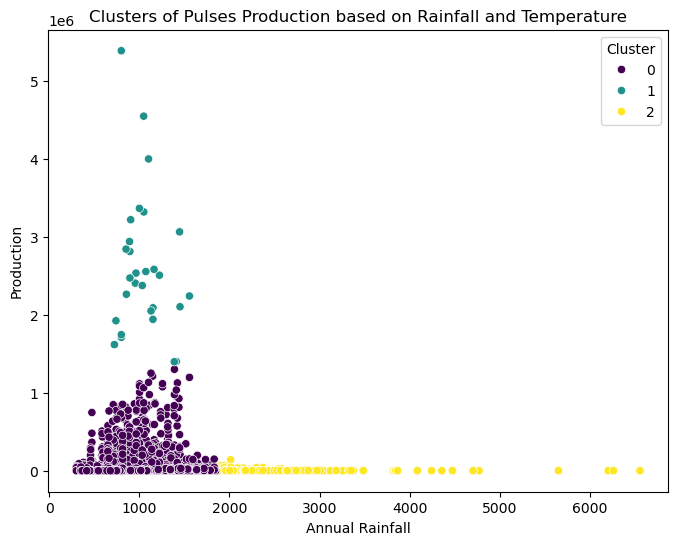

In [73]:
pulse_crops = ['Arhar/Tur', 'Moong', 'Urad', 'Gram', 'Masoor', 'Other Pulses'] 

pulses_data = data[data['Crop'].isin(pulse_crops)][['Production', 'Annual_Rainfall']] # Add 'Temperature' if available
pulses_data = pulses_data.dropna() # Handle missing values

if not pulses_data.empty:
    correlation_pulses = pulses_data.corr()
    print("\nCorrelation Matrix (Pulses Production, Rainfall, Temperature):\n", correlation_pulses)

    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    import seaborn as sns

    features_pulses_cluster = pulses_data.columns
    scaler_pulses = StandardScaler()
    scaled_features_pulses = scaler_pulses.fit_transform(pulses_data)

    n_clusters_pulses = 3 # Choose based on elbow plot
    kmeans_pulses_final = KMeans(n_clusters=n_clusters_pulses, random_state=42, n_init=10)
    pulses_data['Cluster'] = kmeans_pulses_final.fit_predict(scaled_features_pulses)

    print("\nCluster Analysis (Pulses):")
    print(pulses_data.groupby('Cluster')[features_pulses_cluster].mean())

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Annual_Rainfall', y='Production', hue='Cluster', data=pulses_data, palette='viridis') # Adjust x and y if you have Temperature
    plt.title('Clusters of Pulses Production based on Rainfall and Temperature') # Adjust title
    plt.xlabel('Annual Rainfall') # Adjust label
    plt.ylabel('Production')
    plt.show()
else:
    print("\nNo data available for Pulses to perform correlation.")

### Using the visualization below, the production trend of a crop can be observed over the years

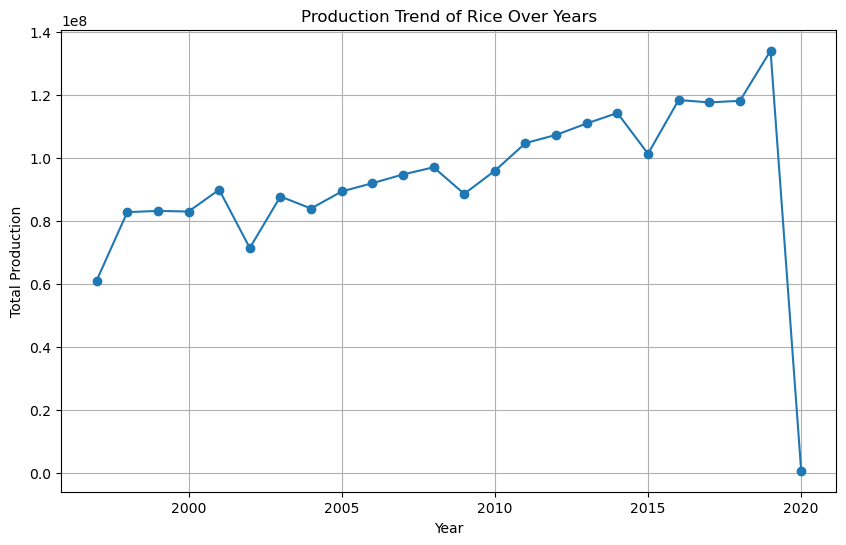

In [76]:
import matplotlib.pyplot as plt

def plot_production_trend(data, crop_name):
    crop_data = data[data['Crop'] == crop_name].groupby('Crop_Year')['Production'].sum()
    plt.figure(figsize=(10, 6))
    plt.plot(crop_data.index, crop_data.values, marker='o')
    plt.title(f'Production Trend of {crop_name} Over Years')
    plt.xlabel('Year')
    plt.ylabel('Total Production')
    plt.grid(True)
    plt.show()

selected_crop = input("Enter the crop name to see its production trend: ")
plot_production_trend(data, selected_crop)

### Using the visualization below, the prediction for the production of a crop for the next 5 years can be made


Production Prediction for Rice for the next 5 years:
     Year  Predicted_Production
23  2020          1.361864e+08
24  2021          1.357339e+08
25  2022          1.374582e+08
26  2023          1.368895e+08
27  2024          1.348319e+08


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

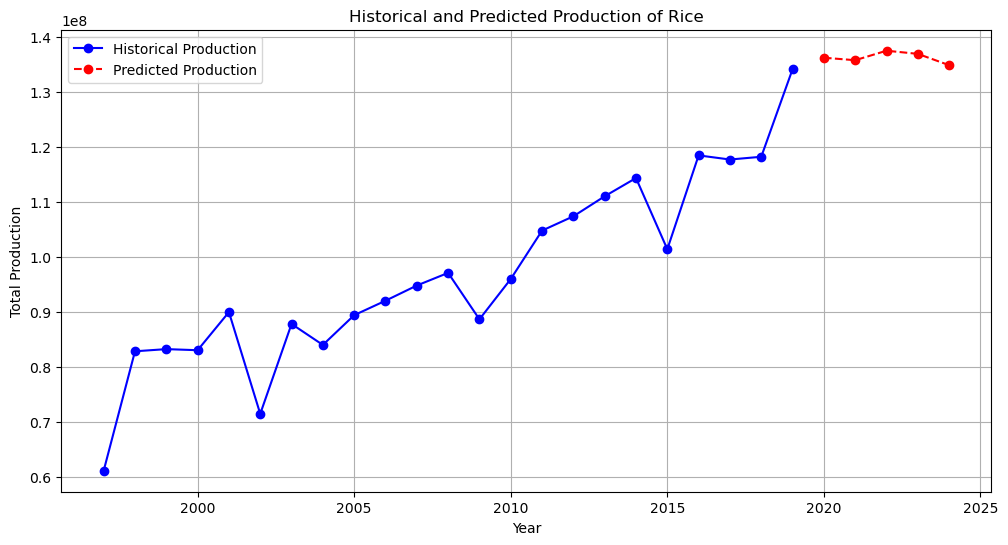

In [77]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

def predict_production_with_plot(data, crop_name, years_to_predict=5):
    data_without_2020 = data[data['Crop_Year'] != 2020]
    crop_data = data_without_2020[data_without_2020['Crop'] == crop_name].groupby('Crop_Year')['Production'].sum()
    # Remove 2020

    if len(crop_data) < 3:  # ARIMA requires sufficient data points
        print(f"Insufficient data for {crop_name} production prediction.")
        return

    # Fit ARIMA model (you might need to tune the order (p, d, q))
    model = ARIMA(crop_data, order=(5, 1, 0))  # Example order
    model_fit = model.fit()

    # Create future date index
    last_year = crop_data.index.max()
    future_years = range(last_year + 1, last_year + 1 + years_to_predict)

    # Make predictions
    predictions = model_fit.predict(start=len(crop_data), end=len(crop_data) + years_to_predict - 1)

    predictions_df = pd.DataFrame({'Year': future_years, 'Predicted_Production': predictions})
    print(f"\nProduction Prediction for {crop_name} for the next {years_to_predict} years:\n", predictions_df)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(crop_data.index, crop_data.values, marker='o', linestyle='-', color='blue', label='Historical Production')
    plt.plot(predictions_df['Year'], predictions_df['Predicted_Production'], marker='o', linestyle='--', color='red', label='Predicted Production')
    plt.title(f'Historical and Predicted Production of {crop_name}')
    plt.xlabel('Year')
    plt.ylabel('Total Production')
    plt.legend()
    plt.grid(True)
    plt.show()

selected_crop_predict = input("Enter the crop name to predict production and plot: ")
predict_production_with_plot(data, selected_crop_predict)